In [1]:
from tools import *
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import time
import random, math, copy

In [2]:
itemNum=20 #物品数目
Bin=[30,50] #箱子宽度与高度
ran=list(range(itemNum))

# N2

In [3]:

N2 = [
    [23, 9],
    [19, 4],
    [12, 21],
    [6, 4],
    [7, 13],
    [9, 4],
    [4, 6],
    [23, 6],
    [16, 6],
    [4, 14],
    [14, 6],
    [6, 6],
    [5, 4],
    [4, 6],
    [6, 4],
    [7, 6],
    [14, 11],
    [4, 7],
    [8, 4],
    [14, 4]
]

AllItem = np.array(N2)

print(AllItem)


[[23  9]
 [19  4]
 [12 21]
 [ 6  4]
 [ 7 13]
 [ 9  4]
 [ 4  6]
 [23  6]
 [16  6]
 [ 4 14]
 [14  6]
 [ 6  6]
 [ 5  4]
 [ 4  6]
 [ 6  4]
 [ 7  6]
 [14 11]
 [ 4  7]
 [ 8  4]
 [14  4]]


# Bottom-Left

utilisation: 0.7733333333333333


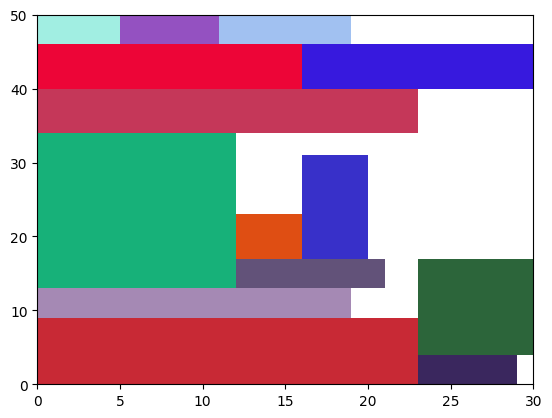

utilisation: 0.22666666666666666


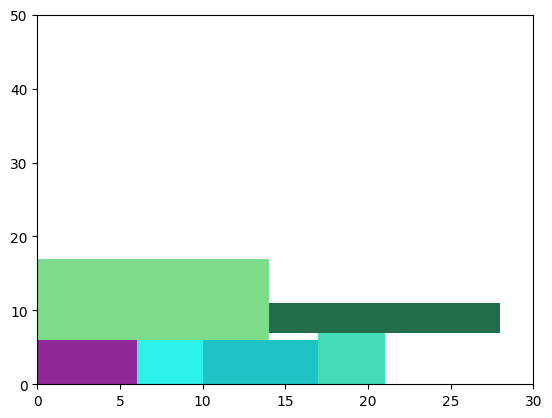

Average utilisation: 0.5
Running time: 0.21799945831298828 seconds


In [6]:
def bottom_left(itemNum, AllItem, Bin):
    ran = list(range(itemNum))

    ansBXY = np.zeros((itemNum, 3))  # [bin number, X coordinate, Y coordinate]
    RPNXY = []
    BinNum = 1
    flagItem = np.zeros(itemNum)  # Marks if an item is packed (0: not packed, 1: packed)
    utilization_rates = []  # Save the utilization rate for each packing
    visualizations = []  # Save visualizations of each packing


    # start packing
    #print(list(flagItem).count(0))
    for i in range(itemNum):            
        if list(flagItem).count(0)>0:
            BinNum=BinNum+1
            RPNXY=[]
            for j in range(itemNum):
                if flagItem[ran[j]]==0:
                    item=AllItem[ran[j],:]
                    #print(item)
                    itemRP=Bin  #The starting points are all at the top right corner of the bin.
                    flagOL=overlap(item,AllItem,itemRP,RPNXY) #If overlap flagOL=1; vice versa flagOL=0
                    if flagOL==0:
                        itemRP=finalPos(item,AllItem,itemRP,RPNXY) #Update the coordinates of the top-right corner vertex of the item after moving it down and left from its current position to its final position.
                        RPNXY.append([ran[j],itemRP[0],itemRP[1]]) # Record the rectangle that fits into the box [ID,width,height].
                        flagItem[ran[j]]=1

            #utilisation
            rect_area = 0
            bin_area = Bin[0]*Bin[1]
            for id in RPNXY:
                width,height = AllItem[id[0]]
                rect_area += width*height
            utilization_rate = rect_area / bin_area
            utilization_rates.append(utilization_rate)

            #visualisation
            fig, ax = plt.subplots(1, 1)
            ax1 = fig.gca()
            for i in RPNXY:
                width,height = AllItem[i[0]]
                rx,ry = i[1],i[2]
                lx,ly = rx - width, ry - height
                plt.xlim((0, Bin[0]))
                plt.ylim((0, Bin[1]))
                color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                rect = patches.Rectangle((lx, ly), width,height,linewidth=1, facecolor = color)
                ax1.add_patch(rect)
            print("utilisation: {}".format(utilization_rate))
            plt.show()
            #plt.savefig('result.png')
            
    return utilization_rates

start_time = time.time()
# Run the Bottom-left-fill (BLF) algorithm
utilization_rates = bottom_left(itemNum, AllItem, Bin)
end_time = time.time()


print("Average utilisation: {}".format(np.mean(utilization_rates)))
print("Running time: {} seconds".format(end_time - start_time))

# BL(bottom-left) Sorted by height

utilisation: 0.8333333333333334


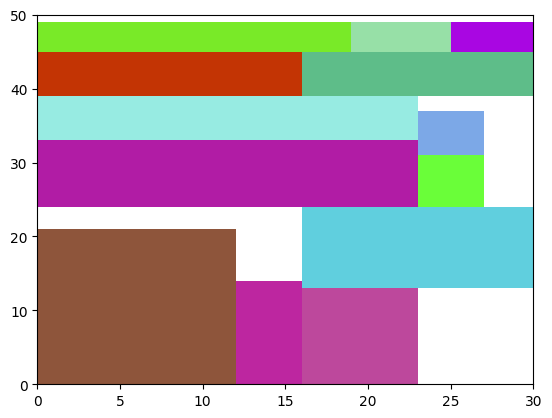

utilisation: 0.16666666666666666


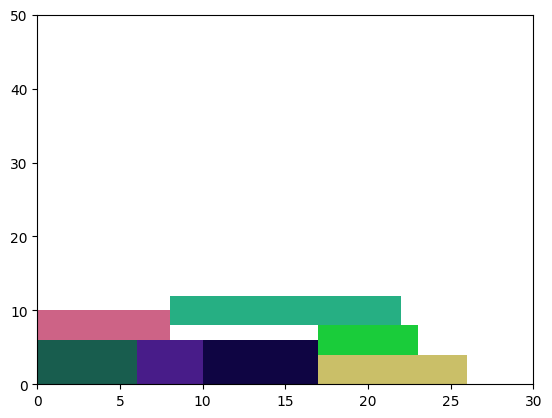

Average utilisation: 0.5
Running time: 0.22098159790039062 seconds


In [12]:
def bottom_left_sorted(itemNum, AllItem, Bin):
    ran = list(range(itemNum))
#     ran.sort(key=lambda x: AllItem[x][0] * AllItem[x][1], reverse=True)  # Sort items by area (width * height)
    ran.sort(key=lambda x: AllItem[x][1], reverse=True)  # Sort items by height in descending order
#     ran.sort(key=lambda x: (AllItem[x][1], AllItem[x][0] * AllItem[x][1]), reverse=True)
    
    ansBXY = np.zeros((itemNum, 3))  # [bin number, X coordinate, Y coordinate]
    RPNXY = []
    BinNum = 1
    flagItem = np.zeros(itemNum)  # Marks if an item is packed (0: not packed, 1: packed)
    utilization_rates = []  # Save the utilization rate for each packing
    visualizations = []  # Save visualizations of each packing


    # Start packing.
    for i in range(itemNum):            
        if list(flagItem).count(0)>0:
            BinNum=BinNum+1
            RPNXY=[]
            for j in range(itemNum):
                if flagItem[ran[j]]==0:
                    item=AllItem[ran[j],:]
                    #print(item)
                    itemRP=Bin  
                    flagOL=overlap(item,AllItem,itemRP,RPNXY) 
                    if flagOL==0:
                        itemRP=finalPos(item,AllItem,itemRP,RPNXY) 
                        RPNXY.append([ran[j],itemRP[0],itemRP[1]]) 
                        flagItem[ran[j]]=1

            rect_area = 0
            bin_area = Bin[0]*Bin[1]
            for id in RPNXY:
                width,height = AllItem[id[0]]
                rect_area += width*height
            utilization_rate = rect_area / bin_area
            utilization_rates.append(utilization_rate)

            fig, ax = plt.subplots(1, 1)
            ax1 = fig.gca()
            for i in RPNXY:
                width,height = AllItem[i[0]]
                rx,ry = i[1],i[2]
                lx,ly = rx - width, ry - height
                plt.xlim((0, Bin[0]))
                plt.ylim((0, Bin[1]))
                color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                rect = patches.Rectangle((lx, ly), width,height,linewidth=1, facecolor = color)
                ax1.add_patch(rect)
            print("utilisation: {}".format(utilization_rate))
            plt.show()
            #plt.savefig('result.png')
            
    return utilization_rates

start_time = time.time()
# Run the Bottom-left-fill (BLF) algorithm
utilization_rates = bottom_left_sorted(itemNum, AllItem, Bin)
end_time = time.time()


print("Average utilisation: {}".format(np.mean(utilization_rates)))
print("Running time: {} seconds".format(end_time - start_time))
        

# Bottom-left-fill (BLF) algorithm

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 1 0 0]
 [1 1 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
utilisation: 0.88


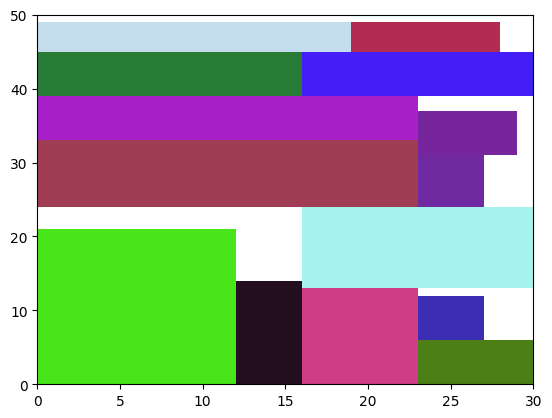

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
utilisation: 0.12


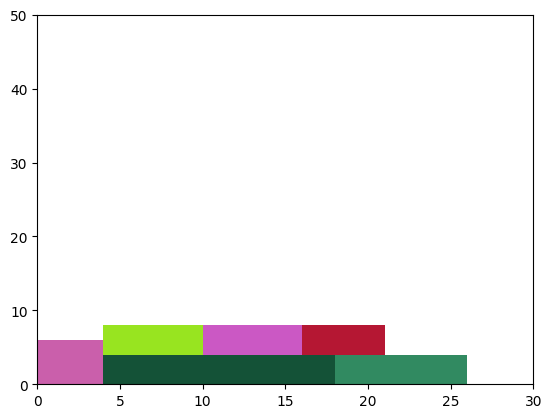

Average utilisation: 0.5
Running time: 0.2349715232849121 seconds


In [19]:
bin_matrix = np.zeros((Bin[1], Bin[0]), dtype=int)  # Initially a 0 matrix, representing an empty bin
def find_largest_blank_region(bin_matrix):
    rows, cols = bin_matrix.shape
    max_width, max_height, max_area = 0, 0, 0
    start_row, start_col = 0, 0

    for r in range(rows):
        for c in range(cols):
            if bin_matrix[r, c] == 0:
                width, height = 0, 0
                while c + width < cols and bin_matrix[r, c + width] == 0:
                    width += 1
                while r + height < rows and bin_matrix[r + height, c] == 0:
                    height += 1
                area = width * height

                if area > max_area:
                    max_width, max_height, max_area = width, height, area
                    start_row, start_col = r, c

    return start_row, start_col, max_width, max_height

def bottom_left_fill(itemNum, AllItem, Bin, bin_matrix):
    ran = list(range(itemNum))
#     ran.sort(key=lambda x: AllItem[x][0] * AllItem[x][1], reverse=True)  # Sort items by area (width * height)
#     ran.sort(key=lambda x: AllItem[x][1], reverse=True)  # Sort items by height in descending order
    ran.sort(key=lambda x: (AllItem[x][1], AllItem[x][0] * AllItem[x][1]), reverse=True)
    ansBXY = np.zeros((itemNum, 3))  # [bin number, X coordinate, Y coordinate]
    RPNXY = []
    BinNum = 1
    flagItem = np.zeros(itemNum)  # Marks if an item is packed (0: not packed, 1: packed)
    utilization_rates = []  # Save the utilization rate for each packing
    visualizations = []  # Save visualizations of each packing

    for i in range(itemNum):
        if list(flagItem).count(0) > 0:
            BinNum = BinNum + 1
            RPNXY = []
            bin_matrix = np.zeros((Bin[1], Bin[0]), dtype=int)
            for j in range(itemNum):
                if flagItem[ran[j]] == 0:
                    item = AllItem[ran[j], :]
                    itemRP = Bin  
                    flagOL = overlap(item, AllItem, itemRP, RPNXY)  
                    if flagOL == 0:
                        itemRP = finalPos(item, AllItem, itemRP, RPNXY)  
                        RPNXY.append([ran[j], itemRP[0], itemRP[1]])  
                        flagItem[ran[j]] = 1

                        # Update bin matrix with occupied areas of the item
                        width, height = item
                        lx, ly = itemRP[0] - width, itemRP[1] - height
                        bin_matrix[ly:itemRP[1], lx:itemRP[0]] += 1
            print(bin_matrix)

            # Find and try to place remaining items in the blank regions
            while True:
                start_row, start_col, max_width, max_height = find_largest_blank_region(bin_matrix)
                if max_width < 1 or max_height < 1:
                    break

                # Check if any remaining item can fit in the largest blank region
                remaining_items = [ran[j] for j in range(itemNum) if flagItem[ran[j]] == 0]
                item_placed = False
                for j in remaining_items:
                    width, height = AllItem[j, :]
                    if width <= max_width and height <= max_height:
                        # Temporarily place the item in the largest blank region
                        bin_matrix[start_row:start_row + height, start_col:start_col + width] += 1
                        RPNXY.append([j, start_col + width, start_row + height])  # 记录装进箱子的矩形【ID,width,height】
                        flagItem[j] = 1
                        item_placed = True
                        break

                # Check if the bin matrix is still valid (all values <= 1)
                if np.max(bin_matrix) <= 1:
                    if not item_placed:
                        break
                else:
                    # Roll back to the previous state and remove the last item placement
                    bin_matrix[start_row:start_row + max_height, start_col:start_col + max_width] = 0
                    RPNXY.pop()

            rect_area = np.sum(bin_matrix)  # Count the number of occupied cells (ones) in the bin_matrix
            bin_area = np.prod(Bin)  # Total number of cells in the bin_matrix
            utilization_rate = rect_area / bin_area
            utilization_rates.append(utilization_rate)

            fig, ax = plt.subplots(1, 1)
            ax1 = fig.gca()
            for i in RPNXY:
                width, height = AllItem[i[0]]
                rx, ry = i[1], i[2]
                lx, ly = rx - width, ry - height
                plt.xlim((0, Bin[0]))
                plt.ylim((0, Bin[1]))
                color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                rect = patches.Rectangle((lx, ly), width, height, linewidth=1, facecolor=color)
                ax1.add_patch(rect)
            print("utilisation: {}".format(utilization_rate))
            plt.show()
            # plt.savefig('result.png')

    return utilization_rates

start_time = time.time()
# Run the Bottom-left-fill (BLF) algorithm
utilization_rates = bottom_left_fill(itemNum, AllItem, Bin, bin_matrix)
end_time = time.time()

print("Average utilisation: {}".format(np.mean(utilization_rates)))
print("Running time: {} seconds".format(end_time - start_time))


# LLABF

# ABC with BL

utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7526666666666667
utilisation:0.832
utilisation:0.734
uti

utilisation:0.7506666666666667
utilisation:0.77
utilisation:0.7066666666666667
utilisation:0.7293333333333333
utilisation:0.7366666666666667
utilisation:0.7513333333333333
utilisation:0.7946666666666666
utilisation:0.7713333333333333
utilisation:0.6326666666666667
utilisation:0.688
utilisation:0.7946666666666666
utilisation:0.5626666666666666
utilisation:0.7293333333333333
utilisation:0.7946666666666666
utilisation:0.8826666666666667
utilisation:0.6333333333333333
utilisation:0.6686666666666666
utilisation:0.796
utilisation:0.702
utilisation:0.822
utilisation:0.718
utilisation:0.658
utilisation:0.806
utilisation:0.77
utilisation:0.716
utilisation:0.7133333333333334
utilisation:0.7493333333333333
utilisation:0.7653333333333333
utilisation:0.668
utilisation:0.6473333333333333
utilisation:0.7813333333333333
utilisation:0.72
utilisation:0.768
utilisation:0.6866666666666666
utilisation:0.6333333333333333
utilisation:0.8013333333333333
utilisation:0.7293333333333333
utilisation:0.70866666666

utilisation:0.74
utilisation:0.7706666666666667
utilisation:0.7613333333333333
utilisation:0.55
utilisation:0.6593333333333333
utilisation:0.7533333333333333
utilisation:0.748
utilisation:0.6766666666666666
utilisation:0.712
utilisation:0.7293333333333333
utilisation:0.7813333333333333
utilisation:0.694
utilisation:0.7446666666666667
utilisation:0.808
utilisation:0.694
utilisation:0.7293333333333333
utilisation:0.7593333333333333
utilisation:0.7026666666666667
utilisation:0.7706666666666667
utilisation:0.6446666666666667
utilisation:0.7466666666666667
utilisation:0.832
utilisation:0.658
utilisation:0.6653333333333333
utilisation:0.806
utilisation:0.7306666666666667
utilisation:0.694
utilisation:0.77
utilisation:0.764
utilisation:0.692
utilisation:0.7133333333333334
utilisation:0.7293333333333333
utilisation:0.6966666666666667
utilisation:0.7546666666666667
utilisation:0.7533333333333333
utilisation:0.8473333333333334
utilisation:0.694
utilisation:0.7713333333333333
utilisation:0.670666

utilisation:0.7106666666666667
utilisation:0.7293333333333333
utilisation:0.7493333333333333
utilisation:0.6966666666666667
utilisation:0.6906666666666667
utilisation:0.6606666666666666
utilisation:0.708
utilisation:0.832
utilisation:0.7306666666666667
utilisation:0.632
utilisation:0.74
utilisation:0.776
utilisation:0.7593333333333333
utilisation:0.706
utilisation:0.7946666666666666
utilisation:0.7766666666666666
utilisation:0.7213333333333334
utilisation:0.7286666666666667
utilisation:0.6373333333333333
utilisation:0.7293333333333333
utilisation:0.694
utilisation:0.7646666666666667
utilisation:0.804
utilisation:0.694
utilisation:0.69
utilisation:0.6
utilisation:0.734
utilisation:0.7686666666666667
utilisation:0.82
utilisation:0.7713333333333333
utilisation:0.7713333333333333
utilisation:0.832
utilisation:0.7373333333333333
utilisation:0.7666666666666667
utilisation:0.7946666666666666
utilisation:0.732
utilisation:0.732
utilisation:0.7606666666666667
utilisation:0.7286666666666667
util

utilisation:0.772
utilisation:0.698
utilisation:0.8226666666666667
utilisation:0.694
utilisation:0.7866666666666666
utilisation:0.6506666666666666
utilisation:0.6973333333333334
utilisation:0.7733333333333333
utilisation:0.6086666666666667
utilisation:0.7833333333333333
utilisation:0.7413333333333333
utilisation:0.764
utilisation:0.694
utilisation:0.638
utilisation:0.6413333333333333
utilisation:0.756
utilisation:0.7606666666666667
utilisation:0.7313333333333333
utilisation:0.6493333333333333
utilisation:0.8333333333333334
utilisation:0.6713333333333333
utilisation:0.788
utilisation:0.718
utilisation:0.726
utilisation:0.72
utilisation:0.6633333333333333
utilisation:0.6686666666666666
utilisation:0.7533333333333333
utilisation:0.6893333333333334
utilisation:0.796
utilisation:0.6946666666666667
utilisation:0.8506666666666667
utilisation:0.776
utilisation:0.7273333333333334
utilisation:0.7913333333333333
utilisation:0.8626666666666667
utilisation:0.7546666666666667
utilisation:0.720666666

utilisation:0.694
utilisation:0.768
utilisation:0.7726666666666666
utilisation:0.768
utilisation:0.7426666666666667
utilisation:0.768
utilisation:0.712
utilisation:0.7626666666666667
utilisation:0.722
utilisation:0.7506666666666667
utilisation:0.7573333333333333
utilisation:0.768
utilisation:0.7946666666666666
utilisation:0.6673333333333333
utilisation:0.7833333333333333
utilisation:0.7826666666666666
utilisation:0.566
utilisation:0.7786666666666666
utilisation:0.686
utilisation:0.7806666666666666
utilisation:0.828
utilisation:0.774
utilisation:0.7773333333333333
utilisation:0.7733333333333333
utilisation:0.722
utilisation:0.686
utilisation:0.712
utilisation:0.7066666666666667
utilisation:0.716
utilisation:0.8826666666666667
utilisation:0.7286666666666667
utilisation:0.7013333333333334
utilisation:0.8053333333333333
utilisation:0.626
utilisation:0.6173333333333333
utilisation:0.712
utilisation:0.7353333333333333
utilisation:0.7573333333333333
utilisation:0.74
utilisation:0.831333333333

utilisation:0.602
utilisation:0.8413333333333334
utilisation:0.8133333333333334
utilisation:0.694
utilisation:0.7773333333333333
utilisation:0.694
utilisation:0.812
utilisation:0.8033333333333333
utilisation:0.8133333333333334
utilisation:0.8133333333333334
utilisation:0.7633333333333333
utilisation:0.6986666666666667
utilisation:0.6793333333333333
utilisation:0.654
utilisation:0.7593333333333333
utilisation:0.694
utilisation:0.7593333333333333
utilisation:0.6813333333333333
utilisation:0.7946666666666666
utilisation:0.7906666666666666
utilisation:0.8113333333333334
utilisation:0.806
utilisation:0.812
utilisation:0.7706666666666667
utilisation:0.8233333333333334
utilisation:0.7153333333333334
utilisation:0.76
utilisation:0.8233333333333334
utilisation:0.7026666666666667
utilisation:0.694
utilisation:0.8173333333333334
utilisation:0.7293333333333333
utilisation:0.798
utilisation:0.6133333333333333
utilisation:0.7913333333333333
utilisation:0.7493333333333333
utilisation:0.63933333333333

utilisation:0.712
utilisation:0.8053333333333333
utilisation:0.7306666666666667
utilisation:0.7833333333333333
utilisation:0.686
utilisation:0.74
utilisation:0.6686666666666666
utilisation:0.8053333333333333
utilisation:0.7226666666666667
utilisation:0.7086666666666667
utilisation:0.7713333333333333
utilisation:0.76
utilisation:0.6686666666666666
utilisation:0.654
utilisation:0.832
utilisation:0.7466666666666667
utilisation:0.8566666666666667
utilisation:0.7893333333333333
utilisation:0.752
utilisation:0.8093333333333333
utilisation:0.7253333333333334
utilisation:0.74
utilisation:0.7293333333333333
utilisation:0.5693333333333334
utilisation:0.738
utilisation:0.7733333333333333
utilisation:0.7013333333333334
utilisation:0.7173333333333334
utilisation:0.688
utilisation:0.6753333333333333
utilisation:0.7093333333333334
utilisation:0.788
utilisation:0.7773333333333333
utilisation:0.7313333333333333
utilisation:0.78
utilisation:0.7413333333333333
utilisation:0.6466666666666666
utilisation:0

utilisation:0.7386666666666667
utilisation:0.6673333333333333
utilisation:0.7473333333333333
utilisation:0.636
utilisation:0.7293333333333333
utilisation:0.7353333333333333
utilisation:0.694
utilisation:0.812
utilisation:0.6613333333333333
utilisation:0.764
utilisation:0.7146666666666667
utilisation:0.832
utilisation:0.5933333333333334
utilisation:0.836
utilisation:0.69
utilisation:0.716
utilisation:0.7733333333333333
utilisation:0.716
utilisation:0.7126666666666667
utilisation:0.7786666666666666
utilisation:0.7293333333333333
utilisation:0.656
utilisation:0.7526666666666667
utilisation:0.7226666666666667
utilisation:0.82
utilisation:0.75
utilisation:0.7853333333333333
utilisation:0.7593333333333333
utilisation:0.7293333333333333
utilisation:0.7213333333333334
utilisation:0.7773333333333333
utilisation:0.6686666666666666
utilisation:0.7713333333333333
utilisation:0.7546666666666667
utilisation:0.7
utilisation:0.6566666666666666
utilisation:0.7773333333333333
utilisation:0.76
utilisatio

utilisation:0.7053333333333334
utilisation:0.6666666666666666
utilisation:0.7173333333333334
utilisation:0.776
utilisation:0.57
utilisation:0.7533333333333333
utilisation:0.7713333333333333
utilisation:0.712
utilisation:0.7073333333333334
utilisation:0.8006666666666666
utilisation:0.8333333333333334
utilisation:0.73
utilisation:0.7206666666666667
utilisation:0.694
utilisation:0.7206666666666667
utilisation:0.7666666666666667
utilisation:0.6573333333333333
utilisation:0.7773333333333333
utilisation:0.864
utilisation:0.7693333333333333
utilisation:0.6986666666666667
utilisation:0.7593333333333333
utilisation:0.7733333333333333
utilisation:0.7933333333333333
utilisation:0.816
utilisation:0.6566666666666666
utilisation:0.6333333333333333
utilisation:0.692
utilisation:0.7413333333333333
utilisation:0.768
utilisation:0.668
utilisation:0.844
utilisation:0.7373333333333333
utilisation:0.7073333333333334
utilisation:0.6113333333333333
utilisation:0.722
utilisation:0.722
utilisation:0.7173333333

utilisation:0.742
utilisation:0.6573333333333333
utilisation:0.7713333333333333
utilisation:0.776
utilisation:0.7666666666666667
utilisation:0.832
utilisation:0.6793333333333333
utilisation:0.7713333333333333
utilisation:0.7226666666666667
utilisation:0.6513333333333333
utilisation:0.792
utilisation:0.7893333333333333
utilisation:0.7813333333333333
utilisation:0.692
utilisation:0.6206666666666667
utilisation:0.8186666666666667
utilisation:0.788
utilisation:0.87
utilisation:0.7946666666666666
utilisation:0.8173333333333334
utilisation:0.6673333333333333
utilisation:0.86
utilisation:0.76
utilisation:0.774
utilisation:0.67
utilisation:0.658
utilisation:0.7106666666666667
utilisation:0.798
utilisation:0.864
utilisation:0.7293333333333333
utilisation:0.788
utilisation:0.7086666666666667
utilisation:0.7093333333333334
utilisation:0.8113333333333334
utilisation:0.7666666666666667
utilisation:0.776
utilisation:0.6913333333333334
utilisation:0.6546666666666666
utilisation:0.6793333333333333
uti

utilisation:0.692
utilisation:0.7853333333333333
utilisation:0.7893333333333333
utilisation:0.7046666666666667
utilisation:0.59
utilisation:0.7546666666666667
utilisation:0.6326666666666667
utilisation:0.5913333333333334
utilisation:0.768
utilisation:0.7166666666666667
utilisation:0.7173333333333334
utilisation:0.6566666666666666
utilisation:0.7593333333333333
utilisation:0.7733333333333333
utilisation:0.6766666666666666
utilisation:0.6686666666666666
utilisation:0.7773333333333333
utilisation:0.7726666666666666
utilisation:0.6833333333333333
utilisation:0.7293333333333333
utilisation:0.8253333333333334
utilisation:0.7326666666666667
utilisation:0.7226666666666667
utilisation:0.7713333333333333
utilisation:0.632
utilisation:0.7473333333333333
utilisation:0.736
utilisation:0.6793333333333333
utilisation:0.6553333333333333
utilisation:0.7293333333333333
utilisation:0.7133333333333334
utilisation:0.7946666666666666
utilisation:0.7293333333333333
utilisation:0.7053333333333334
utilisation:

utilisation:0.7546666666666667
utilisation:0.7546666666666667
utilisation:0.8226666666666667
utilisation:0.8373333333333334
utilisation:0.8626666666666667
utilisation:0.7293333333333333
utilisation:0.744
utilisation:0.6346666666666667
utilisation:0.7073333333333334
utilisation:0.722
utilisation:0.748
utilisation:0.6733333333333333
utilisation:0.764
utilisation:0.7233333333333334
utilisation:0.7946666666666666
utilisation:0.7293333333333333
utilisation:0.738
utilisation:0.8066666666666666
utilisation:0.7046666666666667
utilisation:0.8006666666666666
utilisation:0.77
utilisation:0.6973333333333334
utilisation:0.7293333333333333
utilisation:0.6333333333333333
utilisation:0.7206666666666667
utilisation:0.694
utilisation:0.5413333333333333
utilisation:0.712
utilisation:0.7273333333333334
utilisation:0.7593333333333333
utilisation:0.7686666666666667
utilisation:0.6293333333333333
utilisation:0.7426666666666667
utilisation:0.7666666666666667
utilisation:0.6566666666666666
utilisation:0.768
ut

utilisation:0.806
utilisation:0.668
utilisation:0.692
utilisation:0.7946666666666666
utilisation:0.7853333333333333
utilisation:0.7906666666666666
utilisation:0.8186666666666667
utilisation:0.6446666666666667
utilisation:0.696
utilisation:0.6833333333333333
utilisation:0.7993333333333333
utilisation:0.7146666666666667
utilisation:0.7626666666666667
utilisation:0.6393333333333333
utilisation:0.694
utilisation:0.7326666666666667
utilisation:0.804
utilisation:0.8106666666666666
utilisation:0.8053333333333333
utilisation:0.7153333333333334
utilisation:0.7293333333333333
utilisation:0.7333333333333333
utilisation:0.6706666666666666
utilisation:0.8493333333333334
utilisation:0.7713333333333333
utilisation:0.7093333333333334
utilisation:0.832
utilisation:0.7366666666666667
utilisation:0.8413333333333334
utilisation:0.7053333333333334
utilisation:0.7453333333333333
utilisation:0.724
utilisation:0.788
utilisation:0.7886666666666666
utilisation:0.7393333333333333
utilisation:0.7813333333333333
u

utilisation:0.816
utilisation:0.7693333333333333
utilisation:0.7293333333333333
utilisation:0.7733333333333333
utilisation:0.652
utilisation:0.7546666666666667
utilisation:0.7293333333333333
utilisation:0.6086666666666667
utilisation:0.7153333333333334
utilisation:0.694
utilisation:0.8413333333333334
utilisation:0.7613333333333333
utilisation:0.8126666666666666
utilisation:0.7293333333333333
utilisation:0.8273333333333334
utilisation:0.742
utilisation:0.6606666666666666
utilisation:0.624
utilisation:0.7233333333333334
utilisation:0.6333333333333333
utilisation:0.6933333333333334
utilisation:0.7613333333333333
utilisation:0.676
utilisation:0.8866666666666667
utilisation:0.6433333333333333
utilisation:0.7353333333333333
utilisation:0.7293333333333333
utilisation:0.7133333333333334
utilisation:0.7526666666666667
utilisation:0.6153333333333333
utilisation:0.5786666666666667
utilisation:0.8246666666666667
utilisation:0.7546666666666667
utilisation:0.838
utilisation:0.6893333333333334
utilis

utilisation:0.798
utilisation:0.808
utilisation:0.716
utilisation:0.6946666666666667
utilisation:0.6533333333333333
utilisation:0.674
utilisation:0.7546666666666667
utilisation:0.6126666666666667
utilisation:0.6953333333333334
utilisation:0.5973333333333334
utilisation:0.7353333333333333
utilisation:0.694
utilisation:0.6566666666666666
utilisation:0.648
utilisation:0.608
utilisation:0.7053333333333334
utilisation:0.6606666666666666
utilisation:0.72
utilisation:0.7453333333333333
utilisation:0.668
utilisation:0.74
utilisation:0.7293333333333333
utilisation:0.7706666666666667
utilisation:0.5793333333333334
utilisation:0.7946666666666666
utilisation:0.7553333333333333
utilisation:0.768
utilisation:0.8013333333333333
utilisation:0.6506666666666666
utilisation:0.7593333333333333
utilisation:0.694
utilisation:0.752
utilisation:0.8193333333333334
utilisation:0.7833333333333333
utilisation:0.8013333333333333
utilisation:0.8173333333333334
utilisation:0.7773333333333333
utilisation:0.7253333333

utilisation:0.7493333333333333
utilisation:0.822
utilisation:0.776
utilisation:0.816
utilisation:0.806
utilisation:0.694
utilisation:0.7773333333333333
utilisation:0.6446666666666667
utilisation:0.7213333333333334
utilisation:0.694
utilisation:0.7853333333333333
utilisation:0.714
utilisation:0.832
utilisation:0.7453333333333333
utilisation:0.664
utilisation:0.78
utilisation:0.6613333333333333
utilisation:0.694
utilisation:0.7326666666666667
utilisation:0.7373333333333333
utilisation:0.77
utilisation:0.6326666666666667
utilisation:0.768
utilisation:0.7786666666666666
utilisation:0.8026666666666666
utilisation:0.7333333333333333
utilisation:0.714
utilisation:0.668
utilisation:0.6766666666666666
utilisation:0.662
utilisation:0.7853333333333333
utilisation:0.7266666666666667
utilisation:0.678
utilisation:0.7713333333333333
utilisation:0.8246666666666667
utilisation:0.902
utilisation:0.716
utilisation:0.788
utilisation:0.7593333333333333
utilisation:0.6866666666666666
utilisation:0.838
util

utilisation:0.692
utilisation:0.7306666666666667
utilisation:0.6833333333333333
utilisation:0.816
utilisation:0.8113333333333334
utilisation:0.694
utilisation:0.6066666666666667
utilisation:0.7913333333333333
utilisation:0.6893333333333334
utilisation:0.7406666666666667
utilisation:0.8226666666666667
utilisation:0.7893333333333333
utilisation:0.6613333333333333
utilisation:0.696
utilisation:0.7353333333333333
utilisation:0.8053333333333333
utilisation:0.708
utilisation:0.602
utilisation:0.6433333333333333
utilisation:0.6746666666666666
utilisation:0.7386666666666667
utilisation:0.774
utilisation:0.6986666666666667
utilisation:0.768
utilisation:0.7293333333333333
utilisation:0.6746666666666666
utilisation:0.8106666666666666
utilisation:0.7726666666666666
utilisation:0.846
utilisation:0.7653333333333333
utilisation:0.7106666666666667
utilisation:0.816
utilisation:0.7026666666666667
utilisation:0.6946666666666667
utilisation:0.718
utilisation:0.7773333333333333
utilisation:0.672
utilisati

utilisation:0.584
utilisation:0.6006666666666667
utilisation:0.806
utilisation:0.7733333333333333
utilisation:0.7293333333333333
utilisation:0.776
utilisation:0.632
utilisation:0.8133333333333334
utilisation:0.7773333333333333
utilisation:0.776
utilisation:0.5833333333333334
utilisation:0.74
utilisation:0.7446666666666667
utilisation:0.696
utilisation:0.7006666666666667
utilisation:0.74
utilisation:0.6686666666666666
utilisation:0.694
utilisation:0.7873333333333333
utilisation:0.7706666666666667
utilisation:0.7946666666666666
utilisation:0.8273333333333334
utilisation:0.8333333333333334
utilisation:0.7553333333333333
utilisation:0.6286666666666667
utilisation:0.768
utilisation:0.794
utilisation:0.806
utilisation:0.7493333333333333
utilisation:0.806
utilisation:0.6526666666666666
utilisation:0.716
utilisation:0.768
utilisation:0.7453333333333333
utilisation:0.8026666666666666
utilisation:0.7786666666666666
utilisation:0.788
utilisation:0.7706666666666667
utilisation:0.678
utilisation:0.

utilisation:0.7946666666666666
utilisation:0.8053333333333333
utilisation:0.5993333333333334
utilisation:0.704
utilisation:0.7073333333333334
utilisation:0.7546666666666667
utilisation:0.7293333333333333
utilisation:0.7733333333333333
utilisation:0.7466666666666667
utilisation:0.694
utilisation:0.7606666666666667
utilisation:0.6926666666666667
utilisation:0.644
utilisation:0.7713333333333333
utilisation:0.684
utilisation:0.764
utilisation:0.752
utilisation:0.678
utilisation:0.682
utilisation:0.7213333333333334
utilisation:0.7506666666666667
utilisation:0.6733333333333333
utilisation:0.696
utilisation:0.8253333333333334
utilisation:0.7593333333333333
utilisation:0.7293333333333333
utilisation:0.8233333333333334
utilisation:0.832
utilisation:0.6613333333333333
utilisation:0.6993333333333334
utilisation:0.7766666666666666
utilisation:0.694
utilisation:0.81
utilisation:0.6893333333333334
utilisation:0.7633333333333333
utilisation:0.69
utilisation:0.74
utilisation:0.8606666666666667
utilisa

utilisation:0.7706666666666667
utilisation:0.7373333333333333
utilisation:0.86
utilisation:0.7713333333333333
utilisation:0.7333333333333333
utilisation:0.7233333333333334
utilisation:0.6793333333333333
utilisation:0.7293333333333333
utilisation:0.7353333333333333
utilisation:0.7293333333333333
utilisation:0.7253333333333334
utilisation:0.832
utilisation:0.7546666666666667
utilisation:0.77
utilisation:0.714
utilisation:0.7606666666666667
utilisation:0.738
utilisation:0.7293333333333333
utilisation:0.61
utilisation:0.6993333333333334
utilisation:0.744
utilisation:0.6606666666666666
utilisation:0.8346666666666667
utilisation:0.592
utilisation:0.714
utilisation:0.7093333333333334
utilisation:0.732
utilisation:0.6746666666666666
utilisation:0.808
utilisation:0.8246666666666667
utilisation:0.7713333333333333
utilisation:0.7853333333333333
utilisation:0.708
utilisation:0.6953333333333334
utilisation:0.6486666666666666
utilisation:0.694
utilisation:0.732
utilisation:0.734
utilisation:0.684
ut

utilisation:0.7773333333333333
utilisation:0.652
utilisation:0.6726666666666666
utilisation:0.7346666666666667
utilisation:0.7173333333333334
utilisation:0.6333333333333333
utilisation:0.734
utilisation:0.8426666666666667
utilisation:0.832
utilisation:0.74
utilisation:0.6993333333333334
utilisation:0.7853333333333333
utilisation:0.6813333333333333
utilisation:0.768
utilisation:0.7966666666666666
utilisation:0.704
utilisation:0.694
utilisation:0.74
utilisation:0.718
utilisation:0.7766666666666666
utilisation:0.776
utilisation:0.8093333333333333
utilisation:0.7066666666666667
utilisation:0.6373333333333333
utilisation:0.682
utilisation:0.7953333333333333
utilisation:0.752
utilisation:0.7713333333333333
utilisation:0.7833333333333333
utilisation:0.7806666666666666
utilisation:0.776
utilisation:0.7293333333333333
utilisation:0.6653333333333333
utilisation:0.8026666666666666
utilisation:0.7573333333333333
utilisation:0.706
utilisation:0.688
utilisation:0.734
utilisation:0.7866666666666666
u

utilisation:0.7153333333333334
utilisation:0.74
utilisation:0.6353333333333333
utilisation:0.732
utilisation:0.596
utilisation:0.712
utilisation:0.798
utilisation:0.86
utilisation:0.694
utilisation:0.816
utilisation:0.694
utilisation:0.694
utilisation:0.7946666666666666
utilisation:0.6953333333333334
utilisation:0.6333333333333333
utilisation:0.6573333333333333
utilisation:0.752
utilisation:0.798
utilisation:0.756
utilisation:0.7593333333333333
utilisation:0.832
utilisation:0.81
utilisation:0.6566666666666666
utilisation:0.6893333333333334
utilisation:0.742
utilisation:0.7706666666666667
utilisation:0.7
utilisation:0.7826666666666666
utilisation:0.8366666666666667
utilisation:0.6733333333333333
utilisation:0.8753333333333333
utilisation:0.6773333333333333
utilisation:0.638
utilisation:0.832
utilisation:0.694
utilisation:0.7153333333333334
utilisation:0.788
utilisation:0.7733333333333333
utilisation:0.742
utilisation:0.7173333333333334
utilisation:0.768
utilisation:0.796
utilisation:0.7

utilisation:0.804
utilisation:0.7973333333333333
utilisation:0.6073333333333333
utilisation:0.694
utilisation:0.648
utilisation:0.692
utilisation:0.564
utilisation:0.6553333333333333
utilisation:0.836
utilisation:0.6793333333333333
utilisation:0.724
utilisation:0.596
utilisation:0.8053333333333333
utilisation:0.8573333333333333
utilisation:0.768
utilisation:0.6313333333333333
utilisation:0.602
utilisation:0.708
utilisation:0.8866666666666667
utilisation:0.636
utilisation:0.7293333333333333
utilisation:0.6233333333333333
utilisation:0.7313333333333333
utilisation:0.7866666666666666
utilisation:0.7686666666666667
utilisation:0.6733333333333333
utilisation:0.7686666666666667
utilisation:0.8733333333333333
utilisation:0.7593333333333333
utilisation:0.7086666666666667
utilisation:0.7553333333333333
utilisation:0.7593333333333333
utilisation:0.7933333333333333
utilisation:0.7773333333333333
utilisation:0.7386666666666667
utilisation:0.654
utilisation:0.7633333333333333
utilisation:0.712
util

utilisation:0.6733333333333333
utilisation:0.7293333333333333
utilisation:0.7606666666666667
utilisation:0.7593333333333333
utilisation:0.7653333333333333
utilisation:0.692
utilisation:0.816
utilisation:0.6786666666666666
utilisation:0.768
utilisation:0.6686666666666666
utilisation:0.7293333333333333
utilisation:0.8606666666666667
utilisation:0.7713333333333333
utilisation:0.74
utilisation:0.74
utilisation:0.806
utilisation:0.74
utilisation:0.7326666666666667
utilisation:0.706
utilisation:0.7366666666666667
utilisation:0.5953333333333334
utilisation:0.7733333333333333
utilisation:0.7153333333333334
utilisation:0.804
utilisation:0.832
utilisation:0.8113333333333334
utilisation:0.694
utilisation:0.7293333333333333
utilisation:0.776
utilisation:0.5573333333333333
utilisation:0.7266666666666667
utilisation:0.636
utilisation:0.8
utilisation:0.7293333333333333
utilisation:0.6653333333333333
utilisation:0.694
utilisation:0.7226666666666667
utilisation:0.7133333333333334
utilisation:0.66533333

utilisation:0.5786666666666667
utilisation:0.7086666666666667
utilisation:0.7713333333333333
utilisation:0.694
utilisation:0.8273333333333334
utilisation:0.832
utilisation:0.658
utilisation:0.768
utilisation:0.736
utilisation:0.7433333333333333
utilisation:0.7733333333333333
utilisation:0.676
utilisation:0.7
utilisation:0.6466666666666666
utilisation:0.82
utilisation:0.8106666666666666
utilisation:0.816
utilisation:0.7293333333333333
utilisation:0.7606666666666667
utilisation:0.74
utilisation:0.7473333333333333
utilisation:0.7713333333333333
utilisation:0.7613333333333333
utilisation:0.736
utilisation:0.7326666666666667
utilisation:0.7593333333333333
utilisation:0.7086666666666667
utilisation:0.8133333333333334
utilisation:0.7173333333333334
utilisation:0.7226666666666667
utilisation:0.6646666666666666
utilisation:0.7306666666666667
utilisation:0.7966666666666666
utilisation:0.7506666666666667
utilisation:0.7033333333333334
utilisation:0.6766666666666666
utilisation:0.768
utilisation:0

utilisation:0.7726666666666666
utilisation:0.7493333333333333
utilisation:0.734
utilisation:0.7733333333333333
utilisation:0.7686666666666667
utilisation:0.7653333333333333
utilisation:0.7426666666666667
utilisation:0.694
utilisation:0.832
utilisation:0.7473333333333333
utilisation:0.7153333333333334
utilisation:0.7593333333333333
utilisation:0.694
utilisation:0.744
utilisation:0.7786666666666666
utilisation:0.776
utilisation:0.8013333333333333
utilisation:0.7946666666666666
utilisation:0.8053333333333333
utilisation:0.6713333333333333
utilisation:0.77
utilisation:0.7813333333333333
utilisation:0.7053333333333334
utilisation:0.6793333333333333
utilisation:0.7293333333333333
utilisation:0.806
utilisation:0.7946666666666666
utilisation:0.8466666666666667
utilisation:0.7713333333333333
utilisation:0.7153333333333334
utilisation:0.7053333333333334
utilisation:0.7946666666666666
utilisation:0.7786666666666666
utilisation:0.5433333333333333
utilisation:0.7026666666666667
utilisation:0.862
ut

utilisation:0.838
utilisation:0.7773333333333333
utilisation:0.708
utilisation:0.6833333333333333
utilisation:0.6993333333333334
utilisation:0.798
utilisation:0.5913333333333334
utilisation:0.7193333333333334
utilisation:0.908
utilisation:0.7713333333333333
utilisation:0.71
utilisation:0.722
utilisation:0.7726666666666666
utilisation:0.6886666666666666
utilisation:0.6493333333333333
utilisation:0.8206666666666667
utilisation:0.806
utilisation:0.7326666666666667
utilisation:0.798
utilisation:0.7713333333333333
utilisation:0.7146666666666667
utilisation:0.694
utilisation:0.692
utilisation:0.6686666666666666
utilisation:0.7306666666666667
utilisation:0.8253333333333334
utilisation:0.712
utilisation:0.7073333333333334
utilisation:0.742
utilisation:0.8013333333333333
utilisation:0.7946666666666666
utilisation:0.6466666666666666
utilisation:0.908
utilisation:0.6933333333333334
utilisation:0.7813333333333333
utilisation:0.7306666666666667
utilisation:0.8006666666666666
utilisation:0.792
utili

utilisation:0.7493333333333333
utilisation:0.776
utilisation:0.806
utilisation:0.8133333333333334
utilisation:0.7713333333333333
utilisation:0.87
utilisation:0.7373333333333333
utilisation:0.7606666666666667
utilisation:0.734
utilisation:0.7293333333333333
utilisation:0.7593333333333333
utilisation:0.754
utilisation:0.7713333333333333
utilisation:0.7306666666666667
utilisation:0.6493333333333333
utilisation:0.694
utilisation:0.6793333333333333
utilisation:0.7893333333333333
utilisation:0.7813333333333333
utilisation:0.7786666666666666
utilisation:0.8006666666666666
utilisation:0.808
utilisation:0.7866666666666666
utilisation:0.684
utilisation:0.7253333333333334
utilisation:0.7813333333333333
utilisation:0.694
utilisation:0.7293333333333333
utilisation:0.5673333333333334
utilisation:0.798
utilisation:0.7706666666666667
utilisation:0.7053333333333334
utilisation:0.7093333333333334
utilisation:0.7713333333333333
utilisation:0.6873333333333334
utilisation:0.7813333333333333
utilisation:0.6

utilisation:0.7293333333333333
utilisation:0.7453333333333333
utilisation:0.7693333333333333
utilisation:0.7293333333333333
utilisation:0.694
utilisation:0.7473333333333333
utilisation:0.7906666666666666
utilisation:0.8053333333333333
utilisation:0.808
utilisation:0.808
utilisation:0.8013333333333333
utilisation:0.8333333333333334
utilisation:0.8006666666666666
utilisation:0.6733333333333333
utilisation:0.662
utilisation:0.7246666666666667
utilisation:0.6793333333333333
utilisation:0.7946666666666666
utilisation:0.674
utilisation:0.82
utilisation:0.794
utilisation:0.706
utilisation:0.7013333333333334
utilisation:0.788
utilisation:0.7173333333333334
utilisation:0.712
utilisation:0.7193333333333334
utilisation:0.694
utilisation:0.694
utilisation:0.7453333333333333
utilisation:0.6713333333333333
utilisation:0.7573333333333333
utilisation:0.694
utilisation:0.6733333333333333
utilisation:0.7213333333333334
utilisation:0.7733333333333333
utilisation:0.7293333333333333
utilisation:0.785333333

utilisation:0.7653333333333333
utilisation:0.8233333333333334
utilisation:0.7706666666666667
utilisation:0.7513333333333333
utilisation:0.6093333333333333
utilisation:0.7293333333333333
utilisation:0.7733333333333333
utilisation:0.7293333333333333
utilisation:0.7586666666666667
utilisation:0.806
utilisation:0.6793333333333333
utilisation:0.722
utilisation:0.722
utilisation:0.722
utilisation:0.7593333333333333
utilisation:0.8246666666666667
utilisation:0.768
utilisation:0.684
utilisation:0.7393333333333333
utilisation:0.6793333333333333
utilisation:0.7293333333333333
utilisation:0.7526666666666667
utilisation:0.6413333333333333
utilisation:0.722
utilisation:0.804
utilisation:0.7306666666666667
utilisation:0.724
utilisation:0.74
utilisation:0.8333333333333334
utilisation:0.62
utilisation:0.7466666666666667
utilisation:0.7666666666666667
utilisation:0.8013333333333333
utilisation:0.714
utilisation:0.6653333333333333
utilisation:0.708
utilisation:0.592
utilisation:0.7093333333333334
utilis

utilisation:0.772
utilisation:0.658
utilisation:0.6746666666666666
utilisation:0.768
utilisation:0.7106666666666667
utilisation:0.8093333333333333
utilisation:0.648
utilisation:0.676
utilisation:0.622
utilisation:0.798
utilisation:0.7213333333333334
utilisation:0.694
utilisation:0.7946666666666666
utilisation:0.7813333333333333
utilisation:0.64
utilisation:0.7853333333333333
utilisation:0.7993333333333333
utilisation:0.74
utilisation:0.822
utilisation:0.804
utilisation:0.7286666666666667
utilisation:0.654
utilisation:0.7166666666666667
utilisation:0.7946666666666666
utilisation:0.768
utilisation:0.832
utilisation:0.6673333333333333
utilisation:0.7293333333333333
utilisation:0.7293333333333333
utilisation:0.7806666666666666
utilisation:0.792
utilisation:0.672
utilisation:0.7853333333333333
utilisation:0.696
utilisation:0.798
utilisation:0.848
utilisation:0.724
utilisation:0.7946666666666666
utilisation:0.7133333333333334
utilisation:0.736
utilisation:0.7293333333333333
utilisation:0.804

utilisation:0.706
utilisation:0.6313333333333333
utilisation:0.7506666666666667
utilisation:0.6246666666666667
utilisation:0.72
utilisation:0.744
utilisation:0.7946666666666666
utilisation:0.8073333333333333
utilisation:0.7893333333333333
utilisation:0.744
utilisation:0.7826666666666666
utilisation:0.6866666666666666
utilisation:0.7686666666666667
utilisation:0.7586666666666667
utilisation:0.7826666666666666
utilisation:0.7946666666666666
utilisation:0.844
utilisation:0.74
utilisation:0.6926666666666667
utilisation:0.8013333333333333
utilisation:0.732
utilisation:0.7946666666666666
utilisation:0.71
utilisation:0.6973333333333334
utilisation:0.768
utilisation:0.7973333333333333
utilisation:0.518
utilisation:0.674
utilisation:0.6393333333333333
utilisation:0.726
utilisation:0.7946666666666666
utilisation:0.71
utilisation:0.6733333333333333
utilisation:0.606
utilisation:0.8893333333333333
utilisation:0.6613333333333333
utilisation:0.7386666666666667
utilisation:0.694
utilisation:0.6673333

utilisation:0.7153333333333334
utilisation:0.832
utilisation:0.7453333333333333
utilisation:0.694
utilisation:0.6986666666666667
utilisation:0.776
utilisation:0.8033333333333333
utilisation:0.908
utilisation:0.7213333333333334
utilisation:0.7326666666666667
utilisation:0.7386666666666667
utilisation:0.722
utilisation:0.7253333333333334
utilisation:0.7866666666666666
utilisation:0.712
utilisation:0.7386666666666667
utilisation:0.76
utilisation:0.7253333333333334
utilisation:0.6173333333333333
utilisation:0.7006666666666667
utilisation:0.832
utilisation:0.776
utilisation:0.7526666666666667
utilisation:0.7593333333333333
utilisation:0.804
utilisation:0.7506666666666667
utilisation:0.734
utilisation:0.7946666666666666
utilisation:0.7326666666666667
utilisation:0.7053333333333334
utilisation:0.6826666666666666
utilisation:0.6613333333333333
utilisation:0.7593333333333333
utilisation:0.748
utilisation:0.6373333333333333
utilisation:0.6733333333333333
utilisation:0.694
utilisation:0.782666666

utilisation:0.7366666666666667
utilisation:0.7166666666666667
utilisation:0.6546666666666666
utilisation:0.7193333333333334
utilisation:0.6866666666666666
utilisation:0.7413333333333333
utilisation:0.828
utilisation:0.7173333333333334
utilisation:0.7593333333333333
utilisation:0.6626666666666666
utilisation:0.7293333333333333
utilisation:0.728
utilisation:0.7593333333333333
utilisation:0.7713333333333333
utilisation:0.692
utilisation:0.7946666666666666
utilisation:0.7813333333333333
utilisation:0.7746666666666666
utilisation:0.694
utilisation:0.7366666666666667
utilisation:0.6333333333333333
utilisation:0.7786666666666666
utilisation:0.7773333333333333
utilisation:0.7493333333333333
utilisation:0.764
utilisation:0.8413333333333334
utilisation:0.786
utilisation:0.6693333333333333
utilisation:0.7306666666666667
utilisation:0.6893333333333334
utilisation:0.7873333333333333
utilisation:0.8133333333333334
utilisation:0.5973333333333334
utilisation:0.8013333333333333
utilisation:0.744
utilis

utilisation:0.7026666666666667
utilisation:0.7926666666666666
utilisation:0.6686666666666666
utilisation:0.6633333333333333
utilisation:0.7813333333333333
utilisation:0.6073333333333333
utilisation:0.622
utilisation:0.8246666666666667
utilisation:0.7146666666666667
utilisation:0.8053333333333333
utilisation:0.816
utilisation:0.8013333333333333
utilisation:0.6686666666666666
utilisation:0.6613333333333333
utilisation:0.7693333333333333
utilisation:0.7626666666666667
utilisation:0.7093333333333334
utilisation:0.736
utilisation:0.6846666666666666
utilisation:0.8173333333333334
utilisation:0.6653333333333333
utilisation:0.7133333333333334
utilisation:0.8066666666666666
utilisation:0.7513333333333333
utilisation:0.714
utilisation:0.6413333333333333
utilisation:0.768
utilisation:0.83
utilisation:0.722
utilisation:0.788
utilisation:0.6373333333333333
utilisation:0.666
utilisation:0.7606666666666667
utilisation:0.7226666666666667
utilisation:0.638
utilisation:0.7266666666666667
utilisation:0.6

utilisation:0.7466666666666667
utilisation:0.684
utilisation:0.7466666666666667
utilisation:0.5866666666666667
utilisation:0.7733333333333333
utilisation:0.6633333333333333
utilisation:0.6813333333333333
utilisation:0.7293333333333333
utilisation:0.8106666666666666
utilisation:0.6853333333333333
utilisation:0.694
utilisation:0.788
utilisation:0.74
utilisation:0.63
utilisation:0.6953333333333334
utilisation:0.8013333333333333
utilisation:0.78
utilisation:0.7553333333333333
utilisation:0.714
utilisation:0.776
utilisation:0.6566666666666666
utilisation:0.626
utilisation:0.7446666666666667
utilisation:0.74
utilisation:0.8366666666666667
utilisation:0.652
utilisation:0.6246666666666667
utilisation:0.7873333333333333
utilisation:0.77
utilisation:0.7206666666666667
utilisation:0.74
utilisation:0.776
utilisation:0.6153333333333333
utilisation:0.67
utilisation:0.642
utilisation:0.676
utilisation:0.7493333333333333
utilisation:0.7506666666666667
utilisation:0.6973333333333334
utilisation:0.862
u

utilisation:0.7053333333333334
utilisation:0.7813333333333333
utilisation:0.694
utilisation:0.8173333333333334
utilisation:0.7313333333333333
utilisation:0.6526666666666666
utilisation:0.7846666666666666
utilisation:0.7293333333333333
utilisation:0.6706666666666666
utilisation:0.8133333333333334
utilisation:0.696
utilisation:0.5906666666666667
utilisation:0.7866666666666666
utilisation:0.768
utilisation:0.7173333333333334
utilisation:0.6973333333333334
utilisation:0.7
utilisation:0.8333333333333334
utilisation:0.77
utilisation:0.7666666666666667
utilisation:0.832
utilisation:0.634
utilisation:0.7653333333333333
utilisation:0.86
utilisation:0.7593333333333333
utilisation:0.7713333333333333
utilisation:0.7866666666666666
utilisation:0.588
utilisation:0.8053333333333333
utilisation:0.744
utilisation:0.6986666666666667
utilisation:0.608
utilisation:0.8066666666666666
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.632
utilisation:0.8466666666666667
utilisation:0

utilisation:0.76
utilisation:0.6906666666666667
utilisation:0.81
utilisation:0.8673333333333333
utilisation:0.658
utilisation:0.732
utilisation:0.612
utilisation:0.6993333333333334
utilisation:0.7033333333333334
utilisation:0.7326666666666667
utilisation:0.738
utilisation:0.7553333333333333
utilisation:0.832
utilisation:0.836
utilisation:0.756
utilisation:0.8246666666666667
utilisation:0.7673333333333333
utilisation:0.732
utilisation:0.694
utilisation:0.778
utilisation:0.8053333333333333
utilisation:0.6233333333333333
utilisation:0.8226666666666667
utilisation:0.7946666666666666
utilisation:0.706
utilisation:0.7593333333333333
utilisation:0.7693333333333333
utilisation:0.832
utilisation:0.7713333333333333
utilisation:0.6653333333333333
utilisation:0.8133333333333334
utilisation:0.7026666666666667
utilisation:0.5693333333333334
utilisation:0.726
utilisation:0.7273333333333334
utilisation:0.764
utilisation:0.6066666666666667
utilisation:0.7293333333333333
utilisation:0.714
utilisation:0.

utilisation:0.77
utilisation:0.758
utilisation:0.7293333333333333
utilisation:0.7293333333333333
utilisation:0.71
utilisation:0.742
utilisation:0.7766666666666666
utilisation:0.6706666666666666
utilisation:0.7273333333333334
utilisation:0.8086666666666666
utilisation:0.7413333333333333
utilisation:0.832
utilisation:0.7486666666666667
utilisation:0.6833333333333333
utilisation:0.6393333333333333
utilisation:0.7073333333333334
utilisation:0.7353333333333333
utilisation:0.7733333333333333
utilisation:0.808
utilisation:0.776
utilisation:0.7013333333333334
utilisation:0.5733333333333334
utilisation:0.7826666666666666
utilisation:0.708
utilisation:0.798
utilisation:0.752
utilisation:0.7293333333333333
utilisation:0.724
utilisation:0.658
utilisation:0.788
utilisation:0.738
utilisation:0.74
utilisation:0.7133333333333334
utilisation:0.7733333333333333
utilisation:0.768
utilisation:0.6746666666666666
utilisation:0.6293333333333333
utilisation:0.694
utilisation:0.788
utilisation:0.84666666666666

utilisation:0.694
utilisation:0.74
utilisation:0.6926666666666667
utilisation:0.862
utilisation:0.7293333333333333
utilisation:0.768
utilisation:0.6786666666666666
utilisation:0.7313333333333333
utilisation:0.7353333333333333
utilisation:0.762
utilisation:0.7973333333333333
utilisation:0.7293333333333333
utilisation:0.6893333333333334
utilisation:0.7586666666666667
utilisation:0.6773333333333333
utilisation:0.816
utilisation:0.6753333333333333
utilisation:0.7293333333333333
utilisation:0.7573333333333333
utilisation:0.7946666666666666
utilisation:0.7493333333333333
utilisation:0.714
utilisation:0.682
utilisation:0.7493333333333333
utilisation:0.816
utilisation:0.7713333333333333
utilisation:0.79
utilisation:0.7546666666666667
utilisation:0.6566666666666666
utilisation:0.774
utilisation:0.734
utilisation:0.7713333333333333
utilisation:0.7446666666666667
utilisation:0.746
utilisation:0.768
utilisation:0.758
utilisation:0.7293333333333333
utilisation:0.78
utilisation:0.832
utilisation:0.7

utilisation:0.6793333333333333
utilisation:0.7293333333333333
utilisation:0.7233333333333334
utilisation:0.648
utilisation:0.7266666666666667
utilisation:0.798
utilisation:0.74
utilisation:0.6966666666666667
utilisation:0.7946666666666666
utilisation:0.6906666666666667
utilisation:0.6773333333333333
utilisation:0.684
utilisation:0.6433333333333333
utilisation:0.7253333333333334
utilisation:0.7293333333333333
utilisation:0.7313333333333333
utilisation:0.6733333333333333
utilisation:0.808
utilisation:0.7786666666666666
utilisation:0.694
utilisation:0.738
utilisation:0.734
utilisation:0.8333333333333334
utilisation:0.7313333333333333
utilisation:0.6926666666666667
utilisation:0.86
utilisation:0.8506666666666667
utilisation:0.7493333333333333
utilisation:0.7893333333333333
utilisation:0.6733333333333333
utilisation:0.736
utilisation:0.694
utilisation:0.6733333333333333
utilisation:0.6593333333333333
utilisation:0.832
utilisation:0.694
utilisation:0.6946666666666667
utilisation:0.6833333333

utilisation:0.7293333333333333
utilisation:0.7893333333333333
utilisation:0.7713333333333333
utilisation:0.7946666666666666
utilisation:0.844
utilisation:0.7273333333333334
utilisation:0.8133333333333334
utilisation:0.6926666666666667
utilisation:0.8973333333333333
utilisation:0.744
utilisation:0.7393333333333333
utilisation:0.8106666666666666
utilisation:0.6886666666666666
utilisation:0.7593333333333333
utilisation:0.832
utilisation:0.7173333333333334
utilisation:0.9093333333333333
utilisation:0.676
utilisation:0.7293333333333333
utilisation:0.678
utilisation:0.82
utilisation:0.7073333333333334
utilisation:0.7373333333333333
utilisation:0.7166666666666667
utilisation:0.5633333333333334
utilisation:0.736
utilisation:0.7506666666666667
utilisation:0.6626666666666666
utilisation:0.7253333333333334
utilisation:0.7293333333333333
utilisation:0.5993333333333334
utilisation:0.768
utilisation:0.656
utilisation:0.8466666666666667
utilisation:0.694
utilisation:0.6566666666666666
utilisation:0.7

utilisation:0.6833333333333333
utilisation:0.808
utilisation:0.732
utilisation:0.6706666666666666
utilisation:0.86
utilisation:0.7193333333333334
utilisation:0.7173333333333334
utilisation:0.72
utilisation:0.86
utilisation:0.6313333333333333
utilisation:0.8253333333333334
utilisation:0.862
utilisation:0.7293333333333333
utilisation:0.7946666666666666
utilisation:0.752
utilisation:0.768
utilisation:0.82
utilisation:0.7733333333333333
utilisation:0.7446666666666667
utilisation:0.7713333333333333
utilisation:0.7713333333333333
utilisation:0.7893333333333333
utilisation:0.6406666666666667
utilisation:0.832
utilisation:0.7293333333333333
utilisation:0.7553333333333333
utilisation:0.776
utilisation:0.77
utilisation:0.7053333333333334
utilisation:0.7493333333333333
utilisation:0.7306666666666667
utilisation:0.7106666666666667
utilisation:0.5633333333333334
utilisation:0.7293333333333333
utilisation:0.7193333333333334
utilisation:0.7713333333333333
utilisation:0.7873333333333333
utilisation:0.

utilisation:0.736
utilisation:0.7773333333333333
utilisation:0.694
utilisation:0.684
utilisation:0.7073333333333334
utilisation:0.638
utilisation:0.7373333333333333
utilisation:0.6873333333333334
utilisation:0.806
utilisation:0.812
utilisation:0.7866666666666666
utilisation:0.7726666666666666
utilisation:0.832
utilisation:0.6486666666666666
utilisation:0.7853333333333333
utilisation:0.6486666666666666
utilisation:0.7026666666666667
utilisation:0.796
utilisation:0.67
utilisation:0.7306666666666667
utilisation:0.8093333333333333
utilisation:0.7106666666666667
utilisation:0.7826666666666666
utilisation:0.7253333333333334
utilisation:0.7853333333333333
utilisation:0.7786666666666666
utilisation:0.78
utilisation:0.7293333333333333
utilisation:0.8333333333333334
utilisation:0.7106666666666667
utilisation:0.684
utilisation:0.766
utilisation:0.712
utilisation:0.7253333333333334
utilisation:0.816
utilisation:0.7966666666666666
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilis

utilisation:0.7106666666666667
utilisation:0.7733333333333333
utilisation:0.768
utilisation:0.6433333333333333
utilisation:0.7526666666666667
utilisation:0.6686666666666666
utilisation:0.7326666666666667
utilisation:0.694
utilisation:0.692
utilisation:0.7686666666666667
utilisation:0.7433333333333333
utilisation:0.664
utilisation:0.7966666666666666
utilisation:0.74
utilisation:0.5733333333333334
utilisation:0.79
utilisation:0.6686666666666666
utilisation:0.724
utilisation:0.7193333333333334
utilisation:0.7946666666666666
utilisation:0.774
utilisation:0.74
utilisation:0.744
utilisation:0.7813333333333333
utilisation:0.606
utilisation:0.6593333333333333
utilisation:0.7486666666666667
utilisation:0.862
utilisation:0.6666666666666666
utilisation:0.7553333333333333
utilisation:0.678
utilisation:0.6126666666666667
utilisation:0.7506666666666667
utilisation:0.7293333333333333
utilisation:0.7813333333333333
utilisation:0.5926666666666667
utilisation:0.862
utilisation:0.7066666666666667
utilisa

utilisation:0.8166666666666667
utilisation:0.694
utilisation:0.708
utilisation:0.7593333333333333
utilisation:0.7586666666666667
utilisation:0.774
utilisation:0.74
utilisation:0.722
utilisation:0.6733333333333333
utilisation:0.8106666666666666
utilisation:0.7593333333333333
utilisation:0.694
utilisation:0.7293333333333333
utilisation:0.8206666666666667
utilisation:0.7253333333333334
utilisation:0.7026666666666667
utilisation:0.7906666666666666
utilisation:0.7473333333333333
utilisation:0.74
utilisation:0.7406666666666667
utilisation:0.7013333333333334
utilisation:0.6393333333333333
utilisation:0.768
utilisation:0.6433333333333333
utilisation:0.6966666666666667
utilisation:0.768
utilisation:0.7593333333333333
utilisation:0.6686666666666666
utilisation:0.8113333333333334
utilisation:0.672
utilisation:0.7293333333333333
utilisation:0.808
utilisation:0.7326666666666667
utilisation:0.602
utilisation:0.7506666666666667
utilisation:0.668
utilisation:0.7466666666666667
utilisation:0.7266666666

utilisation:0.7853333333333333
utilisation:0.77
utilisation:0.676
utilisation:0.63
utilisation:0.768
utilisation:0.744
utilisation:0.764
utilisation:0.6846666666666666
utilisation:0.7113333333333334
utilisation:0.684
utilisation:0.7426666666666667
utilisation:0.6593333333333333
utilisation:0.7626666666666667
utilisation:0.6533333333333333
utilisation:0.694
utilisation:0.6986666666666667
utilisation:0.7733333333333333
utilisation:0.7633333333333333
utilisation:0.76
utilisation:0.7713333333333333
utilisation:0.7446666666666667
utilisation:0.77
utilisation:0.7473333333333333
utilisation:0.78
utilisation:0.7786666666666666
utilisation:0.7213333333333334
utilisation:0.7946666666666666
utilisation:0.8013333333333333
utilisation:0.6126666666666667
utilisation:0.6786666666666666
utilisation:0.734
utilisation:0.8053333333333333
utilisation:0.7193333333333334
utilisation:0.676
utilisation:0.6713333333333333
utilisation:0.832
utilisation:0.776
utilisation:0.6286666666666667
utilisation:0.72466666

utilisation:0.7713333333333333
utilisation:0.7573333333333333
utilisation:0.716
utilisation:0.7293333333333333
utilisation:0.6793333333333333
utilisation:0.74
utilisation:0.7093333333333334
utilisation:0.6573333333333333
utilisation:0.7533333333333333
utilisation:0.7093333333333334
utilisation:0.6673333333333333
utilisation:0.6673333333333333
utilisation:0.746
utilisation:0.6953333333333334
utilisation:0.7286666666666667
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.606
utilisation:0.6653333333333333
utilisation:0.7706666666666667
utilisation:0.724
utilisation:0.6446666666666667
utilisation:0.7053333333333334
utilisation:0.7473333333333333
utilisation:0.74
utilisation:0.6966666666666667
utilisation:0.77
utilisation:0.7553333333333333
utilisation:0.7946666666666666
utilisation:0.694
utilisation:0.688
utilisation:0.832
utilisation:0.6673333333333333
utilisation:0.6513333333333333
utilisation:0.6386666666666667
utilisation:0.8306666666666667
utilisation:0.789

utilisation:0.6206666666666667
utilisation:0.744
utilisation:0.662
utilisation:0.7593333333333333
utilisation:0.6573333333333333
utilisation:0.7713333333333333
utilisation:0.716
utilisation:0.8013333333333333
utilisation:0.684
utilisation:0.7573333333333333
utilisation:0.67
utilisation:0.638
utilisation:0.8986666666666666
utilisation:0.768
utilisation:0.7813333333333333
utilisation:0.684
utilisation:0.672
utilisation:0.728
utilisation:0.6793333333333333
utilisation:0.694
utilisation:0.694
utilisation:0.8053333333333333
utilisation:0.7193333333333334
utilisation:0.7446666666666667
utilisation:0.7946666666666666
utilisation:0.8933333333333333
utilisation:0.676
utilisation:0.6986666666666667
utilisation:0.74
utilisation:0.776
utilisation:0.77
utilisation:0.7786666666666666
utilisation:0.7593333333333333
utilisation:0.6593333333333333
utilisation:0.7706666666666667
utilisation:0.772
utilisation:0.6826666666666666
utilisation:0.7946666666666666
utilisation:0.698
utilisation:0.702
utilisatio

utilisation:0.694
utilisation:0.634
utilisation:0.7946666666666666
utilisation:0.7813333333333333
utilisation:0.6493333333333333
utilisation:0.694
utilisation:0.724
utilisation:0.7706666666666667
utilisation:0.734
utilisation:0.7813333333333333
utilisation:0.7093333333333334
utilisation:0.6893333333333334
utilisation:0.832
utilisation:0.8006666666666666
utilisation:0.712
utilisation:0.7566666666666667
utilisation:0.6826666666666666
utilisation:0.7733333333333333
utilisation:0.8353333333333334
utilisation:0.6713333333333333
utilisation:0.606
utilisation:0.7293333333333333
utilisation:0.8093333333333333
utilisation:0.73
utilisation:0.8113333333333334
utilisation:0.6306666666666667
utilisation:0.7293333333333333
utilisation:0.8113333333333334
utilisation:0.53
utilisation:0.8066666666666666
utilisation:0.6793333333333333
utilisation:0.7173333333333334
utilisation:0.8253333333333334
utilisation:0.8213333333333334
utilisation:0.7013333333333334
utilisation:0.7593333333333333
utilisation:0.69

utilisation:0.7713333333333333
utilisation:0.7213333333333334
utilisation:0.8246666666666667
utilisation:0.6653333333333333
utilisation:0.6973333333333334
utilisation:0.7733333333333333
utilisation:0.7566666666666667
utilisation:0.7633333333333333
utilisation:0.694
utilisation:0.7413333333333333
utilisation:0.7613333333333333
utilisation:0.764
utilisation:0.706
utilisation:0.7186666666666667
utilisation:0.694
utilisation:0.832
utilisation:0.7946666666666666
utilisation:0.7526666666666667
utilisation:0.7713333333333333
utilisation:0.6986666666666667
utilisation:0.7893333333333333
utilisation:0.8053333333333333
utilisation:0.6813333333333333
utilisation:0.7666666666666667
utilisation:0.6673333333333333
utilisation:0.832
utilisation:0.6726666666666666
utilisation:0.774
utilisation:0.7493333333333333
utilisation:0.7346666666666667
utilisation:0.8113333333333334
utilisation:0.7733333333333333
utilisation:0.752
utilisation:0.694
utilisation:0.7633333333333333
utilisation:0.7293333333333333
u

utilisation:0.82
utilisation:0.768
utilisation:0.7506666666666667
utilisation:0.7346666666666667
utilisation:0.67
utilisation:0.6713333333333333
utilisation:0.776
utilisation:0.708
utilisation:0.7293333333333333
utilisation:0.6913333333333334
utilisation:0.7293333333333333
utilisation:0.7286666666666667
utilisation:0.7813333333333333
utilisation:0.7386666666666667
utilisation:0.698
utilisation:0.7093333333333334
utilisation:0.7946666666666666
utilisation:0.7293333333333333
utilisation:0.7086666666666667
utilisation:0.804
utilisation:0.7293333333333333
utilisation:0.7613333333333333
utilisation:0.7966666666666666
utilisation:0.7666666666666667
utilisation:0.6673333333333333
utilisation:0.6286666666666667
utilisation:0.8146666666666667
utilisation:0.7466666666666667
utilisation:0.6873333333333334
utilisation:0.7593333333333333
utilisation:0.7513333333333333
utilisation:0.6553333333333333
utilisation:0.8333333333333334
utilisation:0.726
utilisation:0.68
utilisation:0.78
utilisation:0.77
u

utilisation:0.7866666666666666
utilisation:0.7766666666666666
utilisation:0.676
utilisation:0.7073333333333334
utilisation:0.7526666666666667
utilisation:0.7373333333333333
utilisation:0.7326666666666667
utilisation:0.7393333333333333
utilisation:0.7293333333333333
utilisation:0.7053333333333334
utilisation:0.734
utilisation:0.7293333333333333
utilisation:0.8013333333333333
utilisation:0.862
utilisation:0.6
utilisation:0.6986666666666667
utilisation:0.7946666666666666
utilisation:0.7946666666666666
utilisation:0.77
utilisation:0.692
utilisation:0.7026666666666667
utilisation:0.6506666666666666
utilisation:0.682
utilisation:0.648
utilisation:0.7293333333333333
utilisation:0.7626666666666667
utilisation:0.7506666666666667
utilisation:0.8753333333333333
utilisation:0.5866666666666667
utilisation:0.6293333333333333
utilisation:0.678
utilisation:0.7233333333333334
utilisation:0.768
utilisation:0.716
utilisation:0.5993333333333334
utilisation:0.7713333333333333
utilisation:0.77
utilisation:0

utilisation:0.7873333333333333
utilisation:0.7786666666666666
utilisation:0.734
utilisation:0.74
utilisation:0.7713333333333333
utilisation:0.7173333333333334
utilisation:0.7233333333333334
utilisation:0.6686666666666666
utilisation:0.7366666666666667
utilisation:0.734
utilisation:0.638
utilisation:0.7293333333333333
utilisation:0.7293333333333333
utilisation:0.7026666666666667
utilisation:0.734
utilisation:0.7073333333333334
utilisation:0.7293333333333333
utilisation:0.776
utilisation:0.8013333333333333
utilisation:0.7193333333333334
utilisation:0.6773333333333333
utilisation:0.718
utilisation:0.77
utilisation:0.6566666666666666
utilisation:0.7146666666666667
utilisation:0.7293333333333333
utilisation:0.7773333333333333
utilisation:0.6373333333333333
utilisation:0.6933333333333334
utilisation:0.7606666666666667
utilisation:0.798
utilisation:0.73
utilisation:0.7813333333333333
utilisation:0.7193333333333334
utilisation:0.7526666666666667
utilisation:0.7406666666666667
utilisation:0.750

utilisation:0.844
utilisation:0.768
utilisation:0.6553333333333333
utilisation:0.7686666666666667
utilisation:0.6913333333333334
utilisation:0.7666666666666667
utilisation:0.7453333333333333
utilisation:0.808
utilisation:0.7813333333333333
utilisation:0.694
utilisation:0.7713333333333333
utilisation:0.6173333333333333
utilisation:0.7253333333333334
utilisation:0.69
utilisation:0.7973333333333333
utilisation:0.7786666666666666
utilisation:0.832
utilisation:0.788
utilisation:0.746
utilisation:0.832
utilisation:0.7706666666666667
utilisation:0.812
utilisation:0.7573333333333333
utilisation:0.74
utilisation:0.7546666666666667
utilisation:0.6373333333333333
utilisation:0.816
utilisation:0.7733333333333333
utilisation:0.832
utilisation:0.7313333333333333
utilisation:0.734
utilisation:0.7433333333333333
utilisation:0.7873333333333333
utilisation:0.828
utilisation:0.7033333333333334
utilisation:0.7413333333333333
utilisation:0.77
utilisation:0.804
utilisation:0.6793333333333333
utilisation:0.7

utilisation:0.798
utilisation:0.7293333333333333
utilisation:0.748
utilisation:0.6553333333333333
utilisation:0.7106666666666667
utilisation:0.6953333333333334
utilisation:0.7773333333333333
utilisation:0.6946666666666667
utilisation:0.8066666666666666
utilisation:0.5646666666666667
utilisation:0.7206666666666667
utilisation:0.814
utilisation:0.588
utilisation:0.7713333333333333
utilisation:0.694
utilisation:0.6786666666666666
utilisation:0.7773333333333333
utilisation:0.6066666666666667
utilisation:0.836
utilisation:0.6786666666666666
utilisation:0.832
utilisation:0.694
utilisation:0.724
utilisation:0.7813333333333333
utilisation:0.7286666666666667
utilisation:0.7966666666666666
utilisation:0.7653333333333333
utilisation:0.6893333333333334
utilisation:0.746
utilisation:0.7293333333333333
utilisation:0.7126666666666667
utilisation:0.6666666666666666
utilisation:0.7546666666666667
utilisation:0.776
utilisation:0.8053333333333333
utilisation:0.8113333333333334
utilisation:0.8133333333333

utilisation:0.6686666666666666
utilisation:0.73
utilisation:0.7866666666666666
utilisation:0.6833333333333333
utilisation:0.8246666666666667
utilisation:0.832
utilisation:0.7746666666666666
utilisation:0.6773333333333333
utilisation:0.626
utilisation:0.7433333333333333
utilisation:0.688
utilisation:0.7006666666666667
utilisation:0.808
utilisation:0.818
utilisation:0.7053333333333334
utilisation:0.832
utilisation:0.8193333333333334
utilisation:0.7206666666666667
utilisation:0.6686666666666666
utilisation:0.6686666666666666
utilisation:0.694
utilisation:0.7593333333333333
utilisation:0.762
utilisation:0.754
utilisation:0.77
utilisation:0.7773333333333333
utilisation:0.7033333333333334
utilisation:0.732
utilisation:0.788
utilisation:0.6213333333333333
utilisation:0.6693333333333333
utilisation:0.694
utilisation:0.776
utilisation:0.764
utilisation:0.74
utilisation:0.7946666666666666
utilisation:0.722
utilisation:0.7193333333333334
utilisation:0.694
utilisation:0.8253333333333334
utilisatio

utilisation:0.722
utilisation:0.6813333333333333
utilisation:0.694
utilisation:0.7593333333333333
utilisation:0.6646666666666666
utilisation:0.6913333333333334
utilisation:0.7593333333333333
utilisation:0.736
utilisation:0.7946666666666666
utilisation:0.7293333333333333
utilisation:0.7293333333333333
utilisation:0.7873333333333333
utilisation:0.764
utilisation:0.7733333333333333
utilisation:0.8473333333333334
utilisation:0.7293333333333333
utilisation:0.7873333333333333
utilisation:0.7753333333333333
utilisation:0.6926666666666667
utilisation:0.694
utilisation:0.808
utilisation:0.7813333333333333
utilisation:0.6333333333333333
utilisation:0.6573333333333333
utilisation:0.7713333333333333
utilisation:0.74
utilisation:0.7793333333333333
utilisation:0.7173333333333334
utilisation:0.77
utilisation:0.7593333333333333
utilisation:0.6566666666666666
utilisation:0.748
utilisation:0.6473333333333333
utilisation:0.516
utilisation:0.762
utilisation:0.694
utilisation:0.7593333333333333
utilisation

utilisation:0.7593333333333333
utilisation:0.7293333333333333
utilisation:0.7686666666666667
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7713333333333333
utilisation:0.7846666666666666
utilisation:0.604
utilisation:0.7293333333333333
utilisation:0.7306666666666667
utilisation:0.6793333333333333
utilisation:0.7293333333333333
utilisation:0.662
utilisation:0.762
utilisation:0.7586666666666667
utilisation:0.7173333333333334
utilisation:0.7806666666666666
utilisation:0.6566666666666666
utilisation:0.806
utilisation:0.7593333333333333
utilisation:0.7553333333333333
utilisation:0.74
utilisation:0.6446666666666667
utilisation:0.7713333333333333
utilisation:0.6986666666666667
utilisation:0.7713333333333333
utilisation:0.77
utilisation:0.64
utilisation:0.7166666666666667
utilisation:0.808
utilisation:0.7333333333333333
utilisation:0.6806666666666666
utilisation:0.7413333333333333
utilisation:0.7286666666666667
utilisation:0.76
utili

utilisation:0.7246666666666667
utilisation:0.8813333333333333
utilisation:0.6566666666666666
utilisation:0.6746666666666666
utilisation:0.768
utilisation:0.804
utilisation:0.6826666666666666
utilisation:0.6373333333333333
utilisation:0.692
utilisation:0.8066666666666666
utilisation:0.6106666666666667
utilisation:0.832
utilisation:0.6193333333333333
utilisation:0.6993333333333334
utilisation:0.65
utilisation:0.798
utilisation:0.8333333333333334
utilisation:0.806
utilisation:0.7933333333333333
utilisation:0.6653333333333333
utilisation:0.756
utilisation:0.694
utilisation:0.7433333333333333
utilisation:0.7033333333333334
utilisation:0.7386666666666667
utilisation:0.742
utilisation:0.6073333333333333
utilisation:0.776
utilisation:0.712
utilisation:0.8013333333333333
utilisation:0.6373333333333333
utilisation:0.664
utilisation:0.7733333333333333
utilisation:0.5626666666666666
utilisation:0.7133333333333334
utilisation:0.67
utilisation:0.6966666666666667
utilisation:0.7406666666666667
utilis

utilisation:0.8226666666666667
utilisation:0.694
utilisation:0.8106666666666666
utilisation:0.722
utilisation:0.6893333333333334
utilisation:0.7953333333333333
utilisation:0.724
utilisation:0.7533333333333333
utilisation:0.7713333333333333
utilisation:0.7026666666666667
utilisation:0.7293333333333333
utilisation:0.752
utilisation:0.676
utilisation:0.6186666666666667
utilisation:0.694
utilisation:0.694
utilisation:0.786
utilisation:0.7386666666666667
utilisation:0.756
utilisation:0.7413333333333333
utilisation:0.656
utilisation:0.6766666666666666
utilisation:0.752
utilisation:0.7473333333333333
utilisation:0.688
utilisation:0.7273333333333334
utilisation:0.74
utilisation:0.756
utilisation:0.67
utilisation:0.6686666666666666
utilisation:0.694
utilisation:0.7626666666666667
utilisation:0.6133333333333333
utilisation:0.6953333333333334
utilisation:0.694
utilisation:0.7193333333333334
utilisation:0.7113333333333334
utilisation:0.7813333333333333
utilisation:0.7066666666666667
utilisation:0.

utilisation:0.694
utilisation:0.7993333333333333
utilisation:0.6733333333333333
utilisation:0.5086666666666667
utilisation:0.7466666666666667
utilisation:0.7946666666666666
utilisation:0.6593333333333333
utilisation:0.8533333333333334
utilisation:0.768
utilisation:0.7573333333333333
utilisation:0.7293333333333333
utilisation:0.7546666666666667
utilisation:0.7473333333333333
utilisation:0.7713333333333333
utilisation:0.694
utilisation:0.6433333333333333
utilisation:0.714
utilisation:0.7526666666666667
utilisation:0.8466666666666667
utilisation:0.734
utilisation:0.6553333333333333
utilisation:0.7386666666666667
utilisation:0.6973333333333334
utilisation:0.7173333333333334
utilisation:0.724
utilisation:0.7426666666666667
utilisation:0.6926666666666667
utilisation:0.7786666666666666
utilisation:0.6773333333333333
utilisation:0.694
utilisation:0.8413333333333334
utilisation:0.77
utilisation:0.7326666666666667
utilisation:0.824
utilisation:0.82
utilisation:0.6746666666666666
utilisation:0.76

utilisation:0.626
utilisation:0.7713333333333333
utilisation:0.7813333333333333
utilisation:0.7806666666666666
utilisation:0.844
utilisation:0.644
utilisation:0.6886666666666666
utilisation:0.6846666666666666
utilisation:0.734
utilisation:0.6893333333333334
utilisation:0.614
utilisation:0.722
utilisation:0.8246666666666667
utilisation:0.8706666666666667
utilisation:0.7893333333333333
utilisation:0.7853333333333333
utilisation:0.7173333333333334
utilisation:0.74
utilisation:0.7226666666666667
utilisation:0.7186666666666667
utilisation:0.8146666666666667
utilisation:0.6453333333333333
utilisation:0.7593333333333333
utilisation:0.666
utilisation:0.7293333333333333
utilisation:0.742
utilisation:0.7026666666666667
utilisation:0.79
utilisation:0.7266666666666667
utilisation:0.8513333333333334
utilisation:0.7313333333333333
utilisation:0.8426666666666667
utilisation:0.6766666666666666
utilisation:0.8106666666666666
utilisation:0.7773333333333333
utilisation:0.7053333333333334
utilisation:0.73

utilisation:0.774
utilisation:0.768
utilisation:0.6946666666666667
utilisation:0.7973333333333333
utilisation:0.6246666666666667
utilisation:0.8306666666666667
utilisation:0.7513333333333333
utilisation:0.6993333333333334
utilisation:0.8173333333333334
utilisation:0.7773333333333333
utilisation:0.832
utilisation:0.7193333333333334
utilisation:0.7293333333333333
utilisation:0.694
utilisation:0.732
utilisation:0.716
utilisation:0.7373333333333333
utilisation:0.7266666666666667
utilisation:0.7906666666666666
utilisation:0.5793333333333334
utilisation:0.74
utilisation:0.7446666666666667
utilisation:0.7733333333333333
utilisation:0.798
utilisation:0.7293333333333333
utilisation:0.6846666666666666
utilisation:0.734
utilisation:0.736
utilisation:0.6946666666666667
utilisation:0.6393333333333333
utilisation:0.6613333333333333
utilisation:0.754
utilisation:0.692
utilisation:0.63
utilisation:0.832
utilisation:0.7173333333333334
utilisation:0.694
utilisation:0.6026666666666667
utilisation:0.73333

utilisation:0.6786666666666666
utilisation:0.666
utilisation:0.7946666666666666
utilisation:0.7193333333333334
utilisation:0.81
utilisation:0.734
utilisation:0.752
utilisation:0.714
utilisation:0.6593333333333333
utilisation:0.7813333333333333
utilisation:0.7166666666666667
utilisation:0.76
utilisation:0.7586666666666667
utilisation:0.65
utilisation:0.7366666666666667
utilisation:0.73
utilisation:0.7593333333333333
utilisation:0.8013333333333333
utilisation:0.7
utilisation:0.7813333333333333
utilisation:0.7946666666666666
utilisation:0.7293333333333333
utilisation:0.72
utilisation:0.7326666666666667
utilisation:0.7706666666666667
utilisation:0.82
utilisation:0.8013333333333333
utilisation:0.654
utilisation:0.734
utilisation:0.808
utilisation:0.67
utilisation:0.7713333333333333
utilisation:0.6653333333333333
utilisation:0.832
utilisation:0.7306666666666667
utilisation:0.7993333333333333
utilisation:0.8433333333333334
utilisation:0.728
utilisation:0.7953333333333333
utilisation:0.6653333

utilisation:0.694
utilisation:0.6413333333333333
utilisation:0.6926666666666667
utilisation:0.7173333333333334
utilisation:0.8053333333333333
utilisation:0.7986666666666666
utilisation:0.7946666666666666
utilisation:0.776
utilisation:0.6793333333333333
utilisation:0.7206666666666667
utilisation:0.7733333333333333
utilisation:0.7146666666666667
utilisation:0.726
utilisation:0.6786666666666666
utilisation:0.7693333333333333
utilisation:0.5766666666666667
utilisation:0.6993333333333334
utilisation:0.7786666666666666
utilisation:0.74
utilisation:0.7293333333333333
utilisation:0.7293333333333333
utilisation:0.7773333333333333
utilisation:0.748
utilisation:0.7053333333333334
utilisation:0.7946666666666666
utilisation:0.7713333333333333
utilisation:0.7613333333333333
utilisation:0.6673333333333333
utilisation:0.6786666666666666
utilisation:0.7446666666666667
utilisation:0.8473333333333334
utilisation:0.8773333333333333
utilisation:0.778
utilisation:0.7293333333333333
utilisation:0.63466666666

utilisation:0.7093333333333334
utilisation:0.6326666666666667
utilisation:0.7986666666666666
utilisation:0.7786666666666666
utilisation:0.7813333333333333
utilisation:0.7966666666666666
utilisation:0.722
utilisation:0.728
utilisation:0.8406666666666667
utilisation:0.8013333333333333
utilisation:0.6333333333333333
utilisation:0.6233333333333333
utilisation:0.754
utilisation:0.8126666666666666
utilisation:0.6513333333333333
utilisation:0.7906666666666666
utilisation:0.768
utilisation:0.8173333333333334
utilisation:0.7786666666666666
utilisation:0.7073333333333334
utilisation:0.744
utilisation:0.6653333333333333
utilisation:0.7286666666666667
utilisation:0.7713333333333333
utilisation:0.7146666666666667
utilisation:0.7713333333333333
utilisation:0.694
utilisation:0.798
utilisation:0.7733333333333333
utilisation:0.768
utilisation:0.7826666666666666
utilisation:0.6746666666666666
utilisation:0.7826666666666666
utilisation:0.714
utilisation:0.7033333333333334
utilisation:0.8133333333333334
u

utilisation:0.7746666666666666
utilisation:0.7293333333333333
utilisation:0.7466666666666667
utilisation:0.8426666666666667
utilisation:0.6873333333333334
utilisation:0.78
utilisation:0.8113333333333334
utilisation:0.6826666666666666
utilisation:0.7133333333333334
utilisation:0.6
utilisation:0.768
utilisation:0.806
utilisation:0.798
utilisation:0.7813333333333333
utilisation:0.736
utilisation:0.6686666666666666
utilisation:0.6853333333333333
utilisation:0.708
utilisation:0.734
utilisation:0.7793333333333333
utilisation:0.7906666666666666
utilisation:0.71
utilisation:0.7193333333333334
utilisation:0.594
utilisation:0.8886666666666667
utilisation:0.7826666666666666
utilisation:0.816
utilisation:0.832
utilisation:0.614
utilisation:0.862
utilisation:0.77
utilisation:0.744
utilisation:0.694
utilisation:0.74
utilisation:0.6886666666666666
utilisation:0.8106666666666666
utilisation:0.7806666666666666
utilisation:0.776
utilisation:0.684
utilisation:0.74
utilisation:0.7026666666666667
utilisati

utilisation:0.666
utilisation:0.7593333333333333
utilisation:0.6866666666666666
utilisation:0.786
utilisation:0.796
utilisation:0.8086666666666666
utilisation:0.7813333333333333
utilisation:0.6626666666666666
utilisation:0.7326666666666667
utilisation:0.688
utilisation:0.744
utilisation:0.7533333333333333
utilisation:0.776
utilisation:0.7573333333333333
utilisation:0.7826666666666666
utilisation:0.64
utilisation:0.832
utilisation:0.848
utilisation:0.7073333333333334
utilisation:0.796
utilisation:0.74
utilisation:0.694
utilisation:0.7306666666666667
utilisation:0.7293333333333333
utilisation:0.7726666666666666
utilisation:0.7706666666666667
utilisation:0.748
utilisation:0.77
utilisation:0.724
utilisation:0.788
utilisation:0.7293333333333333
utilisation:0.694
utilisation:0.656
utilisation:0.7386666666666667
utilisation:0.7166666666666667
utilisation:0.722
utilisation:0.8113333333333334
utilisation:0.7153333333333334
utilisation:0.7393333333333333
utilisation:0.7333333333333333
utilisatio

utilisation:0.7913333333333333
utilisation:0.6566666666666666
utilisation:0.7826666666666666
utilisation:0.7773333333333333
utilisation:0.7306666666666667
utilisation:0.6513333333333333
utilisation:0.7713333333333333
utilisation:0.756
utilisation:0.694
utilisation:0.5913333333333334
utilisation:0.766
utilisation:0.694
utilisation:0.8113333333333334
utilisation:0.832
utilisation:0.684
utilisation:0.8253333333333334
utilisation:0.7293333333333333
utilisation:0.7826666666666666
utilisation:0.712
utilisation:0.8346666666666667
utilisation:0.742
utilisation:0.688
utilisation:0.7293333333333333
utilisation:0.862
utilisation:0.728
utilisation:0.6133333333333333
utilisation:0.6573333333333333
utilisation:0.598
utilisation:0.832
utilisation:0.862
utilisation:0.7673333333333333
utilisation:0.808
utilisation:0.7293333333333333
utilisation:0.7666666666666667
utilisation:0.7193333333333334
utilisation:0.7573333333333333
utilisation:0.7813333333333333
utilisation:0.734
utilisation:0.7386666666666667

utilisation:0.7233333333333334
utilisation:0.6746666666666666
utilisation:0.6313333333333333
utilisation:0.712
utilisation:0.7293333333333333
utilisation:0.7773333333333333
utilisation:0.6986666666666667
utilisation:0.7653333333333333
utilisation:0.682
utilisation:0.602
utilisation:0.6266666666666667
utilisation:0.7293333333333333
utilisation:0.752
utilisation:0.6333333333333333
utilisation:0.704
utilisation:0.7406666666666667
utilisation:0.7106666666666667
utilisation:0.806
utilisation:0.8093333333333333
utilisation:0.752
utilisation:0.768
utilisation:0.7033333333333334
utilisation:0.6966666666666667
utilisation:0.7966666666666666
utilisation:0.772
utilisation:0.822
utilisation:0.832
utilisation:0.694
utilisation:0.586
utilisation:0.7813333333333333
utilisation:0.7366666666666667
utilisation:0.7073333333333334
utilisation:0.7593333333333333
utilisation:0.7066666666666667
utilisation:0.7386666666666667
utilisation:0.744
utilisation:0.7466666666666667
utilisation:0.732
utilisation:0.666

utilisation:0.8833333333333333
utilisation:0.764
utilisation:0.6513333333333333
utilisation:0.838
utilisation:0.6333333333333333
utilisation:0.7013333333333334
utilisation:0.7893333333333333
utilisation:0.692
utilisation:0.6133333333333333
utilisation:0.74
utilisation:0.7493333333333333
utilisation:0.6966666666666667
utilisation:0.7626666666666667
utilisation:0.816
utilisation:0.7333333333333333
utilisation:0.674
utilisation:0.6473333333333333
utilisation:0.7353333333333333
utilisation:0.688
utilisation:0.744
utilisation:0.694
utilisation:0.7713333333333333
utilisation:0.742
utilisation:0.7893333333333333
utilisation:0.7573333333333333
utilisation:0.694
utilisation:0.768
utilisation:0.7733333333333333
utilisation:0.832
utilisation:0.78
utilisation:0.8066666666666666
utilisation:0.638
utilisation:0.694
utilisation:0.694
utilisation:0.832
utilisation:0.666
utilisation:0.768
utilisation:0.7586666666666667
utilisation:0.7713333333333333
utilisation:0.768
utilisation:0.77
utilisation:0.694


utilisation:0.7293333333333333
utilisation:0.6933333333333334
utilisation:0.7813333333333333
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.694
utilisation:0.8066666666666666
utilisation:0.76
utilisation:0.694
utilisation:0.7306666666666667
utilisation:0.7973333333333333
utilisation:0.8053333333333333
utilisation:0.744
utilisation:0.6233333333333333
utilisation:0.77
utilisation:0.7593333333333333
utilisation:0.6373333333333333
utilisation:0.6573333333333333
utilisation:0.706
utilisation:0.7226666666666667
utilisation:0.6846666666666666
utilisation:0.7046666666666667
utilisation:0.74
utilisation:0.6733333333333333
utilisation:0.77
utilisation:0.764
utilisation:0.698
utilisation:0.862
utilisation:0.8173333333333334
utilisation:0.832
utilisation:0.832
utilisation:0.6653333333333333
utilisation:0.694
utilisation:0.832
utilisation:0.7293333333333333
utilisation:0.694
utilisation:0.77
utilisation:0.606
utilisation:0.7293333333333333
utilisation:0.74
utilisation:0

utilisation:0.6766666666666666
utilisation:0.7293333333333333
utilisation:0.7553333333333333
utilisation:0.75
utilisation:0.7333333333333333
utilisation:0.784
utilisation:0.6853333333333333
utilisation:0.688
utilisation:0.6406666666666667
utilisation:0.8173333333333334
utilisation:0.6073333333333333
utilisation:0.768
utilisation:0.74
utilisation:0.7906666666666666
utilisation:0.716
utilisation:0.6586666666666666
utilisation:0.832
utilisation:0.744
utilisation:0.6213333333333333
utilisation:0.752
utilisation:0.8013333333333333
utilisation:0.8146666666666667
utilisation:0.694
utilisation:0.81
utilisation:0.7173333333333334
utilisation:0.7546666666666667
utilisation:0.7453333333333333
utilisation:0.7966666666666666
utilisation:0.6953333333333334
utilisation:0.6353333333333333
utilisation:0.7733333333333333
utilisation:0.8366666666666667
utilisation:0.8253333333333334
utilisation:0.7186666666666667
utilisation:0.6873333333333334
utilisation:0.754
utilisation:0.712
utilisation:0.72933333333

utilisation:0.8373333333333334
utilisation:0.744
utilisation:0.7286666666666667
utilisation:0.7946666666666666
utilisation:0.684
utilisation:0.7386666666666667
utilisation:0.8226666666666667
utilisation:0.7173333333333334
utilisation:0.734
utilisation:0.832
utilisation:0.7193333333333334
utilisation:0.7293333333333333
utilisation:0.8053333333333333
utilisation:0.7586666666666667
utilisation:0.7513333333333333
utilisation:0.7586666666666667
utilisation:0.77
utilisation:0.698
utilisation:0.7813333333333333
utilisation:0.7686666666666667
utilisation:0.638
utilisation:0.6893333333333334
utilisation:0.738
utilisation:0.694
utilisation:0.74
utilisation:0.688
utilisation:0.892
utilisation:0.694
utilisation:0.672
utilisation:0.732
utilisation:0.684
utilisation:0.7386666666666667
utilisation:0.7946666666666666
utilisation:0.752
utilisation:0.6846666666666666
utilisation:0.7813333333333333
utilisation:0.748
utilisation:0.6806666666666666
utilisation:0.75
utilisation:0.832
utilisation:0.786666666

utilisation:0.734
utilisation:0.754
utilisation:0.65
utilisation:0.808
utilisation:0.7666666666666667
utilisation:0.7266666666666667
utilisation:0.7613333333333333
utilisation:0.6073333333333333
utilisation:0.832
utilisation:0.8013333333333333
utilisation:0.83
utilisation:0.8013333333333333
utilisation:0.6953333333333334
utilisation:0.7593333333333333
utilisation:0.7126666666666667
utilisation:0.694
utilisation:0.698
utilisation:0.74
utilisation:0.7153333333333334
utilisation:0.832
utilisation:0.738
utilisation:0.718
utilisation:0.6833333333333333
utilisation:0.692
utilisation:0.8026666666666666
utilisation:0.7706666666666667
utilisation:0.7546666666666667
utilisation:0.7293333333333333
utilisation:0.5913333333333334
utilisation:0.7786666666666666
utilisation:0.7113333333333334
utilisation:0.6793333333333333
utilisation:0.776
utilisation:0.7813333333333333
utilisation:0.708
utilisation:0.6473333333333333
utilisation:0.7506666666666667
utilisation:0.5633333333333334
utilisation:0.776
ut

utilisation:0.8033333333333333
utilisation:0.7293333333333333
utilisation:0.8106666666666666
utilisation:0.712
utilisation:0.654
utilisation:0.7593333333333333
utilisation:0.7813333333333333
utilisation:0.6186666666666667
utilisation:0.596
utilisation:0.6393333333333333
utilisation:0.7033333333333334
utilisation:0.8106666666666666
utilisation:0.6686666666666666
utilisation:0.7913333333333333
utilisation:0.752
utilisation:0.7166666666666667
utilisation:0.692
utilisation:0.6786666666666666
utilisation:0.5913333333333334
utilisation:0.738
utilisation:0.6606666666666666
utilisation:0.5993333333333334
utilisation:0.7386666666666667
utilisation:0.77
utilisation:0.816
utilisation:0.832
utilisation:0.74
utilisation:0.6333333333333333
utilisation:0.724
utilisation:0.7873333333333333
utilisation:0.7326666666666667
utilisation:0.764
utilisation:0.69
utilisation:0.754
utilisation:0.624
utilisation:0.652
utilisation:0.796
utilisation:0.7266666666666667
utilisation:0.728
utilisation:0.672
utilisatio

utilisation:0.606
utilisation:0.7393333333333333
utilisation:0.7713333333333333
utilisation:0.7546666666666667
utilisation:0.798
utilisation:0.7946666666666666
utilisation:0.718
utilisation:0.61
utilisation:0.7466666666666667
utilisation:0.7293333333333333
utilisation:0.6606666666666666
utilisation:0.7946666666666666
utilisation:0.694
utilisation:0.776
utilisation:0.716
utilisation:0.6786666666666666
utilisation:0.6946666666666667
utilisation:0.7626666666666667
utilisation:0.74
utilisation:0.6726666666666666
utilisation:0.8053333333333333
utilisation:0.6366666666666667
utilisation:0.844
utilisation:0.7893333333333333
utilisation:0.7193333333333334
utilisation:0.748
utilisation:0.7013333333333334
utilisation:0.7413333333333333
utilisation:0.77
utilisation:0.694
utilisation:0.7533333333333333
utilisation:0.832
utilisation:0.77
utilisation:0.752
utilisation:0.746
utilisation:0.7846666666666666
utilisation:0.816
utilisation:0.7373333333333333
utilisation:0.768
utilisation:0.76
utilisation:

utilisation:0.796
utilisation:0.836
utilisation:0.862
utilisation:0.692
utilisation:0.7293333333333333
utilisation:0.7446666666666667
utilisation:0.6173333333333333
utilisation:0.7293333333333333
utilisation:0.7946666666666666
utilisation:0.7993333333333333
utilisation:0.6606666666666666
utilisation:0.7453333333333333
utilisation:0.7826666666666666
utilisation:0.7326666666666667
utilisation:0.7073333333333334
utilisation:0.7366666666666667
utilisation:0.7806666666666666
utilisation:0.7473333333333333
utilisation:0.7266666666666667
utilisation:0.702
utilisation:0.7713333333333333
utilisation:0.8366666666666667
utilisation:0.7686666666666667
utilisation:0.712
utilisation:0.844
utilisation:0.5786666666666667
utilisation:0.6286666666666667
utilisation:0.7313333333333333
utilisation:0.9066666666666666
utilisation:0.5806666666666667
utilisation:0.7386666666666667
utilisation:0.694
utilisation:0.7266666666666667
utilisation:0.736
utilisation:0.72
utilisation:0.694
utilisation:0.59133333333333

utilisation:0.8353333333333334
utilisation:0.7593333333333333
utilisation:0.734
utilisation:0.768
utilisation:0.7006666666666667
utilisation:0.7053333333333334
utilisation:0.7773333333333333
utilisation:0.6893333333333334
utilisation:0.7853333333333333
utilisation:0.694
utilisation:0.7946666666666666
utilisation:0.7253333333333334
utilisation:0.734
utilisation:0.714
utilisation:0.6546666666666666
utilisation:0.764
utilisation:0.832
utilisation:0.734
utilisation:0.6566666666666666
utilisation:0.7926666666666666
utilisation:0.74
utilisation:0.6346666666666667
utilisation:0.6466666666666666
utilisation:0.734
utilisation:0.7526666666666667
utilisation:0.6653333333333333
utilisation:0.7086666666666667
utilisation:0.7293333333333333
utilisation:0.798
utilisation:0.7806666666666666
utilisation:0.798
utilisation:0.7293333333333333
utilisation:0.6926666666666667
utilisation:0.8013333333333333
utilisation:0.8286666666666667
utilisation:0.8246666666666667
utilisation:0.694
utilisation:0.808
utili

utilisation:0.6166666666666667
utilisation:0.676
utilisation:0.7493333333333333
utilisation:0.6666666666666666
utilisation:0.7846666666666666
utilisation:0.7433333333333333
utilisation:0.77
utilisation:0.7733333333333333
utilisation:0.8693333333333333
utilisation:0.7546666666666667
utilisation:0.654
utilisation:0.832
utilisation:0.722
utilisation:0.74
utilisation:0.7986666666666666
utilisation:0.8
utilisation:0.832
utilisation:0.8053333333333333
utilisation:0.7386666666666667
utilisation:0.74
utilisation:0.8113333333333334
utilisation:0.7946666666666666
utilisation:0.8106666666666666
utilisation:0.7053333333333334
utilisation:0.6713333333333333
utilisation:0.798
utilisation:0.6453333333333333
utilisation:0.8333333333333334
utilisation:0.7373333333333333
utilisation:0.7753333333333333
utilisation:0.694
utilisation:0.734
utilisation:0.62
utilisation:0.712
utilisation:0.7713333333333333
utilisation:0.816
utilisation:0.74
utilisation:0.7526666666666667
utilisation:0.7573333333333333
utilis

utilisation:0.7946666666666666
utilisation:0.798
utilisation:0.7686666666666667
utilisation:0.804
utilisation:0.6986666666666667
utilisation:0.764
utilisation:0.6406666666666667
utilisation:0.7133333333333334
utilisation:0.714
utilisation:0.7506666666666667
utilisation:0.7586666666666667
utilisation:0.748
utilisation:0.738
utilisation:0.7753333333333333
utilisation:0.6093333333333333
utilisation:0.76
utilisation:0.7526666666666667
utilisation:0.7386666666666667
utilisation:0.734
utilisation:0.706
utilisation:0.7713333333333333
utilisation:0.7446666666666667
utilisation:0.7946666666666666
utilisation:0.7386666666666667
utilisation:0.7093333333333334
utilisation:0.6686666666666666
utilisation:0.7026666666666667
utilisation:0.694
utilisation:0.6566666666666666
utilisation:0.74
utilisation:0.6746666666666666
utilisation:0.8106666666666666
utilisation:0.7713333333333333
utilisation:0.6393333333333333
utilisation:0.694
utilisation:0.696
utilisation:0.8113333333333334
utilisation:0.7433333333

utilisation:0.642
utilisation:0.7546666666666667
utilisation:0.666
utilisation:0.7966666666666666
utilisation:0.692
utilisation:0.724
utilisation:0.7246666666666667
utilisation:0.7506666666666667
utilisation:0.7633333333333333
utilisation:0.686
utilisation:0.7713333333333333
utilisation:0.7693333333333333
utilisation:0.6553333333333333
utilisation:0.808
utilisation:0.832
utilisation:0.7293333333333333
utilisation:0.76
utilisation:0.7386666666666667
utilisation:0.7466666666666667
utilisation:0.6326666666666667
utilisation:0.7133333333333334
utilisation:0.832
utilisation:0.7306666666666667
utilisation:0.7826666666666666
utilisation:0.704
utilisation:0.746
utilisation:0.744
utilisation:0.7206666666666667
utilisation:0.832
utilisation:0.792
utilisation:0.722
utilisation:0.754
utilisation:0.694
utilisation:0.708
utilisation:0.7733333333333333
utilisation:0.832
utilisation:0.6653333333333333
utilisation:0.7526666666666667
utilisation:0.734
utilisation:0.7946666666666666
utilisation:0.748
uti

utilisation:0.7033333333333334
utilisation:0.768
utilisation:0.7813333333333333
utilisation:0.7946666666666666
utilisation:0.7026666666666667
utilisation:0.6926666666666667
utilisation:0.7666666666666667
utilisation:0.7446666666666667
utilisation:0.7966666666666666
utilisation:0.8986666666666666
utilisation:0.7486666666666667
utilisation:0.684
utilisation:0.7326666666666667
utilisation:0.7813333333333333
utilisation:0.7033333333333334
utilisation:0.7326666666666667
utilisation:0.7273333333333334
utilisation:0.7293333333333333
utilisation:0.7146666666666667
utilisation:0.7493333333333333
utilisation:0.7093333333333334
utilisation:0.8053333333333333
utilisation:0.804
utilisation:0.74
utilisation:0.7466666666666667
utilisation:0.8046666666666666
utilisation:0.676
utilisation:0.768
utilisation:0.7933333333333333
utilisation:0.694
utilisation:0.7093333333333334
utilisation:0.7193333333333334
utilisation:0.788
utilisation:0.742
utilisation:0.8273333333333334
utilisation:0.806
utilisation:0.8

utilisation:0.7873333333333333
utilisation:0.7066666666666667
utilisation:0.7226666666666667
utilisation:0.6373333333333333
utilisation:0.8006666666666666
utilisation:0.6586666666666666
utilisation:0.6833333333333333
utilisation:0.694
utilisation:0.7413333333333333
utilisation:0.7893333333333333
utilisation:0.8013333333333333
utilisation:0.7293333333333333
utilisation:0.7273333333333334
utilisation:0.6753333333333333
utilisation:0.6686666666666666
utilisation:0.8313333333333334
utilisation:0.832
utilisation:0.6633333333333333
utilisation:0.7446666666666667
utilisation:0.7986666666666666
utilisation:0.7313333333333333
utilisation:0.7946666666666666
utilisation:0.736
utilisation:0.742
utilisation:0.8093333333333333
utilisation:0.8006666666666666
utilisation:0.844
utilisation:0.7706666666666667
utilisation:0.7413333333333333
utilisation:0.7713333333333333
utilisation:0.7586666666666667
utilisation:0.6926666666666667
utilisation:0.666
utilisation:0.63
utilisation:0.7486666666666667
utilisa

utilisation:0.748
utilisation:0.7653333333333333
utilisation:0.71
utilisation:0.6873333333333334
utilisation:0.73
utilisation:0.768
utilisation:0.7733333333333333
utilisation:0.76
utilisation:0.768
utilisation:0.676
utilisation:0.8033333333333333
utilisation:0.7593333333333333
utilisation:0.744
utilisation:0.6073333333333333
utilisation:0.7033333333333334
utilisation:0.6473333333333333
utilisation:0.74
utilisation:0.692
utilisation:0.862
utilisation:0.742
utilisation:0.8053333333333333
utilisation:0.734
utilisation:0.7413333333333333
utilisation:0.7366666666666667
utilisation:0.7946666666666666
utilisation:0.7033333333333334
utilisation:0.758
utilisation:0.7566666666666667
utilisation:0.7593333333333333
utilisation:0.756
utilisation:0.7293333333333333
utilisation:0.676
utilisation:0.6446666666666667
utilisation:0.7593333333333333
utilisation:0.7586666666666667
utilisation:0.7733333333333333
utilisation:0.75
utilisation:0.74
utilisation:0.78
utilisation:0.6933333333333334
utilisation:0.

utilisation:0.7573333333333333
utilisation:0.7466666666666667
utilisation:0.848
utilisation:0.7993333333333333
utilisation:0.6986666666666667
utilisation:0.838
utilisation:0.7646666666666667
utilisation:0.694
utilisation:0.7173333333333334
utilisation:0.6686666666666666
utilisation:0.6953333333333334
utilisation:0.6873333333333334
utilisation:0.7473333333333333
utilisation:0.7613333333333333
utilisation:0.6373333333333333
utilisation:0.6866666666666666
utilisation:0.768
utilisation:0.7413333333333333
utilisation:0.7306666666666667
utilisation:0.776
utilisation:0.7826666666666666
utilisation:0.8193333333333334
utilisation:0.7293333333333333
utilisation:0.7446666666666667
utilisation:0.752
utilisation:0.6333333333333333
utilisation:0.694
utilisation:0.694
utilisation:0.706
utilisation:0.7873333333333333
utilisation:0.694
utilisation:0.8986666666666666
utilisation:0.68
utilisation:0.776
utilisation:0.7213333333333334
utilisation:0.7133333333333334
utilisation:0.7766666666666666
utilisatio

utilisation:0.7033333333333334
utilisation:0.648
utilisation:0.5846666666666667
utilisation:0.6213333333333333
utilisation:0.7946666666666666
utilisation:0.7293333333333333
utilisation:0.8146666666666667
utilisation:0.736
utilisation:0.8186666666666667
utilisation:0.8426666666666667
utilisation:0.7593333333333333
utilisation:0.8093333333333333
utilisation:0.7153333333333334
utilisation:0.7993333333333333
utilisation:0.77
utilisation:0.7506666666666667
utilisation:0.8333333333333334
utilisation:0.6986666666666667
utilisation:0.7593333333333333
utilisation:0.754
utilisation:0.7433333333333333
utilisation:0.7713333333333333
utilisation:0.7713333333333333
utilisation:0.678
utilisation:0.8533333333333334
utilisation:0.7086666666666667
utilisation:0.694
utilisation:0.6586666666666666
utilisation:0.7306666666666667
utilisation:0.7153333333333334
utilisation:0.7593333333333333
utilisation:0.7293333333333333
utilisation:0.6353333333333333
utilisation:0.64
utilisation:0.75
utilisation:0.826
util

utilisation:0.746
utilisation:0.8113333333333334
utilisation:0.6833333333333333
utilisation:0.8073333333333333
utilisation:0.7006666666666667
utilisation:0.8506666666666667
utilisation:0.6686666666666666
utilisation:0.768
utilisation:0.608
utilisation:0.7293333333333333
utilisation:0.7173333333333334
utilisation:0.694
utilisation:0.74
utilisation:0.872
utilisation:0.754
utilisation:0.7693333333333333
utilisation:0.7073333333333334
utilisation:0.6733333333333333
utilisation:0.634
utilisation:0.808
utilisation:0.7026666666666667
utilisation:0.754
utilisation:0.7313333333333333
utilisation:0.642
utilisation:0.74
utilisation:0.8333333333333334
utilisation:0.7026666666666667
utilisation:0.694
utilisation:0.7513333333333333
utilisation:0.724
utilisation:0.76
utilisation:0.6693333333333333
utilisation:0.694
utilisation:0.722
utilisation:0.7313333333333333
utilisation:0.6573333333333333
utilisation:0.7553333333333333
utilisation:0.816
utilisation:0.7326666666666667
utilisation:0.75933333333333

utilisation:0.7666666666666667
utilisation:0.742
utilisation:0.7413333333333333
utilisation:0.7426666666666667
utilisation:0.7713333333333333
utilisation:0.7293333333333333
utilisation:0.746
utilisation:0.6953333333333334
utilisation:0.772
utilisation:0.7593333333333333
utilisation:0.658
utilisation:0.6753333333333333
utilisation:0.7273333333333334
utilisation:0.798
utilisation:0.804
utilisation:0.7553333333333333
utilisation:0.7733333333333333
utilisation:0.7293333333333333
utilisation:0.8086666666666666
utilisation:0.74
utilisation:0.7313333333333333
utilisation:0.7713333333333333
utilisation:0.758
utilisation:0.658
utilisation:0.692
utilisation:0.8106666666666666
utilisation:0.83
utilisation:0.7713333333333333
utilisation:0.6766666666666666
utilisation:0.7153333333333334
utilisation:0.6853333333333333
utilisation:0.7386666666666667
utilisation:0.75
utilisation:0.7966666666666666
utilisation:0.832
utilisation:0.6353333333333333
utilisation:0.802
utilisation:0.7533333333333333
utilisa

utilisation:0.744
utilisation:0.6713333333333333
utilisation:0.63
utilisation:0.722
utilisation:0.71
utilisation:0.74
utilisation:0.8
utilisation:0.7293333333333333
utilisation:0.7573333333333333
utilisation:0.8013333333333333
utilisation:0.8186666666666667
utilisation:0.892
utilisation:0.6673333333333333
utilisation:0.5486666666666666
utilisation:0.7766666666666666
utilisation:0.752
utilisation:0.71
utilisation:0.732
utilisation:0.7266666666666667
utilisation:0.716
utilisation:0.7686666666666667
utilisation:0.7293333333333333
utilisation:0.7053333333333334
utilisation:0.74
utilisation:0.734
utilisation:0.8113333333333334
utilisation:0.7773333333333333
utilisation:0.6853333333333333
utilisation:0.684
utilisation:0.7406666666666667
utilisation:0.7353333333333333
utilisation:0.694
utilisation:0.8053333333333333
utilisation:0.6213333333333333
utilisation:0.74
utilisation:0.6566666666666666
utilisation:0.7733333333333333
utilisation:0.76
utilisation:0.6713333333333333
utilisation:0.7186666

utilisation:0.8146666666666667
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7153333333333334
utilisation:0.762
utilisation:0.7106666666666667
utilisation:0.846
utilisation:0.744
utilisation:0.7193333333333334
utilisation:0.7806666666666666
utilisation:0.7106666666666667
utilisation:0.6886666666666666
utilisation:0.8013333333333333
utilisation:0.8006666666666666
utilisation:0.8093333333333333
utilisation:0.7353333333333333
utilisation:0.8053333333333333
utilisation:0.7446666666666667
utilisation:0.8013333333333333
utilisation:0.85
utilisation:0.7293333333333333
utilisation:0.8106666666666666
utilisation:0.662
utilisation:0.69
utilisation:0.7366666666666667
utilisation:0.6926666666666667
utilisation:0.692
utilisation:0.618
utilisation:0.832
utilisation:0.7526666666666667
utilisation:0.724
utilisation:0.7546666666666667
utilisation:0.63
utilisation:0.712
utilisation:0.7713333333333333
utilisation:0.788
utilisation:0.708
utilisation:0.7053333333333334
utilisa

utilisation:0.694
utilisation:0.8246666666666667
utilisation:0.6646666666666666
utilisation:0.7713333333333333
utilisation:0.7953333333333333
utilisation:0.7153333333333334
utilisation:0.832
utilisation:0.744
utilisation:0.8333333333333334
utilisation:0.7853333333333333
utilisation:0.7753333333333333
utilisation:0.7253333333333334
utilisation:0.77
utilisation:0.74
utilisation:0.7013333333333334
utilisation:0.722
utilisation:0.7073333333333334
utilisation:0.6566666666666666
utilisation:0.7966666666666666
utilisation:0.728
utilisation:0.7106666666666667
utilisation:0.634
utilisation:0.7453333333333333
utilisation:0.732
utilisation:0.776
utilisation:0.7713333333333333
utilisation:0.76
utilisation:0.7493333333333333
utilisation:0.81
utilisation:0.8053333333333333
utilisation:0.7593333333333333
utilisation:0.692
utilisation:0.694
utilisation:0.768
utilisation:0.692
utilisation:0.7946666666666666
utilisation:0.626
utilisation:0.7166666666666667
utilisation:0.77
utilisation:0.8026666666666666

utilisation:0.7733333333333333
utilisation:0.748
utilisation:0.6986666666666667
utilisation:0.8226666666666667
utilisation:0.804
utilisation:0.6946666666666667
utilisation:0.8333333333333334
utilisation:0.766
utilisation:0.7713333333333333
utilisation:0.6586666666666666
utilisation:0.6553333333333333
utilisation:0.672
utilisation:0.788
utilisation:0.7466666666666667
utilisation:0.6773333333333333
utilisation:0.7586666666666667
utilisation:0.8413333333333334
utilisation:0.714
utilisation:0.716
utilisation:0.864
utilisation:0.782
utilisation:0.742
utilisation:0.8113333333333334
utilisation:0.8113333333333334
utilisation:0.608
utilisation:0.694
utilisation:0.7066666666666667
utilisation:0.7293333333333333
utilisation:0.6293333333333333
utilisation:0.7026666666666667
utilisation:0.6953333333333334
utilisation:0.7706666666666667
utilisation:0.718
utilisation:0.6453333333333333
utilisation:0.7033333333333334
utilisation:0.74
utilisation:0.796
utilisation:0.8893333333333333
utilisation:0.7133

utilisation:0.6193333333333333
utilisation:0.6846666666666666
utilisation:0.7933333333333333
utilisation:0.7053333333333334
utilisation:0.734
utilisation:0.734
utilisation:0.6706666666666666
utilisation:0.62
utilisation:0.798
utilisation:0.7693333333333333
utilisation:0.776
utilisation:0.6933333333333334
utilisation:0.776
utilisation:0.8473333333333334
utilisation:0.738
utilisation:0.7666666666666667
utilisation:0.6833333333333333
utilisation:0.694
utilisation:0.7506666666666667
utilisation:0.7593333333333333
utilisation:0.7893333333333333
utilisation:0.74
utilisation:0.694
utilisation:0.7326666666666667
utilisation:0.7666666666666667
utilisation:0.7733333333333333
utilisation:0.8326666666666667
utilisation:0.8273333333333334
utilisation:0.7593333333333333
utilisation:0.7553333333333333
utilisation:0.752
utilisation:0.6793333333333333
utilisation:0.6853333333333333
utilisation:0.788
utilisation:0.7893333333333333
utilisation:0.78
utilisation:0.832
utilisation:0.832
utilisation:0.767333

utilisation:0.6813333333333333
utilisation:0.7593333333333333
utilisation:0.804
utilisation:0.832
utilisation:0.864
utilisation:0.742
utilisation:0.6846666666666666
utilisation:0.8173333333333334
utilisation:0.694
utilisation:0.768
utilisation:0.7466666666666667
utilisation:0.6833333333333333
utilisation:0.7293333333333333
utilisation:0.756
utilisation:0.828
utilisation:0.81
utilisation:0.7906666666666666
utilisation:0.832
utilisation:0.694
utilisation:0.6873333333333334
utilisation:0.6713333333333333
utilisation:0.77
utilisation:0.798
utilisation:0.694
utilisation:0.7293333333333333
utilisation:0.6893333333333334
utilisation:0.812
utilisation:0.7706666666666667
utilisation:0.856
utilisation:0.7293333333333333
utilisation:0.768
utilisation:0.694
utilisation:0.7546666666666667
utilisation:0.7946666666666666
utilisation:0.7326666666666667
utilisation:0.832
utilisation:0.7793333333333333
utilisation:0.7293333333333333
utilisation:0.8106666666666666
utilisation:0.7526666666666667
utilisati

utilisation:0.7713333333333333
utilisation:0.7433333333333333
utilisation:0.706
utilisation:0.734
utilisation:0.8426666666666667
utilisation:0.6373333333333333
utilisation:0.6866666666666666
utilisation:0.746
utilisation:0.7293333333333333
utilisation:0.652
utilisation:0.7553333333333333
utilisation:0.7573333333333333
utilisation:0.6566666666666666
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7946666666666666
utilisation:0.694
utilisation:0.7926666666666666
utilisation:0.7346666666666667
utilisation:0.6953333333333334
utilisation:0.8366666666666667
utilisation:0.6673333333333333
utilisation:0.8146666666666667
utilisation:0.7753333333333333
utilisation:0.77
utilisation:0.7453333333333333
utilisation:0.652
utilisation:0.7353333333333333
utilisation:0.7706666666666667
utilisation:0.7773333333333333
utilisation:0.694
utilisation:0.8093333333333333
utilisation:0.56
utilisation:0.7946666666666666
utilisation:0.774
utilisation:0.6633333333333333
utilisation:0.74

utilisation:0.694
utilisation:0.6566666666666666
utilisation:0.6613333333333333
utilisation:0.7713333333333333
utilisation:0.7406666666666667
utilisation:0.6986666666666667
utilisation:0.876
utilisation:0.704
utilisation:0.7666666666666667
utilisation:0.7806666666666666
utilisation:0.7053333333333334
utilisation:0.694
utilisation:0.6793333333333333
utilisation:0.7666666666666667
utilisation:0.858
utilisation:0.8246666666666667
utilisation:0.7626666666666667
utilisation:0.6606666666666666
utilisation:0.7093333333333334
utilisation:0.632
utilisation:0.768
utilisation:0.832
utilisation:0.716
utilisation:0.708
utilisation:0.8186666666666667
utilisation:0.736
utilisation:0.7573333333333333
utilisation:0.7946666666666666
utilisation:0.694
utilisation:0.7326666666666667
utilisation:0.694
utilisation:0.7713333333333333
utilisation:0.7013333333333334
utilisation:0.616
utilisation:0.7153333333333334
utilisation:0.694
utilisation:0.774
utilisation:0.674
utilisation:0.6773333333333333
utilisation:

utilisation:0.694
utilisation:0.74
utilisation:0.8013333333333333
utilisation:0.662
utilisation:0.6433333333333333
utilisation:0.7733333333333333
utilisation:0.7506666666666667
utilisation:0.744
utilisation:0.68
utilisation:0.6986666666666667
utilisation:0.7293333333333333
utilisation:0.6726666666666666
utilisation:0.7993333333333333
utilisation:0.8053333333333333
utilisation:0.694
utilisation:0.804
utilisation:0.768
utilisation:0.6886666666666666
utilisation:0.724
utilisation:0.7426666666666667
utilisation:0.832
utilisation:0.6433333333333333
utilisation:0.708
utilisation:0.67
utilisation:0.768
utilisation:0.7033333333333334
utilisation:0.8146666666666667
utilisation:0.7653333333333333
utilisation:0.7946666666666666
utilisation:0.6813333333333333
utilisation:0.6433333333333333
utilisation:0.6653333333333333
utilisation:0.6453333333333333
utilisation:0.744
utilisation:0.7713333333333333
utilisation:0.67
utilisation:0.6613333333333333
utilisation:0.658
utilisation:0.7713333333333333
uti

utilisation:0.8146666666666667
utilisation:0.6673333333333333
utilisation:0.6953333333333334
utilisation:0.7066666666666667
utilisation:0.816
utilisation:0.8133333333333334
utilisation:0.6373333333333333
utilisation:0.7026666666666667
utilisation:0.6786666666666666
utilisation:0.694
utilisation:0.7373333333333333
utilisation:0.7733333333333333
utilisation:0.662
utilisation:0.7546666666666667
utilisation:0.7546666666666667
utilisation:0.6326666666666667
utilisation:0.77
utilisation:0.7493333333333333
utilisation:0.7606666666666667
utilisation:0.6466666666666666
utilisation:0.694
utilisation:0.748
utilisation:0.6806666666666666
utilisation:0.664
utilisation:0.556
utilisation:0.6906666666666667
utilisation:0.7733333333333333
utilisation:0.806
utilisation:0.7053333333333334
utilisation:0.6633333333333333
utilisation:0.6166666666666667
utilisation:0.8546666666666667
utilisation:0.86
utilisation:0.706
utilisation:0.66
utilisation:0.734
utilisation:0.7073333333333334
utilisation:0.75733333333

utilisation:0.74
utilisation:0.7133333333333334
utilisation:0.7173333333333334
utilisation:0.6893333333333334
utilisation:0.788
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7946666666666666
utilisation:0.8333333333333334
utilisation:0.8093333333333333
utilisation:0.788
utilisation:0.6093333333333333
utilisation:0.832
utilisation:0.832
utilisation:0.7733333333333333
utilisation:0.7033333333333334
utilisation:0.7073333333333334
utilisation:0.6373333333333333
utilisation:0.6786666666666666
utilisation:0.7093333333333334
utilisation:0.7373333333333333
utilisation:0.604
utilisation:0.6986666666666667
utilisation:0.7813333333333333
utilisation:0.602
utilisation:0.844
utilisation:0.7706666666666667
utilisation:0.824
utilisation:0.654
utilisation:0.8006666666666666
utilisation:0.7413333333333333
utilisation:0.732
utilisation:0.78
utilisation:0.736
utilisation:0.67
utilisation:0.5673333333333334
utilisation:0.74
utilisation:0.5406666666666666
utilisation:0.74
util

utilisation:0.8453333333333334
utilisation:0.646
utilisation:0.744
utilisation:0.7493333333333333
utilisation:0.6966666666666667
utilisation:0.8246666666666667
utilisation:0.7946666666666666
utilisation:0.7433333333333333
utilisation:0.7366666666666667
utilisation:0.786
utilisation:0.7086666666666667
utilisation:0.74
utilisation:0.784
utilisation:0.686
utilisation:0.772
utilisation:0.7593333333333333
utilisation:0.7946666666666666
utilisation:0.7293333333333333
utilisation:0.694
utilisation:0.7293333333333333
utilisation:0.7713333333333333
utilisation:0.7726666666666666
utilisation:0.7946666666666666
utilisation:0.832
utilisation:0.776
utilisation:0.756
utilisation:0.708
utilisation:0.8253333333333334
utilisation:0.6153333333333333
utilisation:0.796
utilisation:0.7593333333333333
utilisation:0.65
utilisation:0.826
utilisation:0.7593333333333333
utilisation:0.832
utilisation:0.832
utilisation:0.7813333333333333
utilisation:0.652
utilisation:0.7373333333333333
utilisation:0.6073333333333

utilisation:0.7106666666666667
utilisation:0.734
utilisation:0.7893333333333333
utilisation:0.702
utilisation:0.7406666666666667
utilisation:0.8333333333333334
utilisation:0.7946666666666666
utilisation:0.7473333333333333
utilisation:0.832
utilisation:0.7713333333333333
utilisation:0.7673333333333333
utilisation:0.7713333333333333
utilisation:0.7826666666666666
utilisation:0.6893333333333334
utilisation:0.818
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7946666666666666
utilisation:0.6786666666666666
utilisation:0.692
utilisation:0.7946666666666666
utilisation:0.7713333333333333
utilisation:0.7473333333333333
utilisation:0.768
utilisation:0.6153333333333333
utilisation:0.7446666666666667
utilisation:0.768
utilisation:0.74
utilisation:0.7713333333333333
utilisation:0.7933333333333333
utilisation:0.908
utilisation:0.6933333333333334
utilisation:0.8353333333333334
utilisation:0.7906666666666666
utilisation:0.748
utilisation:0.7293333333333333
utilisation:0.7

utilisation:0.7293333333333333
utilisation:0.74
utilisation:0.8366666666666667
utilisation:0.7673333333333333
utilisation:0.816
utilisation:0.77
utilisation:0.802
utilisation:0.768
utilisation:0.77
utilisation:0.634
utilisation:0.6866666666666666
utilisation:0.8226666666666667
utilisation:0.7
utilisation:0.6733333333333333
utilisation:0.6286666666666667
utilisation:0.7306666666666667
utilisation:0.8313333333333334
utilisation:0.6653333333333333
utilisation:0.692
utilisation:0.7593333333333333
utilisation:0.74
utilisation:0.7293333333333333
utilisation:0.6446666666666667
utilisation:0.6066666666666667
utilisation:0.6726666666666666
utilisation:0.694
utilisation:0.74
utilisation:0.702
utilisation:0.6566666666666666
utilisation:0.6766666666666666
utilisation:0.7386666666666667
utilisation:0.6333333333333333
utilisation:0.712
utilisation:0.7333333333333333
utilisation:0.7846666666666666
utilisation:0.832
utilisation:0.7306666666666667
utilisation:0.8333333333333334
utilisation:0.7686666666

utilisation:0.734
utilisation:0.8186666666666667
utilisation:0.722
utilisation:0.768
utilisation:0.694
utilisation:0.8333333333333334
utilisation:0.8066666666666666
utilisation:0.7386666666666667
utilisation:0.65
utilisation:0.694
utilisation:0.7433333333333333
utilisation:0.7806666666666666
utilisation:0.746
utilisation:0.6506666666666666
utilisation:0.742
utilisation:0.708
utilisation:0.7733333333333333
utilisation:0.71
utilisation:0.8113333333333334
utilisation:0.7333333333333333
utilisation:0.6626666666666666
utilisation:0.6353333333333333
utilisation:0.6886666666666666
utilisation:0.7113333333333334
utilisation:0.7013333333333334
utilisation:0.832
utilisation:0.7946666666666666
utilisation:0.7666666666666667
utilisation:0.706
utilisation:0.6506666666666666
utilisation:0.7053333333333334
utilisation:0.7393333333333333
utilisation:0.7306666666666667
utilisation:0.7306666666666667
utilisation:0.7786666666666666
utilisation:0.7026666666666667
utilisation:0.832
utilisation:0.8573333333

utilisation:0.7166666666666667
utilisation:0.6893333333333334
utilisation:0.6726666666666666
utilisation:0.5966666666666667
utilisation:0.7293333333333333
utilisation:0.7813333333333333
utilisation:0.612
utilisation:0.62
utilisation:0.772
utilisation:0.728
utilisation:0.808
utilisation:0.7473333333333333
utilisation:0.6933333333333334
utilisation:0.7593333333333333
utilisation:0.744
utilisation:0.6806666666666666
utilisation:0.832
utilisation:0.7593333333333333
utilisation:0.832
utilisation:0.768
utilisation:0.7546666666666667
utilisation:0.6753333333333333
utilisation:0.7073333333333334
utilisation:0.6913333333333334
utilisation:0.6633333333333333
utilisation:0.6686666666666666
utilisation:0.712
utilisation:0.7806666666666666
utilisation:0.7293333333333333
utilisation:0.686
utilisation:0.7293333333333333
utilisation:0.8053333333333333
utilisation:0.734
utilisation:0.7033333333333334
utilisation:0.74
utilisation:0.7013333333333334
utilisation:0.6186666666666667
utilisation:0.74
utilisa

utilisation:0.7486666666666667
utilisation:0.7073333333333334
utilisation:0.6833333333333333
utilisation:0.6806666666666666
utilisation:0.6646666666666666
utilisation:0.838
utilisation:0.664
utilisation:0.704
utilisation:0.7946666666666666
utilisation:0.664
utilisation:0.6186666666666667
utilisation:0.856
utilisation:0.694
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7793333333333333
utilisation:0.74
utilisation:0.8106666666666666
utilisation:0.7533333333333333
utilisation:0.77
utilisation:0.7706666666666667
utilisation:0.7813333333333333
utilisation:0.6386666666666667
utilisation:0.694
utilisation:0.718
utilisation:0.792
utilisation:0.7793333333333333
utilisation:0.832
utilisation:0.7773333333333333
utilisation:0.832
utilisation:0.768
utilisation:0.6886666666666666
utilisation:0.7293333333333333
utilisation:0.78
utilisation:0.7293333333333333
utilisation:0.7713333333333333
utilisation:0.7713333333333333
utilisation:0.806
utilisation:0.6166666666666667
ut

utilisation:0.8413333333333334
utilisation:0.676
utilisation:0.8413333333333334
utilisation:0.7066666666666667
utilisation:0.7313333333333333
utilisation:0.6066666666666667
utilisation:0.7173333333333334
utilisation:0.7333333333333333
utilisation:0.76
utilisation:0.7406666666666667
utilisation:0.7993333333333333
utilisation:0.7293333333333333
utilisation:0.768
utilisation:0.798
utilisation:0.668
utilisation:0.626
utilisation:0.7693333333333333
utilisation:0.7773333333333333
utilisation:0.722
utilisation:0.694
utilisation:0.7473333333333333
utilisation:0.77
utilisation:0.6806666666666666
utilisation:0.6173333333333333
utilisation:0.6613333333333333
utilisation:0.7213333333333334
utilisation:0.6653333333333333
utilisation:0.7813333333333333
utilisation:0.7253333333333334
utilisation:0.804
utilisation:0.808
utilisation:0.7533333333333333
utilisation:0.7313333333333333
utilisation:0.6733333333333333
utilisation:0.6346666666666667
utilisation:0.7946666666666666
utilisation:0.766666666666666

utilisation:0.752
utilisation:0.74
utilisation:0.792
utilisation:0.8453333333333334
utilisation:0.804
utilisation:0.754
utilisation:0.8246666666666667
utilisation:0.7526666666666667
utilisation:0.832
utilisation:0.752
utilisation:0.7706666666666667
utilisation:0.7293333333333333
utilisation:0.716
utilisation:0.666
utilisation:0.7713333333333333
utilisation:0.7313333333333333
utilisation:0.7293333333333333
utilisation:0.74
utilisation:0.8113333333333334
utilisation:0.6526666666666666
utilisation:0.6233333333333333
utilisation:0.7733333333333333
utilisation:0.7893333333333333
utilisation:0.764
utilisation:0.7666666666666667
utilisation:0.694
utilisation:0.7566666666666667
utilisation:0.7946666666666666
utilisation:0.7553333333333333
utilisation:0.7593333333333333
utilisation:0.7653333333333333
utilisation:0.744
utilisation:0.706
utilisation:0.7653333333333333
utilisation:0.7946666666666666
utilisation:0.694
utilisation:0.744
utilisation:0.6646666666666666
utilisation:0.7533333333333333
u

utilisation:0.6766666666666666
utilisation:0.8006666666666666
utilisation:0.7713333333333333
utilisation:0.5893333333333334
utilisation:0.716
utilisation:0.694
utilisation:0.7206666666666667
utilisation:0.7573333333333333
utilisation:0.7973333333333333
utilisation:0.6273333333333333
utilisation:0.8113333333333334
utilisation:0.7326666666666667
utilisation:0.7033333333333334
utilisation:0.7946666666666666
utilisation:0.7313333333333333
utilisation:0.7293333333333333
utilisation:0.6513333333333333
utilisation:0.6793333333333333
utilisation:0.8693333333333333
utilisation:0.8226666666666667
utilisation:0.712
utilisation:0.7533333333333333
utilisation:0.816
utilisation:0.804
utilisation:0.74
utilisation:0.78
utilisation:0.6673333333333333
utilisation:0.7306666666666667
utilisation:0.712
utilisation:0.696
utilisation:0.7433333333333333
utilisation:0.722
utilisation:0.892
utilisation:0.758
utilisation:0.7673333333333333
utilisation:0.674
utilisation:0.6293333333333333
utilisation:0.8393333333

utilisation:0.714
utilisation:0.7946666666666666
utilisation:0.684
utilisation:0.694
utilisation:0.7326666666666667
utilisation:0.7813333333333333
utilisation:0.7546666666666667
utilisation:0.6673333333333333
utilisation:0.7713333333333333
utilisation:0.8013333333333333
utilisation:0.708
utilisation:0.7613333333333333
utilisation:0.678
utilisation:0.6646666666666666
utilisation:0.7066666666666667
utilisation:0.734
utilisation:0.608
utilisation:0.832
utilisation:0.7906666666666666
utilisation:0.756
utilisation:0.74
utilisation:0.6806666666666666
utilisation:0.6386666666666667
utilisation:0.7353333333333333
utilisation:0.7193333333333334
utilisation:0.7553333333333333
utilisation:0.7713333333333333
utilisation:0.7306666666666667
utilisation:0.596
utilisation:0.6593333333333333
utilisation:0.7313333333333333
utilisation:0.7813333333333333
utilisation:0.708
utilisation:0.7473333333333333
utilisation:0.626
utilisation:0.8753333333333333
utilisation:0.638
utilisation:0.7733333333333333
utili

utilisation:0.776
utilisation:0.7346666666666667
utilisation:0.886
utilisation:0.712
utilisation:0.7613333333333333
utilisation:0.7093333333333334
utilisation:0.8366666666666667
utilisation:0.8246666666666667
utilisation:0.67
utilisation:0.86
utilisation:0.7446666666666667
utilisation:0.8173333333333334
utilisation:0.694
utilisation:0.6766666666666666
utilisation:0.6333333333333333
utilisation:0.7733333333333333
utilisation:0.7133333333333334
utilisation:0.8333333333333334
utilisation:0.628
utilisation:0.7793333333333333
utilisation:0.7293333333333333
utilisation:0.768
utilisation:0.774
utilisation:0.6853333333333333
utilisation:0.7293333333333333
utilisation:0.7006666666666667
utilisation:0.832
utilisation:0.8246666666666667
utilisation:0.74
utilisation:0.602
utilisation:0.776
utilisation:0.832
utilisation:0.796
utilisation:0.7253333333333334
utilisation:0.816
utilisation:0.6606666666666666
utilisation:0.736
utilisation:0.8106666666666666
utilisation:0.744
utilisation:0.72933333333333

utilisation:0.7613333333333333
utilisation:0.634
utilisation:0.83
utilisation:0.6466666666666666
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7986666666666666
utilisation:0.756
utilisation:0.7406666666666667
utilisation:0.8313333333333334
utilisation:0.7313333333333333
utilisation:0.7946666666666666
utilisation:0.768
utilisation:0.722
utilisation:0.702
utilisation:0.694
utilisation:0.6953333333333334
utilisation:0.7413333333333333
utilisation:0.74
utilisation:0.7053333333333334
utilisation:0.7293333333333333
utilisation:0.8573333333333333
utilisation:0.676
utilisation:0.7506666666666667
utilisation:0.642
utilisation:0.77
utilisation:0.7306666666666667
utilisation:0.6766666666666666
utilisation:0.7713333333333333
utilisation:0.7633333333333333
utilisation:0.692
utilisation:0.816
utilisation:0.7086666666666667
utilisation:0.776
utilisation:0.8013333333333333
utilisation:0.74
utilisation:0.728
utilisation:0.71
utilisation:0.8386666666666667
utilisation:0.751

utilisation:0.7326666666666667
utilisation:0.8293333333333334
utilisation:0.714
utilisation:0.6413333333333333
utilisation:0.742
utilisation:0.768
utilisation:0.6853333333333333
utilisation:0.7306666666666667
utilisation:0.77
utilisation:0.776
utilisation:0.744
utilisation:0.7546666666666667
utilisation:0.774
utilisation:0.754
utilisation:0.6326666666666667
utilisation:0.6893333333333334
utilisation:0.6566666666666666
utilisation:0.7433333333333333
utilisation:0.832
utilisation:0.7586666666666667
utilisation:0.7873333333333333
utilisation:0.74
utilisation:0.7293333333333333
utilisation:0.7206666666666667
utilisation:0.694
utilisation:0.8626666666666667
utilisation:0.6273333333333333
utilisation:0.754
utilisation:0.7193333333333334
utilisation:0.63
utilisation:0.694
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.7293333333333333
utilisation:0.6806666666666666
utilisation:0.796
utilisation:0.7
utilisation:0.6426666666666667
utilisation:0.8093333333333333
util

utilisation:0.734
utilisation:0.6833333333333333
utilisation:0.7293333333333333
utilisation:0.856
utilisation:0.6566666666666666
utilisation:0.7173333333333334
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.756
utilisation:0.6713333333333333
utilisation:0.706
utilisation:0.7293333333333333
utilisation:0.5813333333333334
utilisation:0.7473333333333333
utilisation:0.804
utilisation:0.7573333333333333
utilisation:0.7813333333333333
utilisation:0.694
utilisation:0.7533333333333333
utilisation:0.8286666666666667
utilisation:0.602
utilisation:0.7866666666666666
utilisation:0.7593333333333333
utilisation:0.73
utilisation:0.804
utilisation:0.5873333333333334
utilisation:0.832
utilisation:0.5873333333333334
utilisation:0.734
utilisation:0.734
utilisation:0.7233333333333334
utilisation:0.7206666666666667
utilisation:0.6933333333333334
utilisation:0.8106666666666666
utilisation:0.6253333333333333
utilisation:0.864
utilisation:0.7113333333333334
utilisation:0.725333333

utilisation:0.6513333333333333
utilisation:0.6786666666666666
utilisation:0.7226666666666667
utilisation:0.6386666666666667
utilisation:0.7713333333333333
utilisation:0.6866666666666666
utilisation:0.694
utilisation:0.6926666666666667
utilisation:0.6906666666666667
utilisation:0.6786666666666666
utilisation:0.6126666666666667
utilisation:0.782
utilisation:0.6773333333333333
utilisation:0.832
utilisation:0.7946666666666666
utilisation:0.6066666666666667
utilisation:0.7186666666666667
utilisation:0.5826666666666667
utilisation:0.7426666666666667
utilisation:0.726
utilisation:0.7966666666666666
utilisation:0.7573333333333333
utilisation:0.6893333333333334
utilisation:0.7713333333333333
utilisation:0.6686666666666666
utilisation:0.7526666666666667
utilisation:0.832
utilisation:0.836
utilisation:0.8013333333333333
utilisation:0.772
utilisation:0.7973333333333333
utilisation:0.7046666666666667
utilisation:0.7213333333333334
utilisation:0.704
utilisation:0.712
utilisation:0.74
utilisation:0.7

utilisation:0.6746666666666666
utilisation:0.7613333333333333
utilisation:0.816
utilisation:0.808
utilisation:0.764
utilisation:0.76
utilisation:0.7713333333333333
utilisation:0.6566666666666666
utilisation:0.7353333333333333
utilisation:0.736
utilisation:0.6393333333333333
utilisation:0.798
utilisation:0.6673333333333333
utilisation:0.7773333333333333
utilisation:0.71
utilisation:0.6986666666666667
utilisation:0.6686666666666666
utilisation:0.69
utilisation:0.808
utilisation:0.7946666666666666
utilisation:0.776
utilisation:0.74
utilisation:0.8053333333333333
utilisation:0.694
utilisation:0.7986666666666666
utilisation:0.6593333333333333
utilisation:0.74
utilisation:0.7826666666666666
utilisation:0.7253333333333334
utilisation:0.732
utilisation:0.806
utilisation:0.694
utilisation:0.626
utilisation:0.626
utilisation:0.832
utilisation:0.7846666666666666
utilisation:0.8626666666666667
utilisation:0.5886666666666667
utilisation:0.7493333333333333
utilisation:0.74
utilisation:0.757333333333

utilisation:0.6393333333333333
utilisation:0.74
utilisation:0.786
utilisation:0.776
utilisation:0.592
utilisation:0.788
utilisation:0.706
utilisation:0.7593333333333333
utilisation:0.74
utilisation:0.8313333333333334
utilisation:0.5986666666666667
utilisation:0.7826666666666666
utilisation:0.6753333333333333
utilisation:0.832
utilisation:0.7433333333333333
utilisation:0.828
utilisation:0.7646666666666667
utilisation:0.7293333333333333
utilisation:0.8053333333333333
utilisation:0.694
utilisation:0.7466666666666667
utilisation:0.6733333333333333
utilisation:0.74
utilisation:0.8013333333333333
utilisation:0.7066666666666667
utilisation:0.734
utilisation:0.694
utilisation:0.7146666666666667
utilisation:0.768
utilisation:0.7713333333333333
utilisation:0.796
utilisation:0.7946666666666666
utilisation:0.832
utilisation:0.7186666666666667
utilisation:0.6413333333333333
utilisation:0.6846666666666666
utilisation:0.7433333333333333
utilisation:0.896
utilisation:0.6873333333333334
utilisation:0.8

utilisation:0.7606666666666667
utilisation:0.736
utilisation:0.638
utilisation:0.7546666666666667
utilisation:0.7273333333333334
utilisation:0.7326666666666667
utilisation:0.7773333333333333
utilisation:0.7946666666666666
utilisation:0.5693333333333334
utilisation:0.704
utilisation:0.816
utilisation:0.768
utilisation:0.7333333333333333
utilisation:0.6773333333333333
utilisation:0.86
utilisation:0.6713333333333333
utilisation:0.7693333333333333
utilisation:0.7733333333333333
utilisation:0.8226666666666667
utilisation:0.8053333333333333
utilisation:0.7793333333333333
utilisation:0.7073333333333334
utilisation:0.5913333333333334
utilisation:0.792
utilisation:0.712
utilisation:0.7853333333333333
utilisation:0.7046666666666667
utilisation:0.6
utilisation:0.8133333333333334
utilisation:0.806
utilisation:0.788
utilisation:0.7946666666666666
utilisation:0.7573333333333333
utilisation:0.7586666666666667
utilisation:0.716
utilisation:0.816
utilisation:0.7026666666666667
utilisation:0.874
utilisa

utilisation:0.702
utilisation:0.7293333333333333
utilisation:0.768
utilisation:0.774
utilisation:0.7873333333333333
utilisation:0.6246666666666667
utilisation:0.7593333333333333
utilisation:0.7506666666666667
utilisation:0.6313333333333333
utilisation:0.7346666666666667
utilisation:0.6773333333333333
utilisation:0.6766666666666666
utilisation:0.7953333333333333
utilisation:0.768
utilisation:0.7773333333333333
utilisation:0.8053333333333333
utilisation:0.7526666666666667
utilisation:0.72
utilisation:0.6533333333333333
utilisation:0.8326666666666667
utilisation:0.722
utilisation:0.7906666666666666
utilisation:0.7373333333333333
utilisation:0.762
utilisation:0.708
utilisation:0.742
utilisation:0.6573333333333333
utilisation:0.6913333333333334
utilisation:0.742
utilisation:0.6866666666666666
utilisation:0.832
utilisation:0.8753333333333333
utilisation:0.768
utilisation:0.7553333333333333
utilisation:0.6613333333333333
utilisation:0.7313333333333333
utilisation:0.8126666666666666
utilisatio

utilisation:0.832
utilisation:0.6933333333333334
utilisation:0.7333333333333333
utilisation:0.7493333333333333
utilisation:0.816
utilisation:0.832
utilisation:0.776
utilisation:0.7026666666666667
utilisation:0.7233333333333334
utilisation:0.7733333333333333
utilisation:0.7946666666666666
utilisation:0.7066666666666667
utilisation:0.6613333333333333
utilisation:0.55
utilisation:0.694
utilisation:0.816
utilisation:0.8146666666666667
utilisation:0.7626666666666667
utilisation:0.762
utilisation:0.776
utilisation:0.806
utilisation:0.8106666666666666
utilisation:0.77
utilisation:0.6293333333333333
utilisation:0.6746666666666666
utilisation:0.7713333333333333
utilisation:0.7813333333333333
utilisation:0.7293333333333333
utilisation:0.7333333333333333
utilisation:0.7233333333333334
utilisation:0.7506666666666667
utilisation:0.8173333333333334
utilisation:0.6286666666666667
utilisation:0.87
utilisation:0.7293333333333333
utilisation:0.8813333333333333
utilisation:0.832
utilisation:0.73666666666

utilisation:0.7453333333333333
utilisation:0.7233333333333334
utilisation:0.708
utilisation:0.6166666666666667
utilisation:0.832
utilisation:0.808
utilisation:0.694
utilisation:0.7386666666666667
utilisation:0.6273333333333333
utilisation:0.6586666666666666
utilisation:0.7386666666666667
utilisation:0.7213333333333334
utilisation:0.7233333333333334
utilisation:0.7686666666666667
utilisation:0.6626666666666666
utilisation:0.604
utilisation:0.7726666666666666
utilisation:0.594
utilisation:0.7573333333333333
utilisation:0.65
utilisation:0.6373333333333333
utilisation:0.7746666666666666
utilisation:0.7713333333333333
utilisation:0.6793333333333333
utilisation:0.8033333333333333
utilisation:0.8473333333333334
utilisation:0.6433333333333333
utilisation:0.744
utilisation:0.8546666666666667
utilisation:0.7933333333333333
utilisation:0.8266666666666667
utilisation:0.712
utilisation:0.6426666666666667
utilisation:0.616
utilisation:0.7686666666666667
utilisation:0.6433333333333333
utilisation:0.7

utilisation:0.748
utilisation:0.816
utilisation:0.6633333333333333
utilisation:0.744
utilisation:0.8113333333333334
utilisation:0.82
utilisation:0.7086666666666667
utilisation:0.6846666666666666
utilisation:0.7946666666666666
utilisation:0.6106666666666667
utilisation:0.71
utilisation:0.7266666666666667
utilisation:0.816
utilisation:0.7053333333333334
utilisation:0.602
utilisation:0.8273333333333334
utilisation:0.8173333333333334
utilisation:0.628
utilisation:0.796
utilisation:0.7586666666666667
utilisation:0.8053333333333333
utilisation:0.7713333333333333
utilisation:0.7293333333333333
utilisation:0.768
utilisation:0.734
utilisation:0.7546666666666667
utilisation:0.7326666666666667
utilisation:0.706
utilisation:0.7146666666666667
utilisation:0.7713333333333333
utilisation:0.742
utilisation:0.742
utilisation:0.7713333333333333
utilisation:0.7693333333333333
utilisation:0.692
utilisation:0.602
utilisation:0.7173333333333334
utilisation:0.6793333333333333
utilisation:0.8133333333333334
u

utilisation:0.7293333333333333
utilisation:0.75
utilisation:0.6733333333333333
utilisation:0.776
utilisation:0.7306666666666667
utilisation:0.706
utilisation:0.6066666666666667
utilisation:0.8413333333333334
utilisation:0.74
utilisation:0.6993333333333334
utilisation:0.7293333333333333
utilisation:0.832
utilisation:0.6753333333333333
utilisation:0.758
utilisation:0.7813333333333333
utilisation:0.7946666666666666
utilisation:0.7433333333333333
utilisation:0.7946666666666666
utilisation:0.7553333333333333
utilisation:0.6853333333333333
utilisation:0.77
utilisation:0.7353333333333333
utilisation:0.666
utilisation:0.72
utilisation:0.6986666666666667
utilisation:0.7166666666666667
utilisation:0.7233333333333334
utilisation:0.8093333333333333
utilisation:0.7333333333333333
utilisation:0.6526666666666666
utilisation:0.6673333333333333
utilisation:0.7526666666666667
utilisation:0.7566666666666667
utilisation:0.64
utilisation:0.694
utilisation:0.6753333333333333
utilisation:0.7126666666666667
u

utilisation:0.6166666666666667
utilisation:0.796
utilisation:0.7753333333333333
utilisation:0.776
utilisation:0.832
utilisation:0.832
utilisation:0.776
utilisation:0.832
utilisation:0.776
utilisation:0.676
utilisation:0.776
utilisation:0.752
utilisation:0.7546666666666667
utilisation:0.768
utilisation:0.7606666666666667
utilisation:0.6693333333333333
utilisation:0.78
utilisation:0.718
utilisation:0.816
utilisation:0.6293333333333333
utilisation:0.644
utilisation:0.772
utilisation:0.7846666666666666
utilisation:0.832
utilisation:0.712
utilisation:0.654
utilisation:0.692
utilisation:0.7186666666666667
utilisation:0.7193333333333334
utilisation:0.7753333333333333
utilisation:0.74
utilisation:0.694
utilisation:0.7366666666666667
utilisation:0.754
utilisation:0.7293333333333333
utilisation:0.706
utilisation:0.7106666666666667
utilisation:0.6673333333333333
utilisation:0.5753333333333334
utilisation:0.7313333333333333
utilisation:0.6993333333333334
utilisation:0.746
utilisation:0.83866666666

utilisation:0.7946666666666666
utilisation:0.634
utilisation:0.7566666666666667
utilisation:0.798
utilisation:0.6673333333333333
utilisation:0.7546666666666667
utilisation:0.7386666666666667
utilisation:0.828
utilisation:0.694
utilisation:0.6373333333333333
utilisation:0.7306666666666667
utilisation:0.82
utilisation:0.7593333333333333
utilisation:0.78
utilisation:0.578
utilisation:0.7693333333333333
utilisation:0.6473333333333333
utilisation:0.6866666666666666
utilisation:0.718
utilisation:0.8413333333333334
utilisation:0.6933333333333334
utilisation:0.692
utilisation:0.7973333333333333
utilisation:0.74
utilisation:0.7966666666666666
utilisation:0.742
utilisation:0.6246666666666667
utilisation:0.77
utilisation:0.8053333333333333
utilisation:0.7726666666666666
utilisation:0.8166666666666667
utilisation:0.7493333333333333
utilisation:0.744
utilisation:0.708
utilisation:0.792
utilisation:0.788
utilisation:0.7346666666666667
utilisation:0.7533333333333333
utilisation:0.71
utilisation:0.692

utilisation:0.8106666666666666
utilisation:0.832
utilisation:0.768
utilisation:0.7026666666666667
utilisation:0.8653333333333333
utilisation:0.7046666666666667
utilisation:0.7713333333333333
utilisation:0.748
utilisation:0.694
utilisation:0.7486666666666667
utilisation:0.7553333333333333
utilisation:0.742
utilisation:0.752
utilisation:0.6673333333333333
utilisation:0.8106666666666666
utilisation:0.776
utilisation:0.6166666666666667
utilisation:0.6653333333333333
utilisation:0.6066666666666667
utilisation:0.7446666666666667
utilisation:0.8433333333333334
utilisation:0.7713333333333333
utilisation:0.7073333333333334
utilisation:0.6393333333333333
utilisation:0.832
utilisation:0.74
utilisation:0.6926666666666667
utilisation:0.8093333333333333
utilisation:0.7006666666666667
utilisation:0.7593333333333333
utilisation:0.7473333333333333
utilisation:0.616
utilisation:0.8253333333333334
utilisation:0.832
utilisation:0.7686666666666667
utilisation:0.816
utilisation:0.8306666666666667
utilisatio

utilisation:0.668
utilisation:0.7946666666666666
utilisation:0.8413333333333334
utilisation:0.776
utilisation:0.694
utilisation:0.8426666666666667
utilisation:0.694
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.6566666666666666
utilisation:0.764
utilisation:0.5906666666666667
utilisation:0.6706666666666666
utilisation:0.758
utilisation:0.768
utilisation:0.694
utilisation:0.7593333333333333
utilisation:0.6286666666666667
utilisation:0.728
utilisation:0.832
utilisation:0.6906666666666667
utilisation:0.7193333333333334
utilisation:0.7346666666666667
utilisation:0.728
utilisation:0.832
utilisation:0.6513333333333333
utilisation:0.6413333333333333
utilisation:0.778
utilisation:0.672
utilisation:0.744
utilisation:0.8173333333333334
utilisation:0.816
utilisation:0.7713333333333333
utilisation:0.742
utilisation:0.6373333333333333
utilisation:0.832
utilisation:0.6733333333333333
utilisation:0.708
utilisation:0.6586666666666666
utilisation:0.6953333333333334
utilisa

utilisation:0.7713333333333333
utilisation:0.644
utilisation:0.7946666666666666
utilisation:0.766
utilisation:0.7293333333333333
utilisation:0.7526666666666667
utilisation:0.7293333333333333
utilisation:0.7526666666666667
utilisation:0.654
utilisation:0.732
utilisation:0.676
utilisation:0.706
utilisation:0.838
utilisation:0.74
utilisation:0.7686666666666667
utilisation:0.644
utilisation:0.7853333333333333
utilisation:0.752
utilisation:0.7246666666666667
utilisation:0.792
utilisation:0.694
utilisation:0.744
utilisation:0.832
utilisation:0.7
utilisation:0.712
utilisation:0.712
utilisation:0.73
utilisation:0.8013333333333333
utilisation:0.7133333333333334
utilisation:0.7353333333333333
utilisation:0.7153333333333334
utilisation:0.742
utilisation:0.7333333333333333
utilisation:0.716
utilisation:0.7266666666666667
utilisation:0.636
utilisation:0.7726666666666666
utilisation:0.804
utilisation:0.7046666666666667
utilisation:0.74
utilisation:0.8113333333333334
utilisation:0.7533333333333333
ut

utilisation:0.788
utilisation:0.74
utilisation:0.788
utilisation:0.5793333333333334
utilisation:0.838
utilisation:0.694
utilisation:0.74
utilisation:0.716
utilisation:0.692
utilisation:0.7833333333333333
utilisation:0.74
utilisation:0.774
utilisation:0.7393333333333333
utilisation:0.752
utilisation:0.7293333333333333
utilisation:0.6733333333333333
utilisation:0.6986666666666667
utilisation:0.7613333333333333
utilisation:0.832
utilisation:0.7033333333333334
utilisation:0.7946666666666666
utilisation:0.768
utilisation:0.672
utilisation:0.7086666666666667
utilisation:0.74
utilisation:0.694
utilisation:0.722
utilisation:0.652
utilisation:0.7386666666666667
utilisation:0.766
utilisation:0.672
utilisation:0.7946666666666666
utilisation:0.768
utilisation:0.8013333333333333
utilisation:0.832
utilisation:0.6666666666666666
utilisation:0.8026666666666666
utilisation:0.6126666666666667
utilisation:0.7293333333333333
utilisation:0.788
utilisation:0.7586666666666667
utilisation:0.632
utilisation:0.

utilisation:0.6773333333333333
utilisation:0.6766666666666666
utilisation:0.744
utilisation:0.8186666666666667
utilisation:0.8053333333333333
utilisation:0.776
utilisation:0.768
utilisation:0.6273333333333333
utilisation:0.7346666666666667
utilisation:0.6793333333333333
utilisation:0.776
utilisation:0.804
utilisation:0.662
utilisation:0.726
utilisation:0.6306666666666667
utilisation:0.6393333333333333
utilisation:0.7713333333333333
utilisation:0.7293333333333333
utilisation:0.838
utilisation:0.7573333333333333
utilisation:0.776
utilisation:0.7713333333333333
utilisation:0.7173333333333334
utilisation:0.832
utilisation:0.812
utilisation:0.768
utilisation:0.8006666666666666
utilisation:0.7393333333333333
utilisation:0.7886666666666666
utilisation:0.7213333333333334
utilisation:0.5913333333333334
utilisation:0.6873333333333334
utilisation:0.7226666666666667
utilisation:0.8146666666666667
utilisation:0.6846666666666666
utilisation:0.7693333333333333
utilisation:0.742
utilisation:0.77066666

utilisation:0.7733333333333333
utilisation:0.846
utilisation:0.6633333333333333
utilisation:0.5566666666666666
utilisation:0.744
utilisation:0.714
utilisation:0.846
utilisation:0.77
utilisation:0.6466666666666666
utilisation:0.784
utilisation:0.7473333333333333
utilisation:0.7946666666666666
utilisation:0.6786666666666666
utilisation:0.86
utilisation:0.6926666666666667
utilisation:0.6793333333333333
utilisation:0.7946666666666666
utilisation:0.7306666666666667
utilisation:0.768
utilisation:0.7946666666666666
utilisation:0.7546666666666667
utilisation:0.7293333333333333
utilisation:0.6673333333333333
utilisation:0.7546666666666667
utilisation:0.728
utilisation:0.7606666666666667
utilisation:0.7013333333333334
utilisation:0.654
utilisation:0.7726666666666666
utilisation:0.786
utilisation:0.7546666666666667
utilisation:0.74
utilisation:0.8
utilisation:0.7713333333333333
utilisation:0.692
utilisation:0.694
utilisation:0.738
utilisation:0.62
utilisation:0.706
utilisation:0.7233333333333334


utilisation:0.712
utilisation:0.7466666666666667
utilisation:0.7686666666666667
utilisation:0.6826666666666666
utilisation:0.782
utilisation:0.7473333333333333
utilisation:0.7733333333333333
utilisation:0.6006666666666667
utilisation:0.7713333333333333
utilisation:0.832
utilisation:0.7253333333333334
utilisation:0.6826666666666666
utilisation:0.7533333333333333
utilisation:0.7546666666666667
utilisation:0.7593333333333333
utilisation:0.7406666666666667
utilisation:0.724
utilisation:0.804
utilisation:0.768
utilisation:0.71
utilisation:0.7093333333333334
utilisation:0.7166666666666667
utilisation:0.692
utilisation:0.7486666666666667
utilisation:0.7506666666666667
utilisation:0.7473333333333333
utilisation:0.628
utilisation:0.7246666666666667
utilisation:0.7
utilisation:0.6753333333333333
utilisation:0.676
utilisation:0.622
utilisation:0.6833333333333333
utilisation:0.7906666666666666
utilisation:0.7593333333333333
utilisation:0.6553333333333333
utilisation:0.7293333333333333
utilisation:

utilisation:0.748
utilisation:0.7813333333333333
utilisation:0.68
utilisation:0.832
utilisation:0.7773333333333333
utilisation:0.798
utilisation:0.7946666666666666
utilisation:0.7506666666666667
utilisation:0.7513333333333333
utilisation:0.75
utilisation:0.774
utilisation:0.694
utilisation:0.742
utilisation:0.7946666666666666
utilisation:0.6793333333333333
utilisation:0.6686666666666666
utilisation:0.6986666666666667
utilisation:0.7833333333333333
utilisation:0.694
utilisation:0.7266666666666667
utilisation:0.74
utilisation:0.6733333333333333
utilisation:0.768
utilisation:0.7906666666666666
utilisation:0.816
utilisation:0.7813333333333333
utilisation:0.7706666666666667
utilisation:0.742
utilisation:0.7813333333333333
utilisation:0.7133333333333334
utilisation:0.6926666666666667
utilisation:0.6686666666666666
utilisation:0.7173333333333334
utilisation:0.74
utilisation:0.7433333333333333
utilisation:0.6566666666666666
utilisation:0.7813333333333333
utilisation:0.74
utilisation:0.65733333

utilisation:0.694
utilisation:0.69
utilisation:0.7293333333333333
utilisation:0.6406666666666667
utilisation:0.8006666666666666
utilisation:0.694
utilisation:0.8466666666666667
utilisation:0.708
utilisation:0.7093333333333334
utilisation:0.6953333333333334
utilisation:0.7893333333333333
utilisation:0.6893333333333334
utilisation:0.7626666666666667
utilisation:0.742
utilisation:0.6973333333333334
utilisation:0.722
utilisation:0.808
utilisation:0.7213333333333334
utilisation:0.674
utilisation:0.7006666666666667
utilisation:0.7013333333333334
utilisation:0.64
utilisation:0.8406666666666667
utilisation:0.77
utilisation:0.8693333333333333
utilisation:0.6713333333333333
utilisation:0.684
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.768
utilisation:0.832
utilisation:0.602
utilisation:0.716
utilisation:0.712
utilisation:0.6673333333333333
utilisation:0.706
utilisation:0.8333333333333334
utilisation:0.776
utilisation:0.7713333333333333
utilisation:0.66466666666666

utilisation:0.8413333333333334
utilisation:0.7713333333333333
utilisation:0.72
utilisation:0.7733333333333333
utilisation:0.7133333333333334
utilisation:0.8306666666666667
utilisation:0.6593333333333333
utilisation:0.7253333333333334
utilisation:0.774
utilisation:0.7353333333333333
utilisation:0.7713333333333333
utilisation:0.7293333333333333
utilisation:0.6986666666666667
utilisation:0.6713333333333333
utilisation:0.7773333333333333
utilisation:0.7226666666666667
utilisation:0.796
utilisation:0.77
utilisation:0.7946666666666666
utilisation:0.844
utilisation:0.768
utilisation:0.8433333333333334
utilisation:0.7206666666666667
utilisation:0.7113333333333334
utilisation:0.6593333333333333
utilisation:0.7353333333333333
utilisation:0.6833333333333333
utilisation:0.7293333333333333
utilisation:0.6826666666666666
utilisation:0.808
utilisation:0.7613333333333333
utilisation:0.7293333333333333
utilisation:0.7593333333333333
utilisation:0.7166666666666667
utilisation:0.672
utilisation:0.808
uti

utilisation:0.7153333333333334
utilisation:0.7453333333333333
utilisation:0.6726666666666666
utilisation:0.832
utilisation:0.704
utilisation:0.768
utilisation:0.8466666666666667
utilisation:0.798
utilisation:0.82
utilisation:0.7993333333333333
utilisation:0.6853333333333333
utilisation:0.654
utilisation:0.7553333333333333
utilisation:0.77
utilisation:0.7553333333333333
utilisation:0.7546666666666667
utilisation:0.7293333333333333
utilisation:0.7486666666666667
utilisation:0.7506666666666667
utilisation:0.776
utilisation:0.7386666666666667
utilisation:0.7306666666666667
utilisation:0.69
utilisation:0.832
utilisation:0.7073333333333334
utilisation:0.7946666666666666
utilisation:0.6873333333333334
utilisation:0.8113333333333334
utilisation:0.832
utilisation:0.676
utilisation:0.698
utilisation:0.64
utilisation:0.6386666666666667
utilisation:0.7593333333333333
utilisation:0.6326666666666667
utilisation:0.7306666666666667
utilisation:0.8473333333333334
utilisation:0.7866666666666666
utilisat

utilisation:0.7306666666666667
utilisation:0.7493333333333333
utilisation:0.8
utilisation:0.75
utilisation:0.7326666666666667
utilisation:0.7293333333333333
utilisation:0.6993333333333334
utilisation:0.7713333333333333
utilisation:0.774
utilisation:0.7733333333333333
utilisation:0.7293333333333333
utilisation:0.8246666666666667
utilisation:0.5913333333333334
utilisation:0.6793333333333333
utilisation:0.734
utilisation:0.824
utilisation:0.746
utilisation:0.694
utilisation:0.638
utilisation:0.7033333333333334
utilisation:0.768
utilisation:0.7726666666666666
utilisation:0.7813333333333333
utilisation:0.76
utilisation:0.7946666666666666
utilisation:0.788
utilisation:0.7326666666666667
utilisation:0.788
utilisation:0.676
utilisation:0.7666666666666667
utilisation:0.718
utilisation:0.7593333333333333
utilisation:0.694
utilisation:0.7426666666666667
utilisation:0.7033333333333334
utilisation:0.688
utilisation:0.7293333333333333
utilisation:0.7806666666666666
utilisation:0.8113333333333334
uti

utilisation:0.7593333333333333
utilisation:0.8013333333333333
utilisation:0.7946666666666666
utilisation:0.694
utilisation:0.798
utilisation:0.6566666666666666
utilisation:0.7293333333333333
utilisation:0.7946666666666666
utilisation:0.7546666666666667
utilisation:0.812
utilisation:0.896
utilisation:0.764
utilisation:0.7946666666666666
utilisation:0.66
utilisation:0.8013333333333333
utilisation:0.5866666666666667
utilisation:0.832
utilisation:0.6653333333333333
utilisation:0.8013333333333333
utilisation:0.7113333333333334
utilisation:0.642
utilisation:0.8053333333333333
utilisation:0.7293333333333333
utilisation:0.6193333333333333
utilisation:0.7386666666666667
utilisation:0.832
utilisation:0.6446666666666667
utilisation:0.75
utilisation:0.6173333333333333
utilisation:0.724
utilisation:0.794
utilisation:0.804
utilisation:0.7573333333333333
utilisation:0.694
utilisation:0.7773333333333333
utilisation:0.6793333333333333
utilisation:0.7046666666666667
utilisation:0.7666666666666667
utilis

utilisation:0.72
utilisation:0.6113333333333333
utilisation:0.8053333333333333
utilisation:0.7446666666666667
utilisation:0.6573333333333333
utilisation:0.6626666666666666
utilisation:0.832
utilisation:0.768
utilisation:0.8273333333333334
utilisation:0.776
utilisation:0.8146666666666667
utilisation:0.7293333333333333
utilisation:0.8466666666666667
utilisation:0.718
utilisation:0.7293333333333333
utilisation:0.68
utilisation:0.7946666666666666
utilisation:0.768
utilisation:0.7486666666666667
utilisation:0.8513333333333334
utilisation:0.732
utilisation:0.74
utilisation:0.8306666666666667
utilisation:0.7686666666666667
utilisation:0.7533333333333333
utilisation:0.7313333333333333
utilisation:0.6893333333333334
utilisation:0.832
utilisation:0.6753333333333333
utilisation:0.8426666666666667
utilisation:0.6453333333333333
utilisation:0.7946666666666666
utilisation:0.722
utilisation:0.7433333333333333
utilisation:0.832
utilisation:0.8173333333333334
utilisation:0.78
utilisation:0.653333333333

utilisation:0.5693333333333334
utilisation:0.8506666666666667
utilisation:0.832
utilisation:0.7146666666666667
utilisation:0.696
utilisation:0.7253333333333334
utilisation:0.74
utilisation:0.774
utilisation:0.8246666666666667
utilisation:0.8146666666666667
utilisation:0.7913333333333333
utilisation:0.776
utilisation:0.6466666666666666
utilisation:0.7466666666666667
utilisation:0.7106666666666667
utilisation:0.676
utilisation:0.77
utilisation:0.7293333333333333
utilisation:0.752
utilisation:0.7713333333333333
utilisation:0.6566666666666666
utilisation:0.7533333333333333
utilisation:0.6673333333333333
utilisation:0.7033333333333334
utilisation:0.6733333333333333
utilisation:0.776
utilisation:0.7713333333333333
utilisation:0.776
utilisation:0.7946666666666666
utilisation:0.74
utilisation:0.708
utilisation:0.7773333333333333
utilisation:0.6733333333333333
utilisation:0.776
utilisation:0.7006666666666667
utilisation:0.696
utilisation:0.7333333333333333
utilisation:0.6686666666666666
utilisa

utilisation:0.7946666666666666
utilisation:0.744
utilisation:0.734
utilisation:0.734
utilisation:0.74
utilisation:0.7293333333333333
utilisation:0.83
utilisation:0.7946666666666666
utilisation:0.7946666666666666
utilisation:0.7733333333333333
utilisation:0.8333333333333334
utilisation:0.7566666666666667
utilisation:0.712
utilisation:0.786
utilisation:0.7
utilisation:0.6786666666666666
utilisation:0.7546666666666667
utilisation:0.7293333333333333
utilisation:0.714
utilisation:0.776
utilisation:0.782
utilisation:0.7293333333333333
utilisation:0.764
utilisation:0.6986666666666667
utilisation:0.6413333333333333
utilisation:0.7573333333333333
utilisation:0.734
utilisation:0.6406666666666667
utilisation:0.832
utilisation:0.832
utilisation:0.7446666666666667
utilisation:0.776
utilisation:0.7966666666666666
utilisation:0.7326666666666667
utilisation:0.7106666666666667
utilisation:0.6686666666666666
utilisation:0.6306666666666667
utilisation:0.6813333333333333
utilisation:0.8133333333333334
uti

utilisation:0.7973333333333333
utilisation:0.742
utilisation:0.8173333333333334
utilisation:0.69
utilisation:0.6273333333333333
utilisation:0.6406666666666667
utilisation:0.7313333333333333
utilisation:0.7073333333333334
utilisation:0.8173333333333334
utilisation:0.67
utilisation:0.798
utilisation:0.7326666666666667
utilisation:0.6413333333333333
utilisation:0.742
utilisation:0.7206666666666667
utilisation:0.7386666666666667
utilisation:0.7693333333333333
utilisation:0.768
utilisation:0.7386666666666667
utilisation:0.8873333333333333
utilisation:0.6466666666666666
utilisation:0.6493333333333333
utilisation:0.7786666666666666
utilisation:0.7046666666666667
utilisation:0.7546666666666667
utilisation:0.74
utilisation:0.832
utilisation:0.7066666666666667
utilisation:0.6986666666666667
utilisation:0.6686666666666666
utilisation:0.752
utilisation:0.7686666666666667
utilisation:0.6393333333333333
utilisation:0.7293333333333333
utilisation:0.7173333333333334
utilisation:0.748
utilisation:0.612

utilisation:0.6053333333333333
utilisation:0.7446666666666667
utilisation:0.8573333333333333
utilisation:0.792
utilisation:0.7713333333333333
utilisation:0.8346666666666667
utilisation:0.5913333333333334
utilisation:0.694
utilisation:0.8246666666666667
utilisation:0.7293333333333333
utilisation:0.7433333333333333
utilisation:0.7606666666666667
utilisation:0.6733333333333333
utilisation:0.7946666666666666
utilisation:0.7746666666666666
utilisation:0.7293333333333333
utilisation:0.6566666666666666
utilisation:0.798
utilisation:0.716
utilisation:0.694
utilisation:0.694
utilisation:0.6893333333333334
utilisation:0.754
utilisation:0.716
utilisation:0.82
utilisation:0.776
utilisation:0.808
utilisation:0.6653333333333333
utilisation:0.718
utilisation:0.776
utilisation:0.7073333333333334
utilisation:0.618
utilisation:0.7946666666666666
utilisation:0.6446666666666667
utilisation:0.788
utilisation:0.7106666666666667
utilisation:0.7833333333333333
utilisation:0.702
utilisation:0.7593333333333333


utilisation:0.696
utilisation:0.7946666666666666
utilisation:0.788
utilisation:0.654
utilisation:0.708
utilisation:0.7946666666666666
utilisation:0.8086666666666666
utilisation:0.7593333333333333
utilisation:0.7506666666666667
utilisation:0.7453333333333333
utilisation:0.7193333333333334
utilisation:0.7713333333333333
utilisation:0.8333333333333334
utilisation:0.652
utilisation:0.7293333333333333
utilisation:0.758
utilisation:0.7526666666666667
utilisation:0.832
utilisation:0.6066666666666667
utilisation:0.7813333333333333
utilisation:0.7093333333333334
utilisation:0.6333333333333333
utilisation:0.83
utilisation:0.7693333333333333
utilisation:0.7946666666666666
utilisation:0.5293333333333333
utilisation:0.7713333333333333
utilisation:0.666
utilisation:0.7993333333333333
utilisation:0.684
utilisation:0.7073333333333334
utilisation:0.7293333333333333
utilisation:0.832
utilisation:0.694
utilisation:0.694
utilisation:0.7
utilisation:0.618
utilisation:0.7553333333333333
utilisation:0.797333

utilisation:0.7226666666666667
utilisation:0.708
utilisation:0.676
utilisation:0.7546666666666667
utilisation:0.748
utilisation:0.7853333333333333
utilisation:0.7746666666666666
utilisation:0.734
utilisation:0.742
utilisation:0.7726666666666666
utilisation:0.7833333333333333
utilisation:0.74
utilisation:0.7893333333333333
utilisation:0.7293333333333333
utilisation:0.744
utilisation:0.676
utilisation:0.6313333333333333
utilisation:0.8226666666666667
utilisation:0.734
utilisation:0.738
utilisation:0.758
utilisation:0.734
utilisation:0.832
utilisation:0.7813333333333333
utilisation:0.8333333333333334
utilisation:0.804
utilisation:0.6446666666666667
utilisation:0.7573333333333333
utilisation:0.77
utilisation:0.7806666666666666
utilisation:0.7873333333333333
utilisation:0.7493333333333333
utilisation:0.7686666666666667
utilisation:0.788
utilisation:0.744
utilisation:0.6653333333333333
utilisation:0.7946666666666666
utilisation:0.7533333333333333
utilisation:0.6646666666666666
utilisation:0.

utilisation:0.6606666666666666
utilisation:0.744
utilisation:0.7506666666666667
utilisation:0.6586666666666666
utilisation:0.618
utilisation:0.7653333333333333
utilisation:0.7506666666666667
utilisation:0.7386666666666667
utilisation:0.6586666666666666
utilisation:0.7713333333333333
utilisation:0.7433333333333333
utilisation:0.7186666666666667
utilisation:0.74
utilisation:0.7026666666666667
utilisation:0.69
utilisation:0.6853333333333333
utilisation:0.7453333333333333
utilisation:0.748
utilisation:0.6853333333333333
utilisation:0.668
utilisation:0.694
utilisation:0.832
utilisation:0.6566666666666666
utilisation:0.7293333333333333
utilisation:0.7713333333333333
utilisation:0.7753333333333333
utilisation:0.694
utilisation:0.8193333333333334
utilisation:0.7206666666666667
utilisation:0.6686666666666666
utilisation:0.7713333333333333
utilisation:0.844
utilisation:0.7686666666666667
utilisation:0.758
utilisation:0.7046666666666667
utilisation:0.772
utilisation:0.7266666666666667
utilisation

utilisation:0.5946666666666667
utilisation:0.8093333333333333
utilisation:0.8213333333333334
utilisation:0.6106666666666667
utilisation:0.7353333333333333
utilisation:0.7713333333333333
utilisation:0.7293333333333333
utilisation:0.688
utilisation:0.694
utilisation:0.718
utilisation:0.6966666666666667
utilisation:0.626
utilisation:0.832
utilisation:0.7813333333333333
utilisation:0.8493333333333334
utilisation:0.7193333333333334
utilisation:0.6986666666666667
utilisation:0.7213333333333334
utilisation:0.694
utilisation:0.808
utilisation:0.7293333333333333
utilisation:0.6573333333333333
utilisation:0.734
utilisation:0.7713333333333333
utilisation:0.764
utilisation:0.7573333333333333
utilisation:0.8473333333333334
utilisation:0.6946666666666667
utilisation:0.804
utilisation:0.7193333333333334
utilisation:0.7713333333333333
utilisation:0.8333333333333334
utilisation:0.8133333333333334
utilisation:0.74
utilisation:0.718
utilisation:0.7293333333333333
utilisation:0.7946666666666666
utilisatio

utilisation:0.694
utilisation:0.7353333333333333
utilisation:0.5973333333333334
utilisation:0.792
utilisation:0.6906666666666667
utilisation:0.7293333333333333
utilisation:0.7173333333333334
utilisation:0.692
utilisation:0.778
utilisation:0.7513333333333333
utilisation:0.68
utilisation:0.6993333333333334
utilisation:0.7013333333333334
utilisation:0.7206666666666667
utilisation:0.7346666666666667
utilisation:0.804
utilisation:0.6373333333333333
utilisation:0.8246666666666667
utilisation:0.7146666666666667
utilisation:0.72
utilisation:0.8413333333333334
utilisation:0.816
utilisation:0.776
utilisation:0.7073333333333334
utilisation:0.7813333333333333
utilisation:0.6266666666666667
utilisation:0.8006666666666666
utilisation:0.76
utilisation:0.57
utilisation:0.6506666666666666
utilisation:0.6906666666666667
utilisation:0.7326666666666667
utilisation:0.6966666666666667
utilisation:0.8386666666666667
utilisation:0.684
utilisation:0.7713333333333333
utilisation:0.7466666666666667
utilisation:0

utilisation:0.7446666666666667
utilisation:0.636
utilisation:0.862
utilisation:0.6786666666666666
utilisation:0.7686666666666667
utilisation:0.694
utilisation:0.694
utilisation:0.692
utilisation:0.7293333333333333
utilisation:0.59
utilisation:0.78
utilisation:0.6286666666666667
utilisation:0.7346666666666667
utilisation:0.6053333333333333
utilisation:0.648
utilisation:0.7506666666666667
utilisation:0.782
utilisation:0.6053333333333333
utilisation:0.804
utilisation:0.7233333333333334
utilisation:0.7813333333333333
utilisation:0.6246666666666667
utilisation:0.832
utilisation:0.868
utilisation:0.658
utilisation:0.76
utilisation:0.7813333333333333
utilisation:0.694
utilisation:0.6913333333333334
utilisation:0.7346666666666667
utilisation:0.694
utilisation:0.7386666666666667
utilisation:0.694
utilisation:0.692
utilisation:0.77
utilisation:0.6793333333333333
utilisation:0.7946666666666666
utilisation:0.7293333333333333
utilisation:0.7666666666666667
utilisation:0.7033333333333334
utilisation

utilisation:0.7706666666666667
utilisation:0.7293333333333333
utilisation:0.726
utilisation:0.7633333333333333
utilisation:0.7713333333333333
utilisation:0.7813333333333333
utilisation:0.7293333333333333
utilisation:0.7573333333333333
utilisation:0.7453333333333333
utilisation:0.654
utilisation:0.7073333333333334
utilisation:0.8
utilisation:0.7726666666666666
utilisation:0.7733333333333333
utilisation:0.7
utilisation:0.678
utilisation:0.804
utilisation:0.77
utilisation:0.7713333333333333
utilisation:0.7813333333333333
utilisation:0.7053333333333334
utilisation:0.722
utilisation:0.864
utilisation:0.7233333333333334
utilisation:0.74
utilisation:0.8126666666666666
utilisation:0.602
utilisation:0.6573333333333333
utilisation:0.6686666666666666
utilisation:0.7946666666666666
utilisation:0.6673333333333333
utilisation:0.8373333333333334
utilisation:0.8113333333333334
utilisation:0.68
utilisation:0.6566666666666666
utilisation:0.692
utilisation:0.8133333333333334
utilisation:0.742
utilisation

utilisation:0.7613333333333333
utilisation:0.8473333333333334
utilisation:0.6533333333333333
utilisation:0.8273333333333334
utilisation:0.7293333333333333
utilisation:0.694
utilisation:0.694
utilisation:0.7293333333333333
utilisation:0.722
utilisation:0.8646666666666667
utilisation:0.6553333333333333
utilisation:0.7033333333333334
utilisation:0.752
utilisation:0.6153333333333333
utilisation:0.832
utilisation:0.846
utilisation:0.862
utilisation:0.694
utilisation:0.7413333333333333
utilisation:0.6973333333333334
utilisation:0.694
utilisation:0.768
utilisation:0.7813333333333333
utilisation:0.6933333333333334
utilisation:0.7093333333333334
utilisation:0.7713333333333333
utilisation:0.7593333333333333
utilisation:0.6453333333333333
utilisation:0.7293333333333333
utilisation:0.7493333333333333
utilisation:0.8513333333333334
utilisation:0.672
utilisation:0.72
utilisation:0.7493333333333333
utilisation:0.6866666666666666
utilisation:0.694
utilisation:0.8246666666666667
utilisation:0.74
utilis

utilisation:0.784
utilisation:0.7813333333333333
utilisation:0.7413333333333333
utilisation:0.77
utilisation:0.7626666666666667
utilisation:0.776
utilisation:0.776
utilisation:0.6626666666666666
utilisation:0.712
utilisation:0.6866666666666666
utilisation:0.74
utilisation:0.694
utilisation:0.7713333333333333
utilisation:0.6566666666666666
utilisation:0.6786666666666666
utilisation:0.7513333333333333
utilisation:0.7566666666666667
utilisation:0.734
utilisation:0.832
utilisation:0.69
utilisation:0.6513333333333333
utilisation:0.7706666666666667
utilisation:0.6293333333333333
utilisation:0.744
utilisation:0.764
utilisation:0.694
utilisation:0.666
utilisation:0.6946666666666667
utilisation:0.7213333333333334
utilisation:0.7773333333333333
utilisation:0.6913333333333334
utilisation:0.7473333333333333
utilisation:0.684
utilisation:0.7493333333333333
utilisation:0.7226666666666667
utilisation:0.7166666666666667
utilisation:0.7366666666666667
utilisation:0.6686666666666666
utilisation:0.784
ut

utilisation:0.7773333333333333
utilisation:0.7906666666666666
utilisation:0.764
utilisation:0.7126666666666667
utilisation:0.7046666666666667
utilisation:0.6393333333333333
utilisation:0.8413333333333334
utilisation:0.798
utilisation:0.6913333333333334
utilisation:0.6706666666666666
utilisation:0.6753333333333333
utilisation:0.712
utilisation:0.74
utilisation:0.7033333333333334
utilisation:0.7506666666666667
utilisation:0.8146666666666667
utilisation:0.7946666666666666
utilisation:0.7293333333333333
utilisation:0.7813333333333333
utilisation:0.7293333333333333
utilisation:0.7946666666666666
utilisation:0.604
utilisation:0.6733333333333333
utilisation:0.7713333333333333
utilisation:0.6413333333333333
utilisation:0.8173333333333334
utilisation:0.654
utilisation:0.7626666666666667
utilisation:0.7946666666666666
utilisation:0.7006666666666667
utilisation:0.7713333333333333
utilisation:0.6653333333333333
utilisation:0.7266666666666667
utilisation:0.7033333333333334
utilisation:0.71333333333

utilisation:0.7746666666666666
utilisation:0.7746666666666666
utilisation:0.694
utilisation:0.704
utilisation:0.694
utilisation:0.742
utilisation:0.7593333333333333
utilisation:0.816
utilisation:0.67
utilisation:0.734
utilisation:0.768
utilisation:0.7933333333333333
utilisation:0.7253333333333334
utilisation:0.7126666666666667
utilisation:0.7526666666666667
utilisation:0.7353333333333333
utilisation:0.7733333333333333
utilisation:0.6746666666666666
utilisation:0.7273333333333334
utilisation:0.694
utilisation:0.6546666666666666
utilisation:0.7026666666666667
utilisation:0.708
utilisation:0.6066666666666667
utilisation:0.83
utilisation:0.782
utilisation:0.7626666666666667
utilisation:0.6733333333333333
utilisation:0.6933333333333334
utilisation:0.7
utilisation:0.712
utilisation:0.6586666666666666
utilisation:0.6333333333333333
utilisation:0.7053333333333334
utilisation:0.7333333333333333
utilisation:0.742
utilisation:0.806
utilisation:0.754
utilisation:0.7946666666666666
utilisation:0.77

utilisation:0.7
utilisation:0.7373333333333333
utilisation:0.7713333333333333
utilisation:0.6626666666666666
utilisation:0.6946666666666667
utilisation:0.766
utilisation:0.8046666666666666
utilisation:0.7826666666666666
utilisation:0.7613333333333333
utilisation:0.7026666666666667
utilisation:0.706
utilisation:0.7453333333333333
utilisation:0.6673333333333333
utilisation:0.788
utilisation:0.7006666666666667
utilisation:0.6333333333333333
utilisation:0.5926666666666667
utilisation:0.7193333333333334
utilisation:0.81
utilisation:0.7946666666666666
utilisation:0.74
utilisation:0.7186666666666667
utilisation:0.6186666666666667
utilisation:0.774
utilisation:0.804
utilisation:0.6673333333333333
utilisation:0.7193333333333334
utilisation:0.7386666666666667
utilisation:0.7946666666666666
utilisation:0.7713333333333333
utilisation:0.6313333333333333
utilisation:0.8106666666666666
utilisation:0.7153333333333334
utilisation:0.7953333333333333
utilisation:0.712
utilisation:0.7346666666666667
utili

utilisation:0.694
utilisation:0.832
utilisation:0.8013333333333333
utilisation:0.6526666666666666
utilisation:0.692
utilisation:0.666
utilisation:0.78
utilisation:0.8013333333333333
utilisation:0.8306666666666667
utilisation:0.7646666666666667
utilisation:0.7733333333333333
utilisation:0.83
utilisation:0.6833333333333333
utilisation:0.742
utilisation:0.7573333333333333
utilisation:0.804
utilisation:0.8246666666666667
utilisation:0.7946666666666666
utilisation:0.5973333333333334
utilisation:0.768
utilisation:0.6393333333333333
utilisation:0.694
utilisation:0.74
utilisation:0.8306666666666667
utilisation:0.7033333333333334
utilisation:0.7946666666666666
utilisation:0.7933333333333333
utilisation:0.7433333333333333
utilisation:0.67
utilisation:0.7373333333333333
utilisation:0.8413333333333334
utilisation:0.758
utilisation:0.742
utilisation:0.808
utilisation:0.8006666666666666
utilisation:0.6886666666666666
utilisation:0.764
utilisation:0.6926666666666667
utilisation:0.7106666666666667
uti

utilisation:0.6033333333333334
utilisation:0.6033333333333334
utilisation:0.7873333333333333
utilisation:0.7206666666666667
utilisation:0.7713333333333333
utilisation:0.674
utilisation:0.662
utilisation:0.642
utilisation:0.8053333333333333
utilisation:0.6146666666666667
utilisation:0.6993333333333334
utilisation:0.7946666666666666
utilisation:0.7593333333333333
utilisation:0.832
utilisation:0.692
utilisation:0.788
utilisation:0.736
utilisation:0.7713333333333333
utilisation:0.7413333333333333
utilisation:0.684
utilisation:0.738
utilisation:0.754
utilisation:0.694
utilisation:0.832
utilisation:0.7173333333333334
utilisation:0.7293333333333333
utilisation:0.7733333333333333
utilisation:0.6546666666666666
utilisation:0.676
utilisation:0.7826666666666666
utilisation:0.704
utilisation:0.7293333333333333
utilisation:0.768
utilisation:0.6333333333333333
utilisation:0.7813333333333333
utilisation:0.7153333333333334
utilisation:0.782
utilisation:0.744
utilisation:0.744
utilisation:0.77
utilisat

utilisation:0.6333333333333333
utilisation:0.7893333333333333
utilisation:0.7733333333333333
utilisation:0.7326666666666667
utilisation:0.706
utilisation:0.7566666666666667
utilisation:0.808
utilisation:0.8973333333333333
utilisation:0.7946666666666666
utilisation:0.6953333333333334
utilisation:0.692
utilisation:0.678
utilisation:0.77
utilisation:0.832
utilisation:0.74
utilisation:0.7593333333333333
utilisation:0.7613333333333333
utilisation:0.696
utilisation:0.7433333333333333
utilisation:0.598
utilisation:0.7386666666666667
utilisation:0.796
utilisation:0.6953333333333334
utilisation:0.714
utilisation:0.664
utilisation:0.724
utilisation:0.844
utilisation:0.8666666666666667
utilisation:0.768
utilisation:0.742
utilisation:0.7946666666666666
utilisation:0.788
utilisation:0.8053333333333333
utilisation:0.752
utilisation:0.8066666666666666
utilisation:0.7266666666666667
utilisation:0.7546666666666667
utilisation:0.694
utilisation:0.642
utilisation:0.8013333333333333
utilisation:0.78
utili

utilisation:0.742
utilisation:0.7733333333333333
utilisation:0.8166666666666667
utilisation:0.7813333333333333
utilisation:0.7026666666666667
utilisation:0.7546666666666667
utilisation:0.6266666666666667
utilisation:0.7466666666666667
utilisation:0.7713333333333333
utilisation:0.734
utilisation:0.7073333333333334
utilisation:0.738
utilisation:0.6766666666666666
utilisation:0.8053333333333333
utilisation:0.718
utilisation:0.778
utilisation:0.6566666666666666
utilisation:0.8473333333333334
utilisation:0.664
utilisation:0.7713333333333333
utilisation:0.728
utilisation:0.722
utilisation:0.77
utilisation:0.7593333333333333
utilisation:0.7093333333333334
utilisation:0.7626666666666667
utilisation:0.748
utilisation:0.792
utilisation:0.754
utilisation:0.7553333333333333
utilisation:0.7326666666666667
utilisation:0.7946666666666666
utilisation:0.8
utilisation:0.636
utilisation:0.7346666666666667
utilisation:0.7146666666666667
utilisation:0.784
utilisation:0.832
utilisation:0.8366666666666667
ut

utilisation:0.8133333333333334
utilisation:0.7946666666666666
utilisation:0.786
utilisation:0.7
utilisation:0.8093333333333333
utilisation:0.7473333333333333
utilisation:0.742
utilisation:0.7293333333333333
utilisation:0.742
utilisation:0.674
utilisation:0.712
utilisation:0.6826666666666666
utilisation:0.7626666666666667
utilisation:0.6266666666666667
utilisation:0.6686666666666666
utilisation:0.83
utilisation:0.5833333333333334
utilisation:0.7406666666666667
utilisation:0.7506666666666667
utilisation:0.7713333333333333
utilisation:0.6366666666666667
utilisation:0.768
utilisation:0.628
utilisation:0.7906666666666666
utilisation:0.808
utilisation:0.8526666666666667
utilisation:0.816
utilisation:0.7506666666666667
utilisation:0.694
utilisation:0.686
utilisation:0.5706666666666667
utilisation:0.694
utilisation:0.7666666666666667
utilisation:0.6433333333333333
utilisation:0.6306666666666667
utilisation:0.6246666666666667
utilisation:0.7526666666666667
utilisation:0.7106666666666667
utilisa

utilisation:0.6566666666666666
utilisation:0.8006666666666666
utilisation:0.694
utilisation:0.5886666666666667
utilisation:0.7386666666666667
utilisation:0.7713333333333333
utilisation:0.81
utilisation:0.7873333333333333
utilisation:0.694
utilisation:0.6853333333333333
utilisation:0.768
utilisation:0.7373333333333333
utilisation:0.7713333333333333
utilisation:0.6806666666666666
utilisation:0.7293333333333333
utilisation:0.69
utilisation:0.642
utilisation:0.728
utilisation:0.8473333333333334
utilisation:0.7786666666666666
utilisation:0.832
utilisation:0.74
utilisation:0.706
utilisation:0.716
utilisation:0.646
utilisation:0.724
utilisation:0.808
utilisation:0.7353333333333333
utilisation:0.7446666666666667
utilisation:0.6966666666666667
utilisation:0.712
utilisation:0.8053333333333333
utilisation:0.7773333333333333
utilisation:0.8133333333333334
utilisation:0.7873333333333333
utilisation:0.7026666666666667
utilisation:0.788
utilisation:0.776
utilisation:0.74
utilisation:0.774
utilisation

utilisation:0.8053333333333333
utilisation:0.79
utilisation:0.7993333333333333
utilisation:0.728
utilisation:0.7373333333333333
utilisation:0.8293333333333334
utilisation:0.7573333333333333
utilisation:0.7333333333333333
utilisation:0.7666666666666667
utilisation:0.7293333333333333
utilisation:0.5673333333333334
utilisation:0.754
utilisation:0.8113333333333334
utilisation:0.6833333333333333
utilisation:0.8473333333333334
utilisation:0.7426666666666667
utilisation:0.8593333333333333
utilisation:0.6053333333333333
utilisation:0.6713333333333333
utilisation:0.702
utilisation:0.682
utilisation:0.8746666666666667
utilisation:0.776
utilisation:0.7713333333333333
utilisation:0.7813333333333333
utilisation:0.794
utilisation:0.7546666666666667
utilisation:0.664
utilisation:0.6453333333333333
utilisation:0.6173333333333333
utilisation:0.5906666666666667
utilisation:0.7386666666666667
utilisation:0.7293333333333333
utilisation:0.6853333333333333
utilisation:0.796
utilisation:0.7733333333333333
ut

utilisation:0.7193333333333334
utilisation:0.748
utilisation:0.7673333333333333
utilisation:0.7526666666666667
utilisation:0.7746666666666666
utilisation:0.8366666666666667
utilisation:0.7293333333333333
utilisation:0.6166666666666667
utilisation:0.6333333333333333
utilisation:0.8053333333333333
utilisation:0.606
utilisation:0.6893333333333334
utilisation:0.682
utilisation:0.7713333333333333
utilisation:0.7946666666666666
utilisation:0.6566666666666666
utilisation:0.7413333333333333
utilisation:0.694
utilisation:0.832
utilisation:0.57
utilisation:0.88
utilisation:0.774
utilisation:0.67
utilisation:0.6546666666666666
utilisation:0.5973333333333334
utilisation:0.8293333333333334
utilisation:0.6793333333333333
utilisation:0.7086666666666667
utilisation:0.718
utilisation:0.6733333333333333
utilisation:0.694
utilisation:0.7973333333333333
utilisation:0.764
utilisation:0.642
utilisation:0.6566666666666666
utilisation:0.6846666666666666
utilisation:0.768
utilisation:0.782
utilisation:0.695333

utilisation:0.6946666666666667
utilisation:0.642
utilisation:0.86
utilisation:0.6946666666666667
utilisation:0.7306666666666667
utilisation:0.712
utilisation:0.694
utilisation:0.832
utilisation:0.734
utilisation:0.7946666666666666
utilisation:0.774
utilisation:0.7613333333333333
utilisation:0.7106666666666667
utilisation:0.8073333333333333
utilisation:0.7786666666666666
utilisation:0.74
utilisation:0.634
utilisation:0.7933333333333333
utilisation:0.832
utilisation:0.7593333333333333
utilisation:0.7413333333333333
utilisation:0.7526666666666667
utilisation:0.88
utilisation:0.76
utilisation:0.74
utilisation:0.6853333333333333
utilisation:0.6853333333333333
utilisation:0.722
utilisation:0.74
utilisation:0.6686666666666666
utilisation:0.6213333333333333
utilisation:0.638
utilisation:0.6173333333333333
utilisation:0.6213333333333333
utilisation:0.5946666666666667
utilisation:0.7133333333333334
utilisation:0.7553333333333333
utilisation:0.7293333333333333
utilisation:0.7346666666666667
utili

utilisation:0.6373333333333333
utilisation:0.712
utilisation:0.8053333333333333
utilisation:0.6793333333333333
utilisation:0.7713333333333333
utilisation:0.7293333333333333
utilisation:0.7553333333333333
utilisation:0.7333333333333333
utilisation:0.7266666666666667
utilisation:0.5913333333333334
utilisation:0.8186666666666667
utilisation:0.7186666666666667
utilisation:0.6833333333333333
utilisation:0.684
utilisation:0.7733333333333333
utilisation:0.7813333333333333
utilisation:0.7446666666666667
utilisation:0.7706666666666667
utilisation:0.8266666666666667
utilisation:0.7713333333333333
utilisation:0.832
utilisation:0.784
utilisation:0.804
utilisation:0.8093333333333333
utilisation:0.7533333333333333
utilisation:0.816
utilisation:0.7553333333333333
utilisation:0.6313333333333333
utilisation:0.7946666666666666
utilisation:0.7946666666666666
utilisation:0.67
utilisation:0.694
utilisation:0.6793333333333333
utilisation:0.75
utilisation:0.706
utilisation:0.734
utilisation:0.794666666666666

utilisation:0.7466666666666667
utilisation:0.724
utilisation:0.734
utilisation:0.664
utilisation:0.8333333333333334
utilisation:0.74
utilisation:0.77
utilisation:0.74
utilisation:0.678
utilisation:0.7633333333333333
utilisation:0.694
utilisation:0.7293333333333333
utilisation:0.8246666666666667
utilisation:0.7666666666666667
utilisation:0.8473333333333334
utilisation:0.694
utilisation:0.7033333333333334
utilisation:0.7206666666666667
utilisation:0.7713333333333333
utilisation:0.6893333333333334
utilisation:0.6346666666666667
utilisation:0.6573333333333333
utilisation:0.7453333333333333
utilisation:0.7733333333333333
utilisation:0.786
utilisation:0.7293333333333333
utilisation:0.768
utilisation:0.7946666666666666
utilisation:0.742
utilisation:0.7086666666666667
utilisation:0.78
utilisation:0.832
utilisation:0.7733333333333333
utilisation:0.7786666666666666
utilisation:0.7773333333333333
utilisation:0.768
utilisation:0.7233333333333334
utilisation:0.7593333333333333
utilisation:0.556
uti

utilisation:0.7306666666666667
utilisation:0.7733333333333333
utilisation:0.7733333333333333
utilisation:0.662
utilisation:0.8473333333333334
utilisation:0.6486666666666666
utilisation:0.7473333333333333
utilisation:0.74
utilisation:0.696
utilisation:0.674
utilisation:0.7953333333333333
utilisation:0.5933333333333334
utilisation:0.7546666666666667
utilisation:0.7713333333333333
utilisation:0.6893333333333334
utilisation:0.7666666666666667
utilisation:0.832
utilisation:0.7053333333333334
utilisation:0.7793333333333333
utilisation:0.7106666666666667
utilisation:0.7773333333333333
utilisation:0.77
utilisation:0.6633333333333333
utilisation:0.71
utilisation:0.656
utilisation:0.8
utilisation:0.7166666666666667
utilisation:0.804
utilisation:0.602
utilisation:0.768
utilisation:0.67
utilisation:0.724
utilisation:0.7306666666666667
utilisation:0.7953333333333333
utilisation:0.7366666666666667
utilisation:0.844
utilisation:0.666
utilisation:0.5633333333333334
utilisation:0.694
utilisation:0.6686

utilisation:0.694
utilisation:0.7293333333333333
utilisation:0.764
utilisation:0.7466666666666667
utilisation:0.7906666666666666
utilisation:0.7253333333333334
utilisation:0.6386666666666667
utilisation:0.7626666666666667
utilisation:0.7973333333333333
utilisation:0.7593333333333333
utilisation:0.742
utilisation:0.7526666666666667
utilisation:0.694
utilisation:0.7293333333333333
utilisation:0.72
utilisation:0.7713333333333333
utilisation:0.7866666666666666
utilisation:0.6893333333333334
utilisation:0.77
utilisation:0.7186666666666667
utilisation:0.8753333333333333
utilisation:0.82
utilisation:0.716
utilisation:0.7453333333333333
utilisation:0.74
utilisation:0.8413333333333334
utilisation:0.78
utilisation:0.6873333333333334
utilisation:0.77
utilisation:0.694
utilisation:0.7093333333333334
utilisation:0.804
utilisation:0.704
utilisation:0.802
utilisation:0.77
utilisation:0.7293333333333333
utilisation:0.8486666666666667
utilisation:0.6813333333333333
utilisation:0.7193333333333334
utilis

utilisation:0.7773333333333333
utilisation:0.694
utilisation:0.7393333333333333
utilisation:0.8106666666666666
utilisation:0.81
utilisation:0.818
utilisation:0.7353333333333333
utilisation:0.6113333333333333
utilisation:0.7453333333333333
utilisation:0.7293333333333333
utilisation:0.712
utilisation:0.8133333333333334
utilisation:0.6986666666666667
utilisation:0.7913333333333333
utilisation:0.8113333333333334
utilisation:0.6326666666666667
utilisation:0.7473333333333333
utilisation:0.658
utilisation:0.678
utilisation:0.768
utilisation:0.836
utilisation:0.752
utilisation:0.84
utilisation:0.67
utilisation:0.7946666666666666
utilisation:0.8413333333333334
utilisation:0.7653333333333333
utilisation:0.6573333333333333
utilisation:0.7686666666666667
utilisation:0.8366666666666667
utilisation:0.74
utilisation:0.6453333333333333
utilisation:0.7413333333333333
utilisation:0.6006666666666667
utilisation:0.744
utilisation:0.7666666666666667
utilisation:0.694
utilisation:0.734
utilisation:0.7453333

utilisation:0.7993333333333333
utilisation:0.682
utilisation:0.7786666666666666
utilisation:0.6986666666666667
utilisation:0.768
utilisation:0.742
utilisation:0.616
utilisation:0.712
utilisation:0.8246666666666667
utilisation:0.7713333333333333
utilisation:0.6333333333333333
utilisation:0.676
utilisation:0.832
utilisation:0.7713333333333333
utilisation:0.832
utilisation:0.72
utilisation:0.816
utilisation:0.6986666666666667
utilisation:0.6793333333333333
utilisation:0.7546666666666667
utilisation:0.63
utilisation:0.678
utilisation:0.7073333333333334
utilisation:0.7813333333333333
utilisation:0.7006666666666667
utilisation:0.7233333333333334
utilisation:0.7873333333333333
utilisation:0.7813333333333333
utilisation:0.7173333333333334
utilisation:0.756
utilisation:0.7946666666666666
utilisation:0.744
utilisation:0.694
utilisation:0.832
utilisation:0.684
utilisation:0.7266666666666667
utilisation:0.7093333333333334
utilisation:0.7586666666666667
utilisation:0.5793333333333334
utilisation:0.

utilisation:0.74
utilisation:0.6953333333333334
utilisation:0.7213333333333334
utilisation:0.7666666666666667
utilisation:0.7713333333333333
utilisation:0.808
utilisation:0.6906666666666667
utilisation:0.6973333333333334
utilisation:0.8106666666666666
utilisation:0.7246666666666667
utilisation:0.816
utilisation:0.7553333333333333
utilisation:0.7133333333333334
utilisation:0.694
utilisation:0.7526666666666667
utilisation:0.81
utilisation:0.5713333333333334
utilisation:0.7026666666666667
utilisation:0.7286666666666667
utilisation:0.7553333333333333
utilisation:0.76
utilisation:0.7946666666666666
utilisation:0.7946666666666666
utilisation:0.6086666666666667
utilisation:0.816
utilisation:0.616
utilisation:0.7313333333333333
utilisation:0.8113333333333334
utilisation:0.6573333333333333
utilisation:0.7766666666666666
utilisation:0.602
utilisation:0.8126666666666666
utilisation:0.752
utilisation:0.8013333333333333
utilisation:0.644
utilisation:0.6433333333333333
utilisation:0.7353333333333333

utilisation:0.77
utilisation:0.7253333333333334
utilisation:0.8026666666666666
utilisation:0.6933333333333334
utilisation:0.6566666666666666
utilisation:0.734
utilisation:0.812
utilisation:0.7566666666666667
utilisation:0.658
utilisation:0.74
utilisation:0.686
utilisation:0.7306666666666667
utilisation:0.7946666666666666
utilisation:0.826
utilisation:0.712
utilisation:0.796
utilisation:0.6986666666666667
utilisation:0.694
utilisation:0.6933333333333334
utilisation:0.8333333333333334
utilisation:0.71
utilisation:0.76
utilisation:0.682
utilisation:0.768
utilisation:0.764
utilisation:0.776
utilisation:0.7606666666666667
utilisation:0.832
utilisation:0.832
utilisation:0.806
utilisation:0.768
utilisation:0.738
utilisation:0.764
utilisation:0.7206666666666667
utilisation:0.698
utilisation:0.7693333333333333
utilisation:0.7293333333333333
utilisation:0.7353333333333333
utilisation:0.776
utilisation:0.768
utilisation:0.6626666666666666
utilisation:0.8573333333333333
utilisation:0.7813333333333

utilisation:0.7773333333333333
utilisation:0.792
utilisation:0.7226666666666667
utilisation:0.7453333333333333
utilisation:0.7293333333333333
utilisation:0.684
utilisation:0.6733333333333333
utilisation:0.7593333333333333
utilisation:0.9013333333333333
utilisation:0.6753333333333333
utilisation:0.7293333333333333
utilisation:0.7526666666666667
utilisation:0.7293333333333333
utilisation:0.72
utilisation:0.8106666666666666
utilisation:0.7726666666666666
utilisation:0.7173333333333334
utilisation:0.8393333333333334
utilisation:0.728
utilisation:0.7293333333333333
utilisation:0.7753333333333333
utilisation:0.7153333333333334
utilisation:0.736
utilisation:0.816
utilisation:0.684
utilisation:0.7773333333333333
utilisation:0.774
utilisation:0.832
utilisation:0.708
utilisation:0.7786666666666666
utilisation:0.776
utilisation:0.5913333333333334
utilisation:0.7193333333333334
utilisation:0.8
utilisation:0.74
utilisation:0.706
utilisation:0.7373333333333333
utilisation:0.714
utilisation:0.7086666

utilisation:0.7913333333333333
utilisation:0.744
utilisation:0.6726666666666666
utilisation:0.6913333333333334
utilisation:0.7206666666666667
utilisation:0.6326666666666667
utilisation:0.816
utilisation:0.7553333333333333
utilisation:0.742
utilisation:0.756
utilisation:0.698
utilisation:0.852
utilisation:0.814
utilisation:0.666
utilisation:0.6626666666666666
utilisation:0.7546666666666667
utilisation:0.6666666666666666
utilisation:0.752
utilisation:0.8333333333333334
utilisation:0.7626666666666667
utilisation:0.74
utilisation:0.7946666666666666
utilisation:0.812
utilisation:0.7946666666666666
utilisation:0.718
utilisation:0.7373333333333333
utilisation:0.734
utilisation:0.6493333333333333
utilisation:0.776
utilisation:0.7553333333333333
utilisation:0.676
utilisation:0.734
utilisation:0.5286666666666666
utilisation:0.8013333333333333
utilisation:0.61
utilisation:0.7293333333333333
utilisation:0.7293333333333333
utilisation:0.712
utilisation:0.7073333333333334
utilisation:0.7033333333333

utilisation:0.7353333333333333
utilisation:0.7353333333333333
utilisation:0.8146666666666667
utilisation:0.752
utilisation:0.654
utilisation:0.8613333333333333
utilisation:0.7053333333333334
utilisation:0.666
utilisation:0.7493333333333333
utilisation:0.74
utilisation:0.74
utilisation:0.7446666666666667
utilisation:0.7353333333333333
utilisation:0.7326666666666667
utilisation:0.768
utilisation:0.816
utilisation:0.7506666666666667
utilisation:0.7013333333333334
utilisation:0.7786666666666666
utilisation:0.744
utilisation:0.718
utilisation:0.6553333333333333
utilisation:0.7946666666666666
utilisation:0.7993333333333333
utilisation:0.7086666666666667
utilisation:0.7506666666666667
utilisation:0.7846666666666666
utilisation:0.7446666666666667
utilisation:0.7093333333333334
utilisation:0.8133333333333334
utilisation:0.7733333333333333
utilisation:0.702
utilisation:0.6566666666666666
utilisation:0.7713333333333333
utilisation:0.832
utilisation:0.72
utilisation:0.7326666666666667
utilisation:

utilisation:0.7593333333333333
utilisation:0.6713333333333333
utilisation:0.736
utilisation:0.63
utilisation:0.7193333333333334
utilisation:0.7033333333333334
utilisation:0.5693333333333334
utilisation:0.74
utilisation:0.8
utilisation:0.694
utilisation:0.7393333333333333
utilisation:0.7813333333333333
utilisation:0.92
utilisation:0.7293333333333333
utilisation:0.7773333333333333
utilisation:0.7133333333333334
utilisation:0.7866666666666666
utilisation:0.7626666666666667
utilisation:0.744
utilisation:0.7446666666666667
utilisation:0.832
utilisation:0.74
utilisation:0.7506666666666667
utilisation:0.7386666666666667
utilisation:0.7553333333333333
utilisation:0.75
utilisation:0.8933333333333333
utilisation:0.694
utilisation:0.8273333333333334
utilisation:0.6393333333333333
utilisation:0.666
utilisation:0.78
utilisation:0.7293333333333333
utilisation:0.8033333333333333
utilisation:0.706
utilisation:0.658
utilisation:0.7413333333333333
utilisation:0.7706666666666667
utilisation:0.816
utilisa

utilisation:0.7946666666666666
utilisation:0.7813333333333333
utilisation:0.7446666666666667
utilisation:0.7086666666666667
utilisation:0.832
utilisation:0.7946666666666666
utilisation:0.7306666666666667
utilisation:0.74
utilisation:0.74
utilisation:0.62
utilisation:0.694
utilisation:0.768
utilisation:0.7046666666666667
utilisation:0.7786666666666666
utilisation:0.7733333333333333
utilisation:0.6893333333333334
utilisation:0.7813333333333333
utilisation:0.8053333333333333
utilisation:0.692
utilisation:0.7066666666666667
utilisation:0.8246666666666667
utilisation:0.832
utilisation:0.7566666666666667
utilisation:0.7946666666666666
utilisation:0.81
utilisation:0.768
utilisation:0.7946666666666666
utilisation:0.8053333333333333
utilisation:0.6246666666666667
utilisation:0.7186666666666667
utilisation:0.8133333333333334
utilisation:0.6753333333333333
utilisation:0.762
utilisation:0.7526666666666667
utilisation:0.6506666666666666
utilisation:0.8133333333333334
utilisation:0.632
utilisation:0

utilisation:0.712
utilisation:0.694
utilisation:0.7146666666666667
utilisation:0.6706666666666666
utilisation:0.6726666666666666
utilisation:0.6346666666666667
utilisation:0.736
utilisation:0.674
utilisation:0.68
utilisation:0.7206666666666667
utilisation:0.768
utilisation:0.7813333333333333
utilisation:0.7946666666666666
utilisation:0.7813333333333333
utilisation:0.694
utilisation:0.8113333333333334
utilisation:0.7046666666666667
utilisation:0.542
utilisation:0.8133333333333334
utilisation:0.638
utilisation:0.638
utilisation:0.666
utilisation:0.738
utilisation:0.724
utilisation:0.5833333333333334
utilisation:0.8306666666666667
utilisation:0.7946666666666666
utilisation:0.7866666666666666
utilisation:0.7293333333333333
utilisation:0.74
utilisation:0.606
utilisation:0.74
utilisation:0.74
utilisation:0.7826666666666666
utilisation:0.6953333333333334
utilisation:0.7946666666666666
utilisation:0.734
utilisation:0.6713333333333333
utilisation:0.7273333333333334
utilisation:0.698666666666666

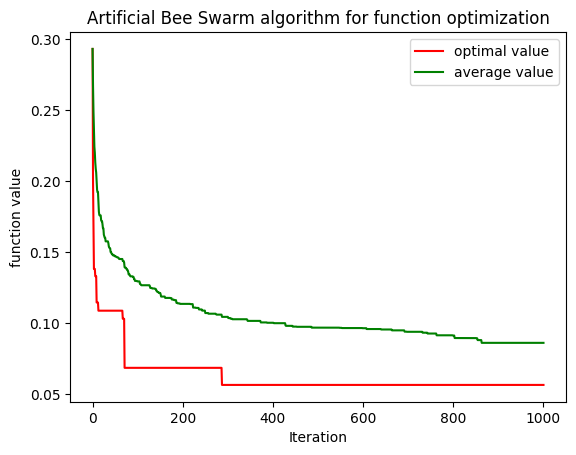

Running time: 111.94701719284058 seconds


In [22]:
# Fitness function (objective function)
def fitness(Bin,AllItem,ran):
    # ran is the packing order.
    itemNum=AllItem.shape[0] 
    BinNum=1;
    RPNXY=[];
    flagItem=np.zeros(itemNum) #Marking whether items are loaded into bin
    utilization_rates = []  
    visualizations = [] 
    
    # Start packing.
    for i in range(itemNum):
        if flagItem[ran[i]]==0:
            item=AllItem[ran[i],:]
            itemRP=Bin  
            flagOL=overlap(item,AllItem,itemRP,RPNXY) 
            if flagOL==0:
                itemRP=finalPos(item,AllItem,itemRP,RPNXY) 
                if len(itemRP)>0:
                    RPNXY.append([ran[i],itemRP[0],itemRP[1]])
                    flagItem[ran[i]]=1
    rect_area = 0
    bin_area = Bin[0]*Bin[1]
    for id in RPNXY:
        width,height = AllItem[id[0]]
        rect_area += width*height
    score = rect_area/bin_area
    print('utilisation:{}'.format(score))
    return score

#             #可视化
#             fig, ax = plt.subplots(1, 1)
#             ax1 = fig.gca()
#             for i in RPNXY:
#                 width,height = AllItem[i[0]]
#                 rx,ry = i[1],i[2]
#                 lx,ly = rx-width,ry-height
#                 plt.xlim((0, Bin[0]))
#                 plt.ylim((0, Bin[1]))
#                 color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#                 rect = patches.Rectangle((lx, ly), width,height,linewidth=1, facecolor = color)
#                 ax1.add_patch(rect)
#             print("利用率: {}".format(utilization_rate))
#             plt.show()
#             #plt.savefig('result.png')
#     print("平均利用率: {}".format(np.mean(utilization_rates)))
            
#     if list(flagItem).count(0)<=0:
#         print("--------------------------------------物品装完---------------------------------\n")
    return score
 
class ABSIndividual:
    def __init__(self,bin,item):
        self.score = 0.
        self.invalidCount = 0 #Number of invalid counts (cumulative number of times results have not been updated)
        self.bin = bin  #Box width and height
        self.allitem = item
        self.ran =  list(range(self.allitem.shape[0]))
        self.calculateFitness()        
 
    def calculateFitness(self):
        self.score = fitness(self.bin,self.allitem,self.ran)#Calculate current score
        
class ArtificialBeeSwarm:
    def __init__(self, foodCount, onlookerCount,Bin, item, maxIterCount=1000, maxInvalidCount=200):
        self.foodCount = foodCount#Number of nectar sources, equal to the number of employed bees
        self.onlookerCount = onlookerCount#Number of onlooker bees 
        self.item = item #Upper and lower bounds for each parameter
        self.maxIterCount = maxIterCount
        self.maxInvalidCount = maxInvalidCount
        self.Bin = Bin
        #The #foodList is a list of foodCount individual bees (i.e., hired bees), each representing a solution with a different packing order.
        self.foodList = [ABSIndividual(self.Bin,self.item) for k in range(self.foodCount)]   #Initialise each nectar source
        #The foodScore is a list storing the best fitness value (score) achieved by each individual bee.
        self.foodScore = [d.score for d in self.foodList]                             #Best results by nectar source
        self.bestFood = self.foodList[np.argmax(self.foodScore)]                      #The best nectar source in the whole world
    
    #Find a suitable permutation
    def updateFood(self, i):  #Update the ith nectar source
        vi = copy.deepcopy(self.foodList[i])
        order =list(range(vi.allitem.shape[0]))
        random.shuffle(order) #Randomly generated pack sequence
        vi.ran = order
        vi.calculateFitness()
        if vi.score > self.foodList[i].score: #If the results are better than the current honey source
            self.foodList[i] = vi
            if vi.score > self.foodScore[i]:#If grades are better than history grades
                self.foodScore[i] = vi.score
                if vi.score > self.bestFood.score:#If the results are globally optimal
                    self.bestFood = vi
            self.foodList[i].invalidCount = 0
        else:
            self.foodList[i].invalidCount += 1
            
    # Implementation of the employed Bees phase
    def employedBeePhase(self):
        for i in range(0, self.foodCount):#Each nectar source is updated in turn
            self.updateFood(i)            
 
    #Implementation of the onlooker bee phase
    def onlookerBeePhase(self):
        foodScore = [d.score for d in self.foodList]  
        maxScore = np.max(foodScore)    
        #Relative scores and index numbers were obtained for each nectar source.
        accuFitness = [(0.9*d/maxScore+0.1, k) for k,d in enumerate(foodScore)]
        for k in range(0, self.onlookerCount):
            #Randomly selected from nectar sources with relative scores greater than the randomisation threshold to follow the
            i = random.choice([d[1] for d in accuFitness if d[0] >= random.random()])
            self.updateFood(i)
 
    #Implementation of the scout bee phase
    def scoutBeePhase(self):
        for i in range(0, self.foodCount):
            #If this nectar has not been updated more than the specified threshold, it is reinitialised
            if self.foodList[i].invalidCount > self.maxInvalidCount:
                self.foodList[i] = ABSIndividual(self.Bin, self.item)
                self.foodScore[i] = max(self.foodScore[i], self.foodList[i].score)
 
    #Perform a fixed number of iterations
    def solve(self):
        trace = []
        trace.append((self.bestFood.score, np.mean(self.foodScore)))
        for k in range(self.maxIterCount):
            self.employedBeePhase()
            self.onlookerBeePhase()
            self.scoutBeePhase()
            trace.append((self.bestFood.score, np.mean(self.foodScore)))
        print("Optimal utilisation:",self.bestFood.score)
        self.printResult(np.array(trace))
 
    def printResult(self, trace):
        x = np.arange(0, trace.shape[0])
        plt.plot(x, [(1-d)/d for d in trace[:, 0]], 'r', label='optimal value')
        plt.plot(x, [(1-d)/d for d in trace[:, 1]], 'g', label='average value')
        plt.xlabel("Iteration")
        plt.ylabel("function value")
        plt.title("Artificial Bee Swarm algorithm for function optimization")
        plt.legend()
        plt.show()
 

if __name__ == "__main__":
    random.seed()
    iternum = 1000
    maxInvalidCount = 50
    abs = ArtificialBeeSwarm(30, 30, Bin, AllItem, iternum, maxInvalidCount)
    start_time = time.time()
    abs.solve()
    end_time = time.time()
    print("Running time: {} seconds".format(end_time - start_time))